In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/martinjaramillo/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load data with the updated file paths
train_data = pd.read_csv('../docs/insurance+company+benchmark+coil+2000/ticdata2000.txt', sep='\t', header=None)
eval_data = pd.read_csv('../docs/insurance+company+benchmark+coil+2000/ticeval2000.txt', sep='\t', header=None)
target_data = pd.read_csv('../docs/insurance+company+benchmark+coil+2000/tictgts2000.txt', sep='\t', header=None, names=['Target'])


In [3]:

import re

# Load the content of the dictionary.txt file
with open('../docs/insurance+company+benchmark+coil+2000/dictionary.txt', 'r', encoding='ISO-8859-1') as file:
    file_content = file.read()


# Extract the Data Dictionary table using regular expressions
pattern = re.compile(r"(\d+)\s+([A-Z]+[A-Z0-9]*)\s+(.+?)(?=\d+\s+|L0:)", re.DOTALL)
matches = pattern.findall(file_content)

# Create a DataFrame from the matches
df = pd.DataFrame(matches, columns=['Nr', 'Name', 'Description'])

# Clean up the 'Description' column to remove extra line breaks and spaces
df['Description'] = df['Description'].str.replace('\n', ' ').str.strip()

# Convert 'Nr' column to integer
df['Nr'] = df['Nr'].astype(int)

# Display the DataFrame
df


Nr      Name                                   Description
0    1   MOSTYPE                        Customer Subtype see L
1    2  MAANTHUI                              Number of houses
2    3   MGEMOMV                            Avg size household
3    4  MGEMLEEF                                 Avg age see L
4    5  MOSHOOFD                      Customer main type see L
..  ..       ...                                           ...
81  82  APLEZIER                       Number of boat policies
82  83    AFIETS                    Number of bicycle policies
83  84   AINBOED         Number of property insurance policies
84  85  ABYSTAND  Number of social security insurance policies
85  86   CARAVAN                Number of mobile home policies

[86 rows x 3 columns]

In [4]:

# Define a pattern to extract each L table (L0, L1, L2, L3, L4)
l_tables_pattern = re.compile(r"(L\d+):\n\n(.*?)\n\n", re.DOTALL)
l_tables_matches = l_tables_pattern.findall(file_content)

# Dictionary to store the DataFrames
l_tables_dict = {}

# Process each L table
for table_name, table_content in l_tables_matches:
    # Split the table content into lines
    lines = table_content.strip().split('\n')
    
    # Split each line into two parts: value and label
    data = [line.split(maxsplit=1) for line in lines if len(line.split(maxsplit=1)) == 2]
    
    # Create a DataFrame and store it in the dictionary
    df1 = pd.DataFrame(data, columns=['Value', 'Label'])
    l_tables_dict[table_name] = df1

# Display the dictionary keys to confirm extraction
l_tables_dict.keys()
l_tables_dict['L0'] = l_tables_dict['L0'].iloc[1:].reset_index(drop=True)


In [5]:
train_data

0   1   2   3   4   5   6   7   8   9   ...  76  77  78  79  80  81  82  \
0     33   1   3   2   8   0   5   1   3   7  ...   0   0   0   1   0   0   0   
1     37   1   2   2   8   1   4   1   4   6  ...   0   0   0   1   0   0   0   
2     37   1   2   2   8   0   4   2   4   3  ...   0   0   0   1   0   0   0   
3      9   1   3   3   3   2   3   2   4   5  ...   0   0   0   1   0   0   0   
4     40   1   4   2  10   1   4   1   4   7  ...   0   0   0   1   0   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
5817  36   1   1   2   8   0   6   1   2   1  ...   0   0   0   1   0   0   0   
5818  35   1   4   4   8   1   4   1   4   6  ...   0   0   0   1   0   0   0   
5819  33   1   3   4   8   0   6   0   3   5  ...   0   0   0   1   0   0   0   
5820  34   1   3   2   8   0   7   0   2   7  ...   0   0   0   0   0   0   0   
5821  33   1   3   3   8   0   6   1   2   7  ...   0   0   0   0   0   0   0   

      83  84  85  
0      0   0   0  
1      0   0   0  
2      0   0   0  
3      0   0   0  
4      0   0   0  
...   ..  ..  ..  
5817   0   0   0  
5818   0   0   0  
5819   0   0   1  
5820   0   0   0  
5821   0   0   0  

[5822 rows x 86 columns]

In [6]:
# Create a list of new column names using the 'Name' column from df
new_column_names = df['Name'].tolist()

# Rename the columns in train_data using the new_column_names list
train_data.columns = new_column_names

# Display the updated DataFrame
train_data.head()


MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  MGODOV  \
0       33         1        3         2         8       0       5       1   
1       37         1        2         2         8       1       4       1   
2       37         1        2         2         8       0       4       2   
3        9         1        3         3         3       2       3       2   
4       40         1        4         2        10       1       4       1   

   MGODGE  MRELGE  ...  APERSONG  AGEZONG  AWAOREG  ABRAND  AZEILPL  APLEZIER  \
0       3       7  ...         0        0        0       1        0         0   
1       4       6  ...         0        0        0       1        0         0   
2       4       3  ...         0        0        0       1        0         0   
3       4       5  ...         0        0        0       1        0         0   
4       4       7  ...         0        0        0       1        0         0   

   AFIETS  AINBOED  ABYSTAND  CARAVAN  
0       0        0         0        0  
1       0        0         0        0  
2       0        0         0        0  
3       0        0         0        0  
4       0        0         0        0  

[5 rows x 86 columns]

In [7]:
train_data['MINKM30'].unique

<bound method Series.unique of 0       0
1       2
2       4
3       1
4       0
       ..
5817    4
5818    0
5819    5
5820    0
5821    2
Name: MINKM30, Length: 5822, dtype: int64>

In [8]:
train_data.shape

(5822, 86)

In [9]:
train_data['CARAVAN'].value_counts()

0    5474
1     348
Name: CARAVAN, dtype: int64

/Users/martinjaramillo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


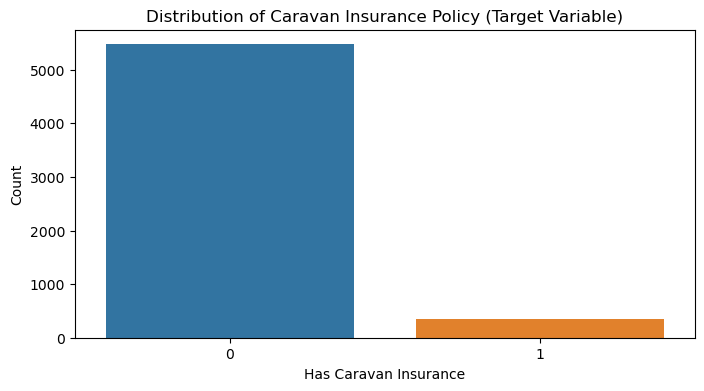

In [10]:
# EDA - Distribution of the target variable
plt.figure(figsize=(8, 4))
sns.countplot(train_data['CARAVAN'])
plt.title('Distribution of Caravan Insurance Policy (Target Variable)')
plt.xlabel('Has Caravan Insurance')
plt.ylabel('Count')
plt.show()

In [20]:
# Correlation analysis
# Checking the correlation between features and the target
correlation = train_data.corr()['CARAVAN'].sort_values(ascending=False)
print("\nTop 10 features positively correlated with CARAVAN:")
print(correlation.head(11)) # Including 'CARAVAN' itself

print("\nTop 10 features negatively correlated with CARAVAN:")
print(correlation.tail(11))


Top 10 features positively correlated with CARAVAN:
CARAVAN     1.000000
PPERSAUT    0.150910
APERSAUT    0.144210
APLEZIER    0.105700
PWAPART     0.096463
MKOOPKLA    0.095938
PBRAND      0.094446
PPLEZIER    0.091361
MINKGEM     0.090185
AWAPART     0.089387
MOPLHOOG    0.084635
Name: CARAVAN, dtype: float64

Top 10 features negatively correlated with CARAVAN:
MBERBOER   -0.054003
MBERARBO   -0.054632
MZFONDS    -0.058378
MRELOV     -0.062285
MSKD       -0.063070
MOSHOOFD   -0.069300
MOSTYPE    -0.069385
MAUT0      -0.076501
MHHUUR     -0.079143
MINKM30    -0.079765
MOPLLAAG   -0.090561
Name: CARAVAN, dtype: float64


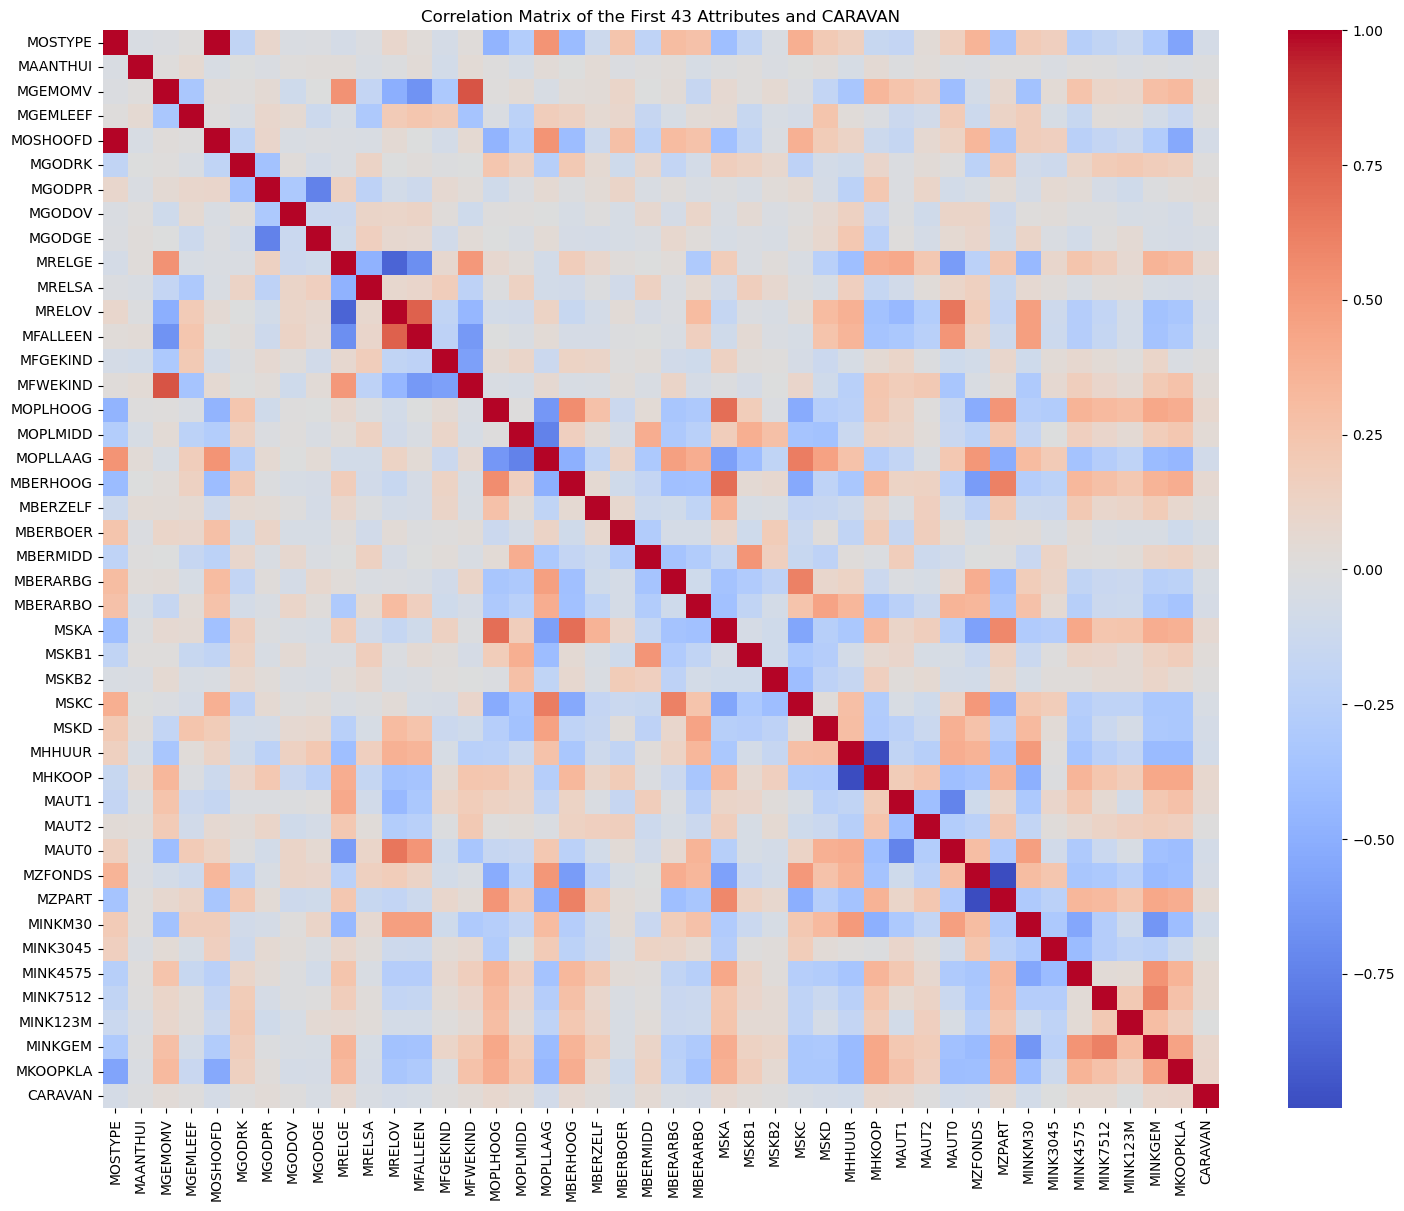

In [12]:
# Correlation matrix for the first 43 columns and the CARAVAN column
plt.figure(figsize=(18, 14))

subset_corr = train_data.iloc[:, :43].join(train_data['CARAVAN']).corr()

sns.heatmap(subset_corr, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix of the First 43 Attributes and CARAVAN')
plt.show()

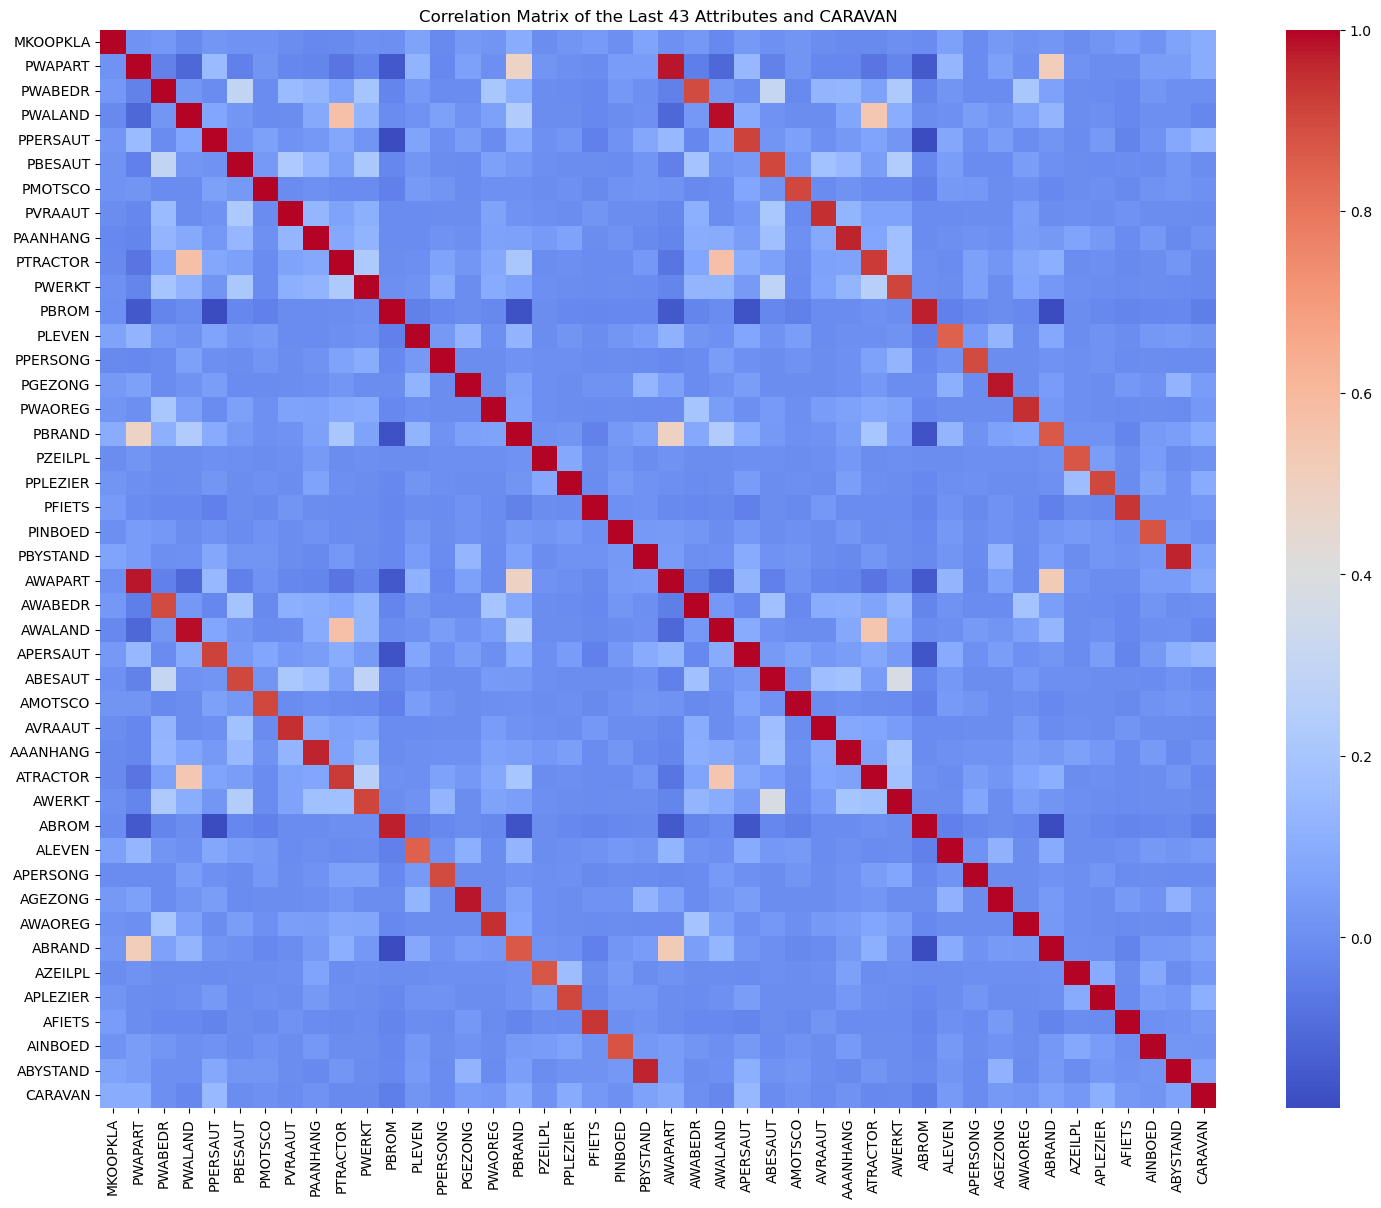

In [13]:
# Correlation matrix for the last 43 columns and the CARAVAN column
plt.figure(figsize=(18, 14))

subset_corr_last = train_data.iloc[:, -44:].corr()  # Includes the last 43 columns and CARAVAN

sns.heatmap(subset_corr_last, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix of the Last 43 Attributes and CARAVAN')
plt.show()


In [14]:
# Check for missing values in the dataset
missing_values = train_data.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])


Missing values in each column:
Series([], dtype: int64)


In [15]:
# Display statistical summary for numerical features
summary_stats = train_data.describe()
print("Statistical Summary:")
print(summary_stats)


Statistical Summary:
           MOSTYPE     MAANTHUI      MGEMOMV     MGEMLEEF     MOSHOOFD  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000   
mean     24.253349     1.110615     2.678805     2.991240     5.773617   
std      12.846706     0.405842     0.789835     0.814589     2.856760   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%      10.000000     1.000000     2.000000     2.000000     3.000000   
50%      30.000000     1.000000     3.000000     3.000000     7.000000   
75%      35.000000     1.000000     3.000000     3.000000     8.000000   
max      41.000000    10.000000     5.000000     6.000000    10.000000   

            MGODRK       MGODPR       MGODOV       MGODGE       MRELGE  ...  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000  ...   
mean      0.696496     4.626932     1.069907     3.258502     6.183442  ...   
std       1.003234     1.715843     1.017503     1.597647     1.909482  ...

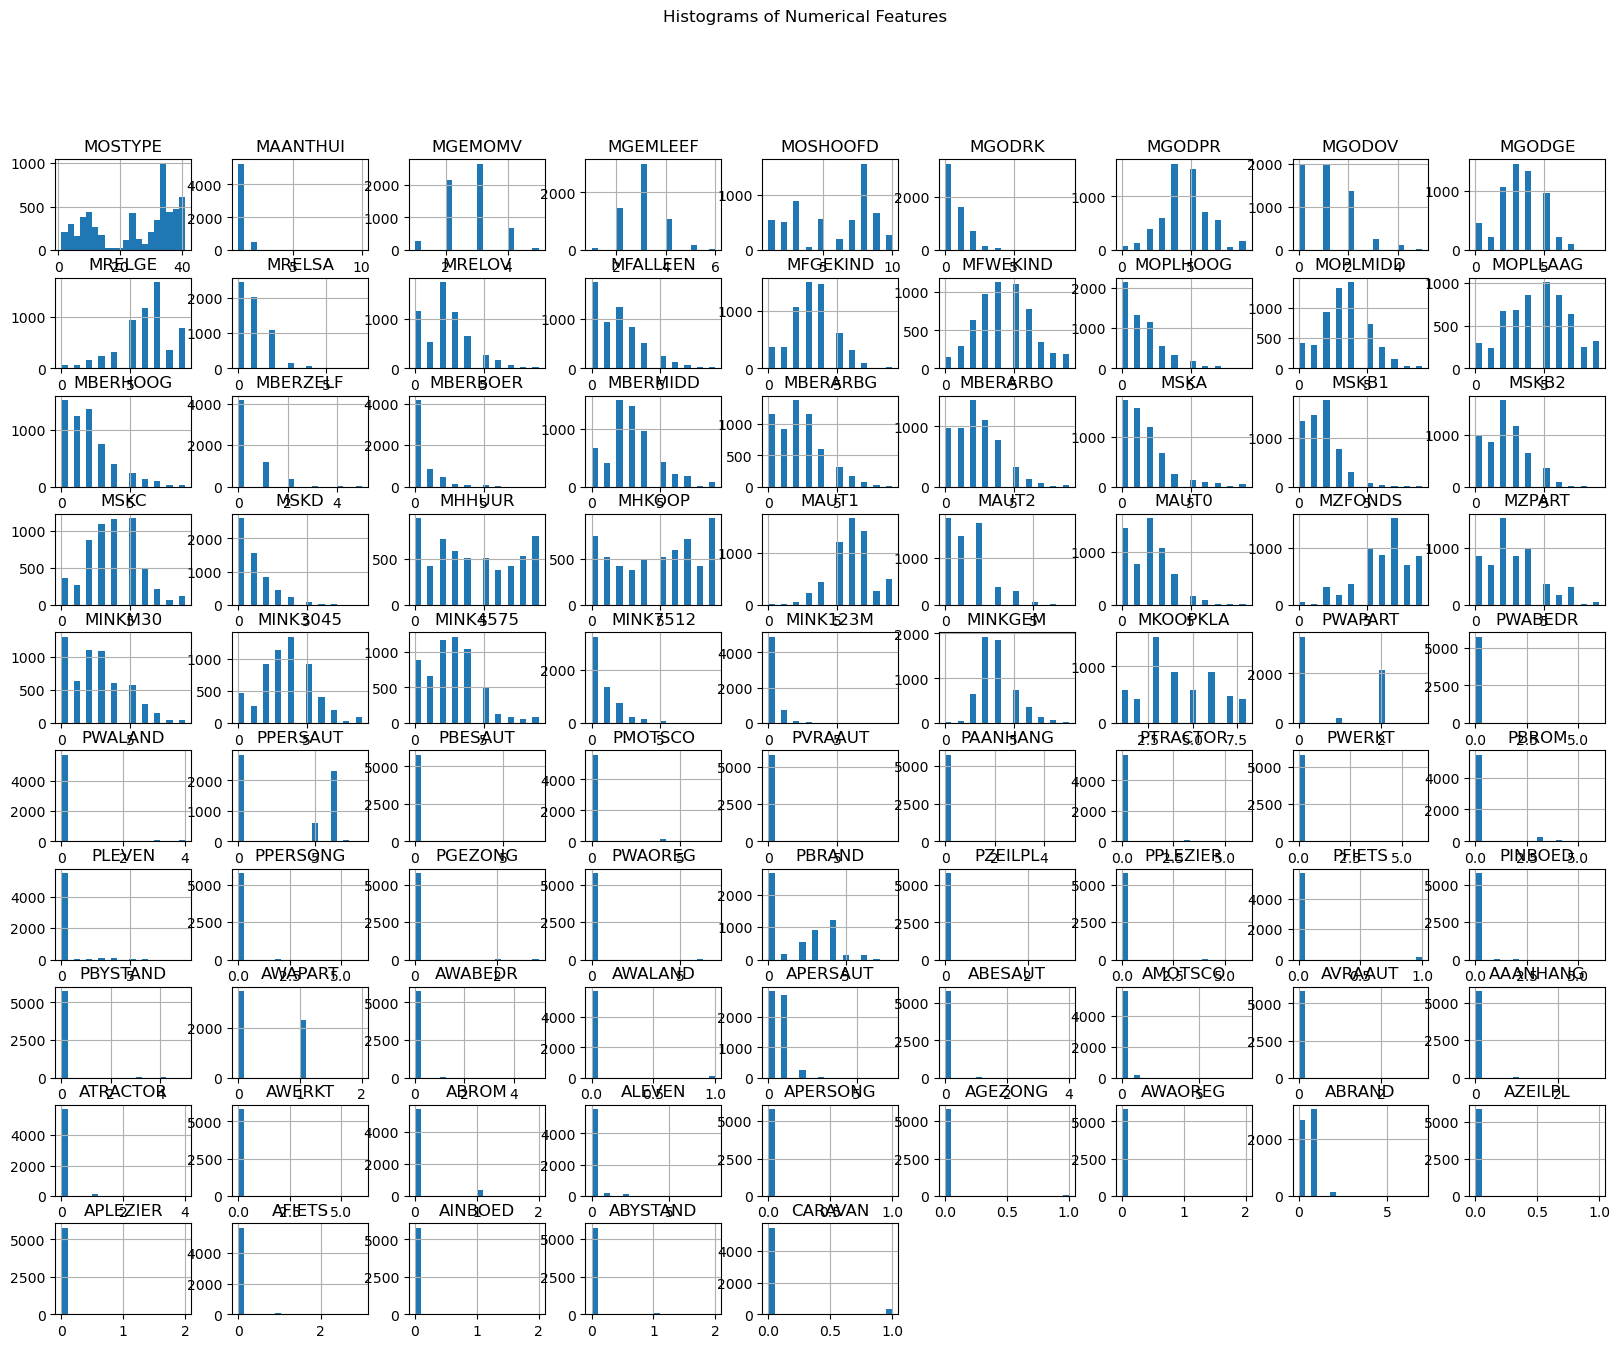

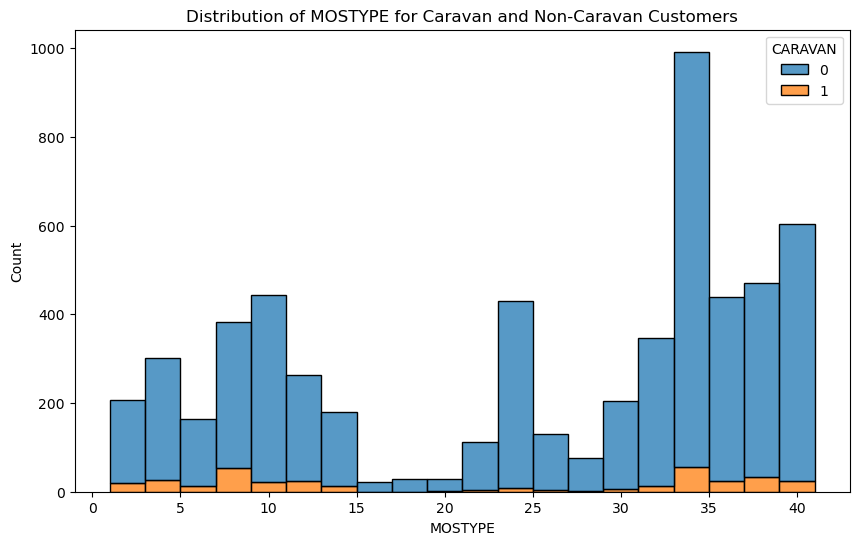

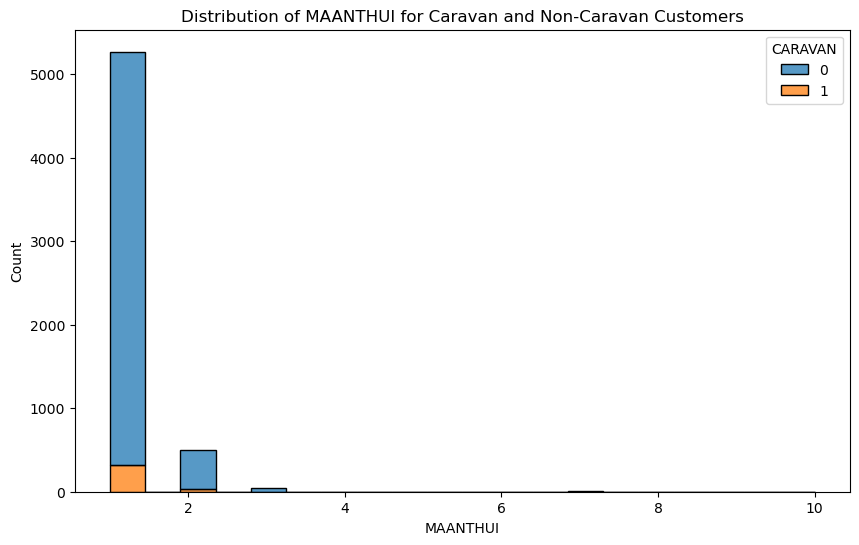

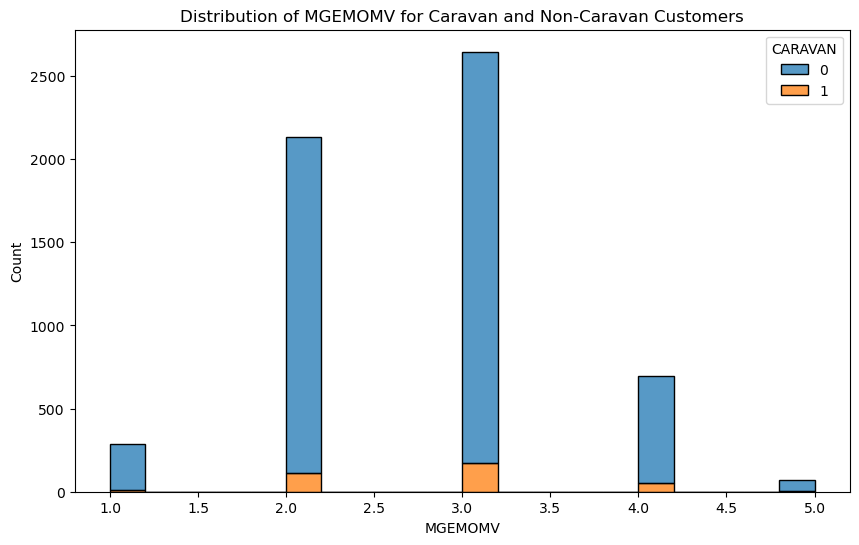

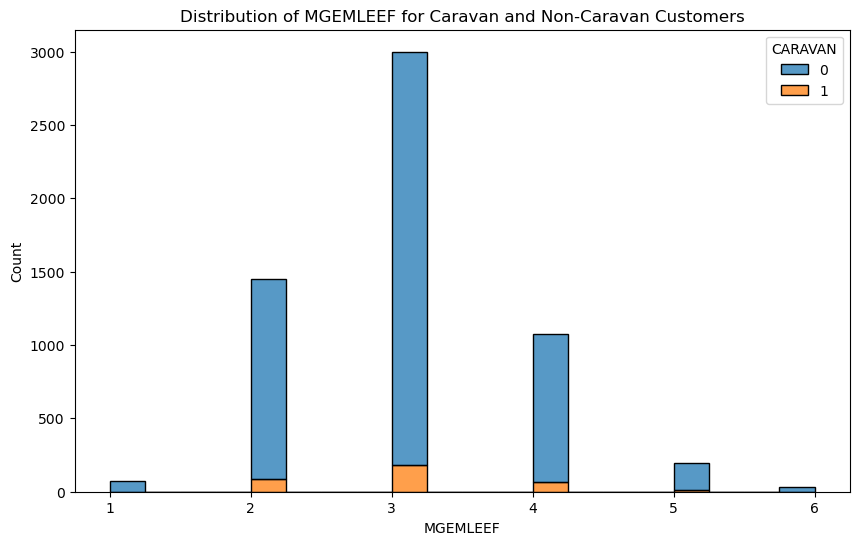

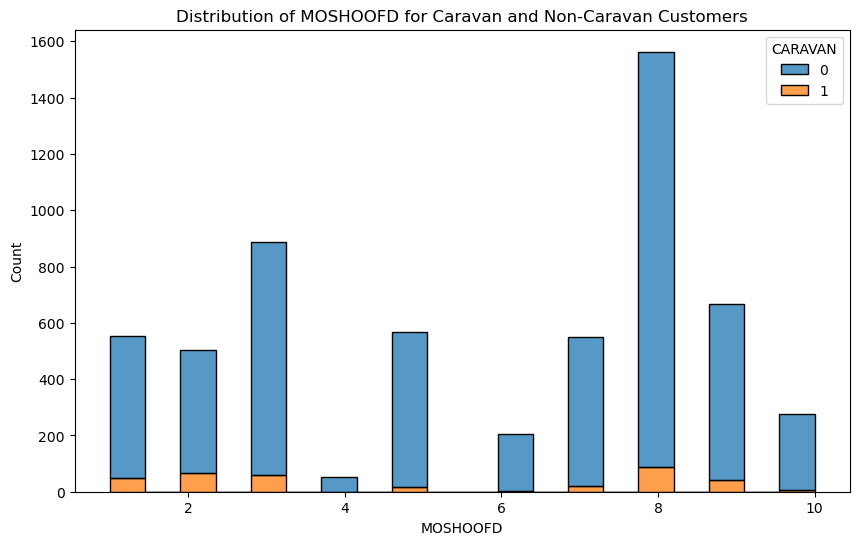

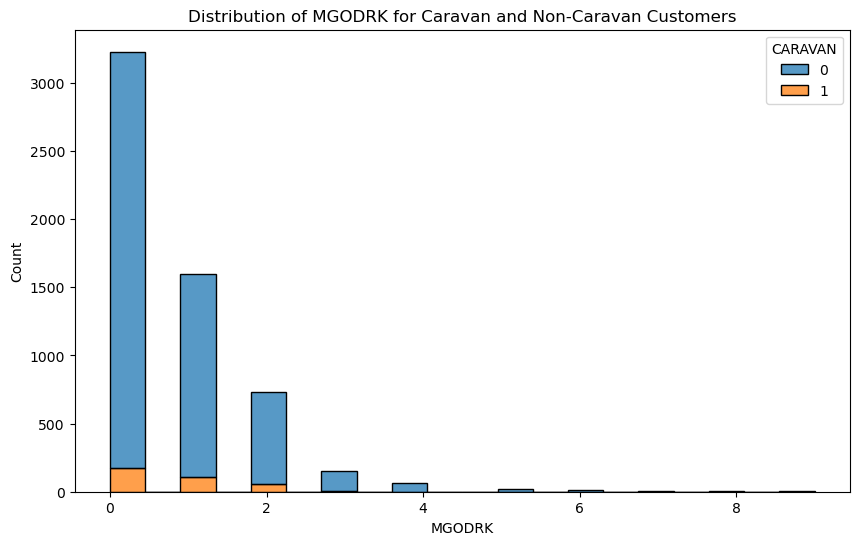

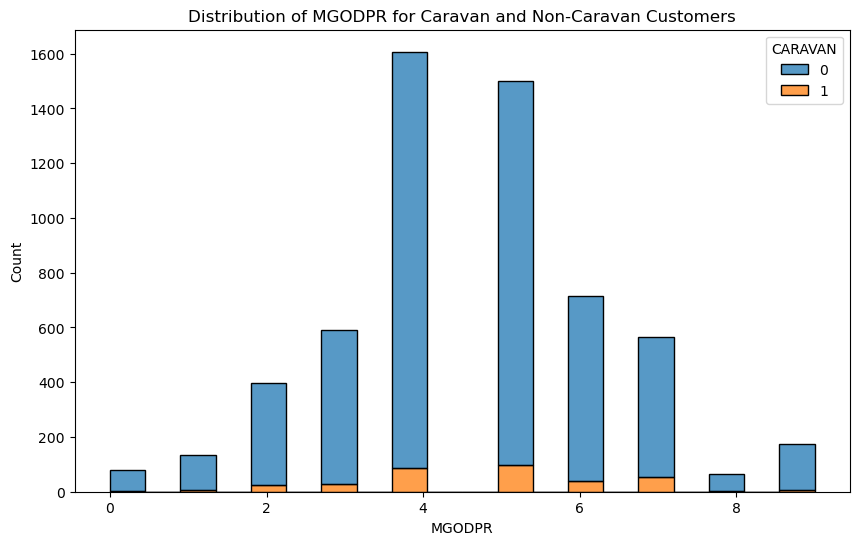

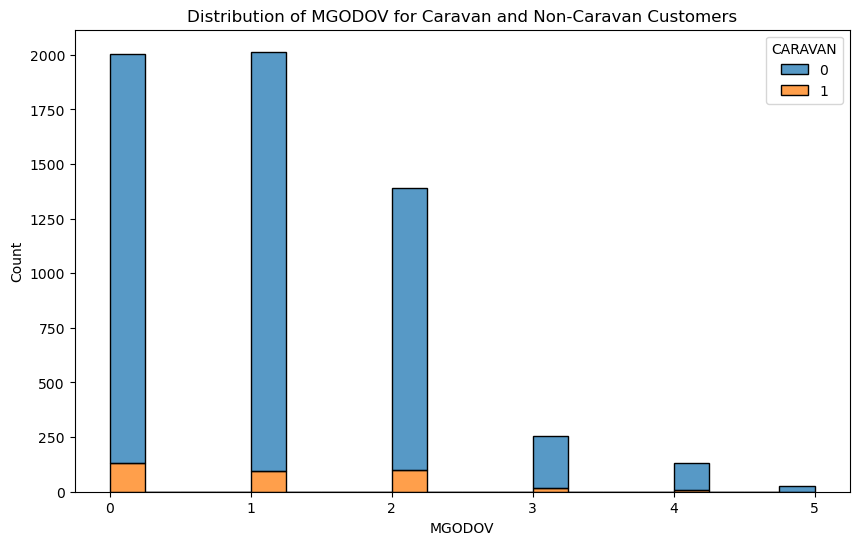

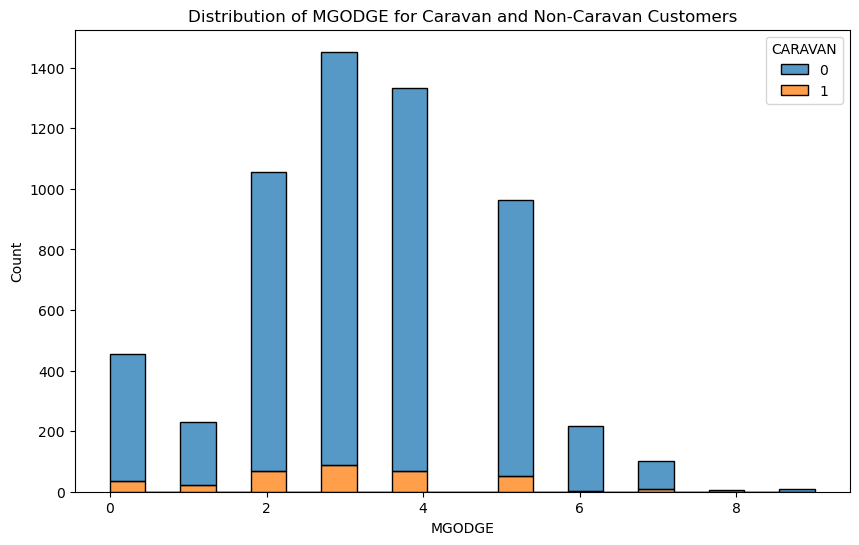

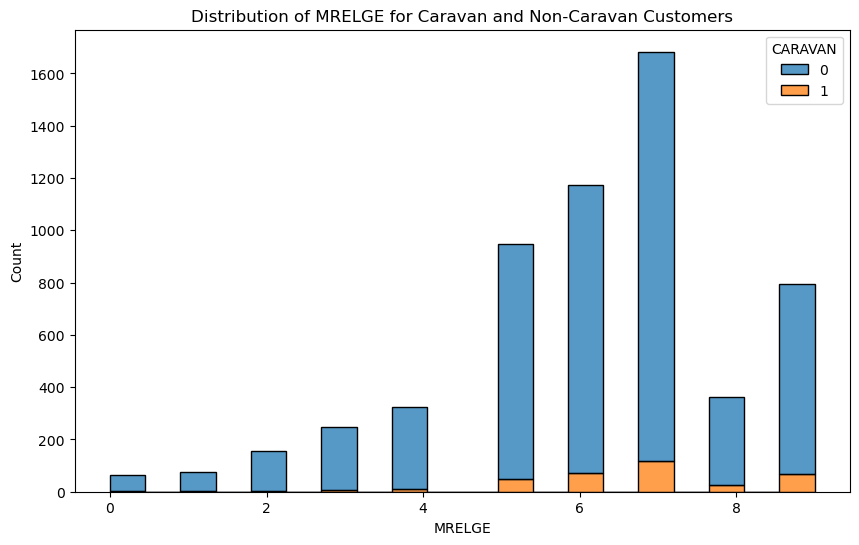

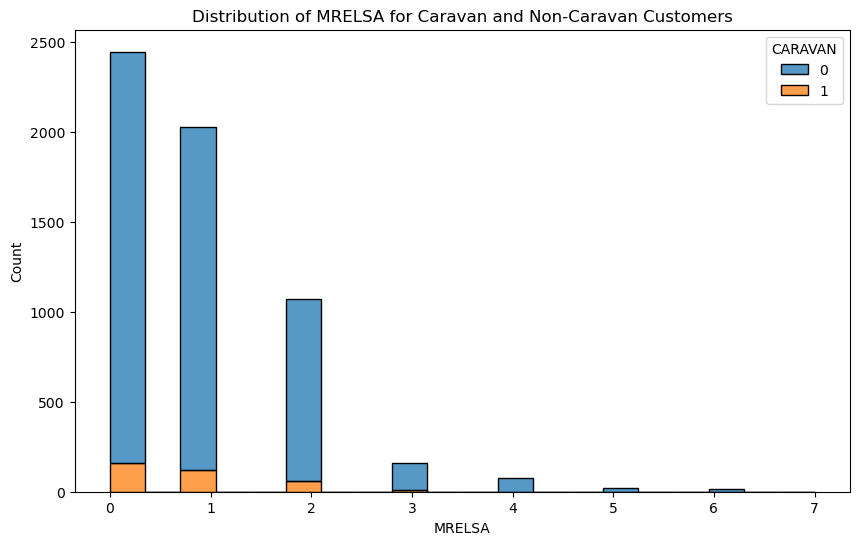

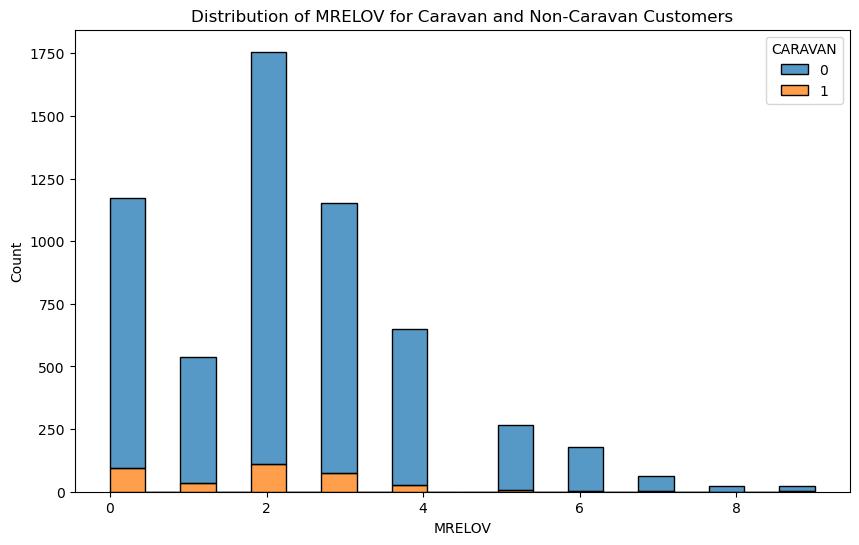

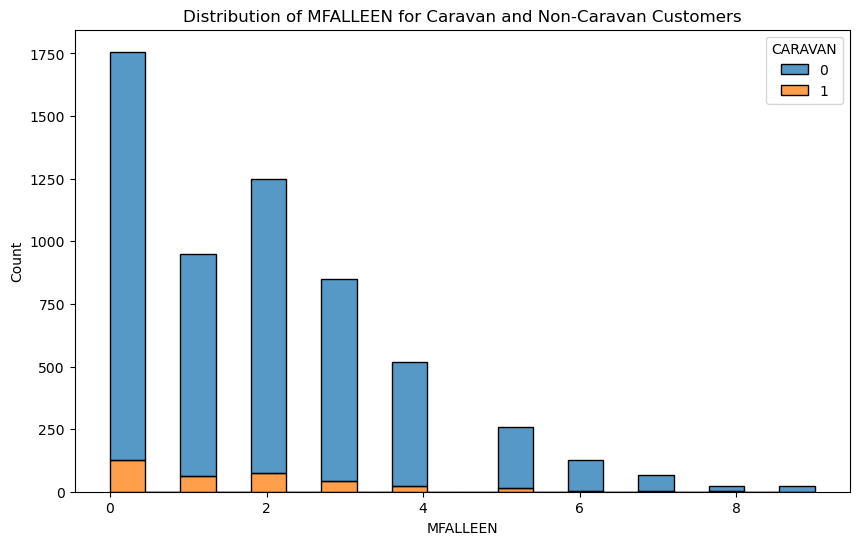

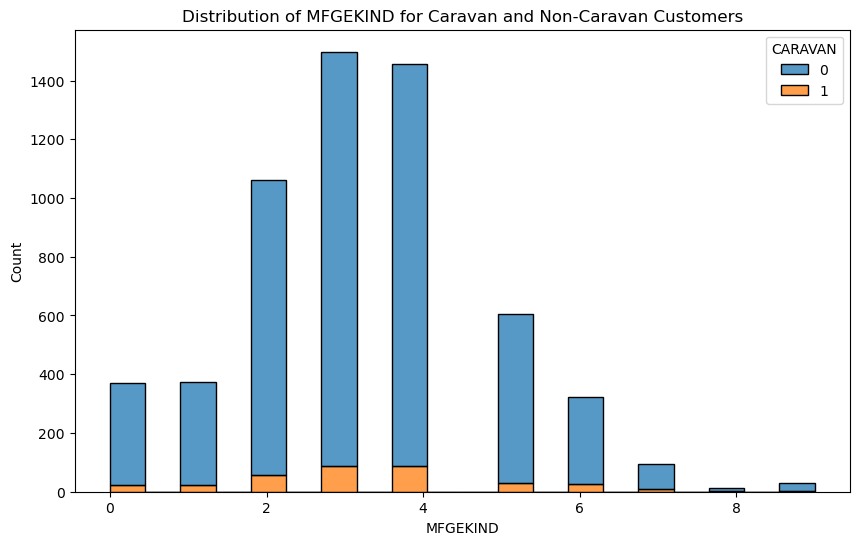

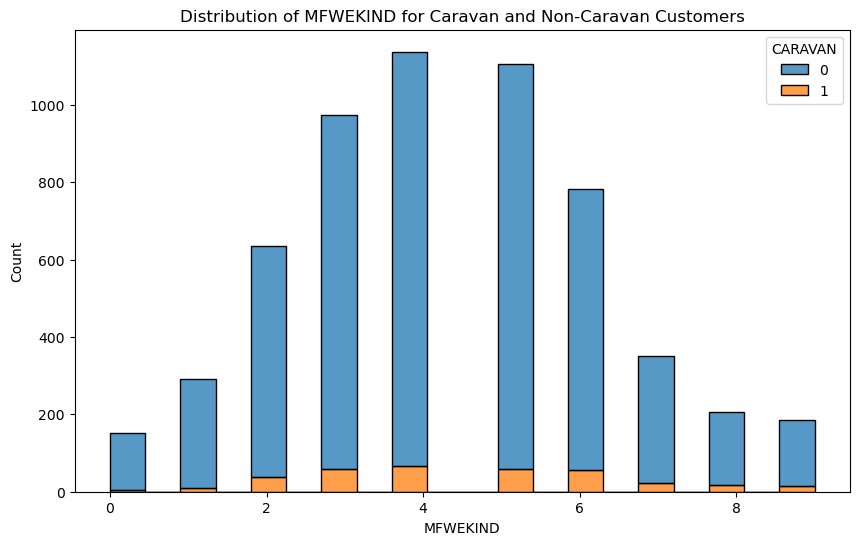

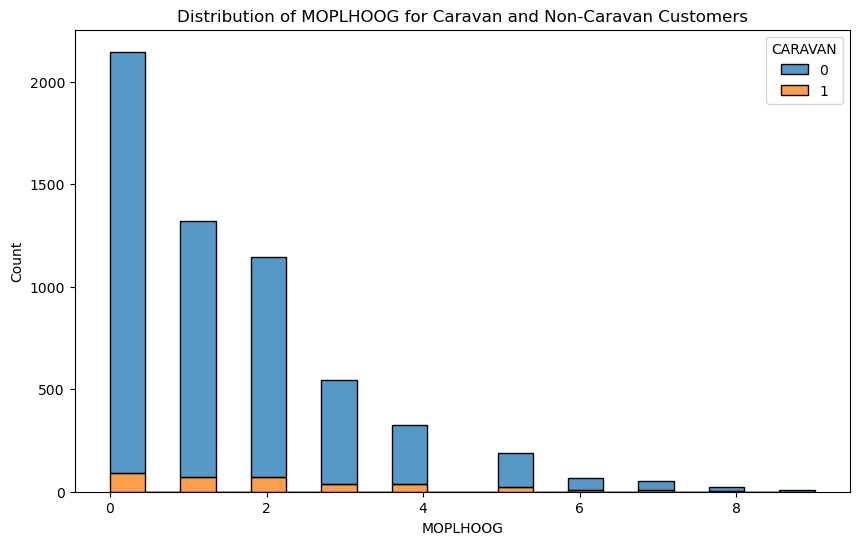

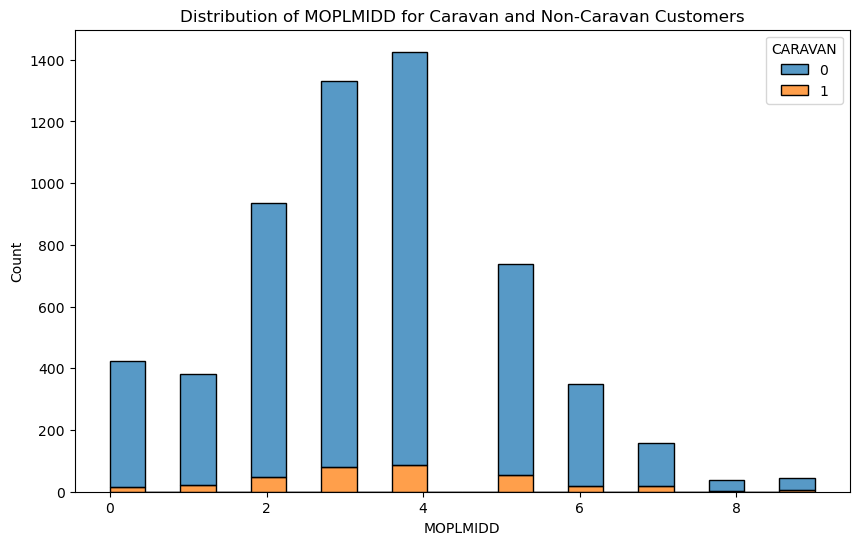

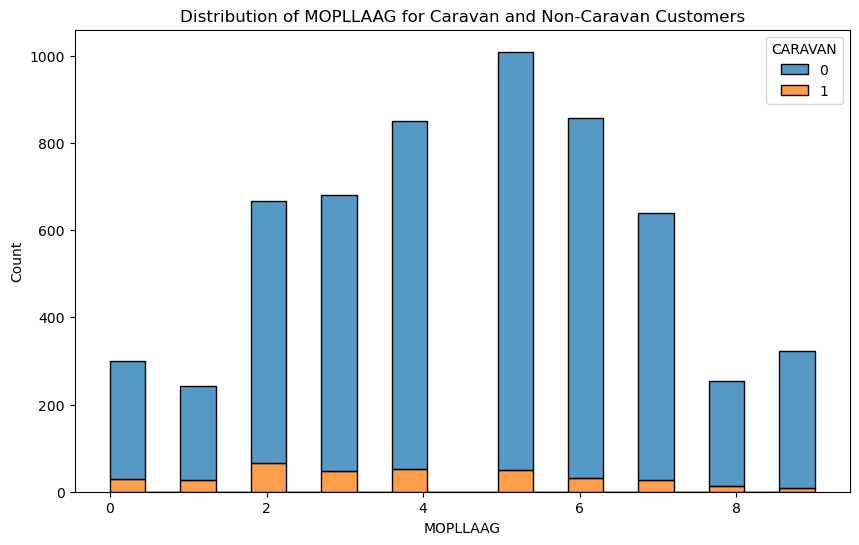

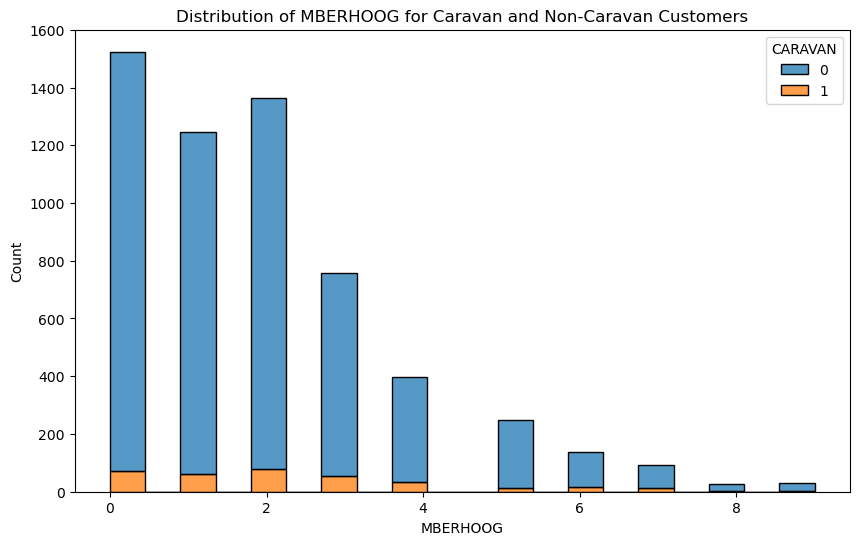

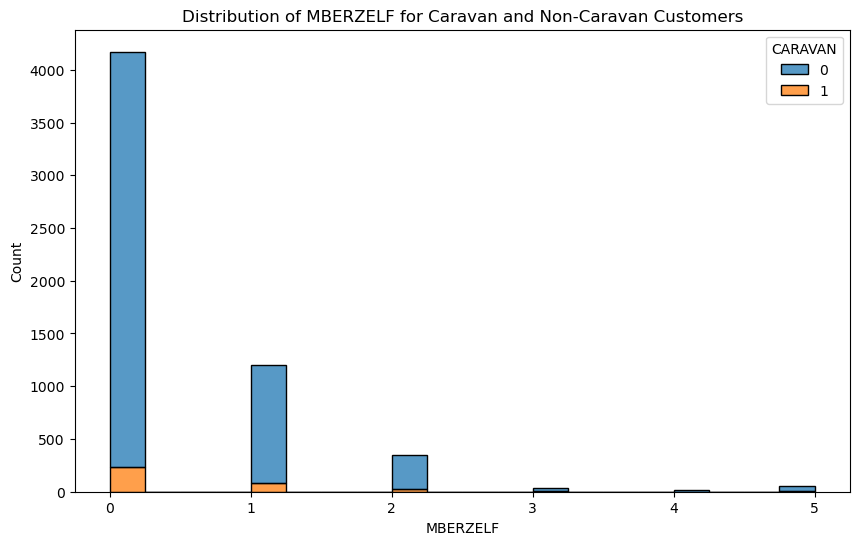

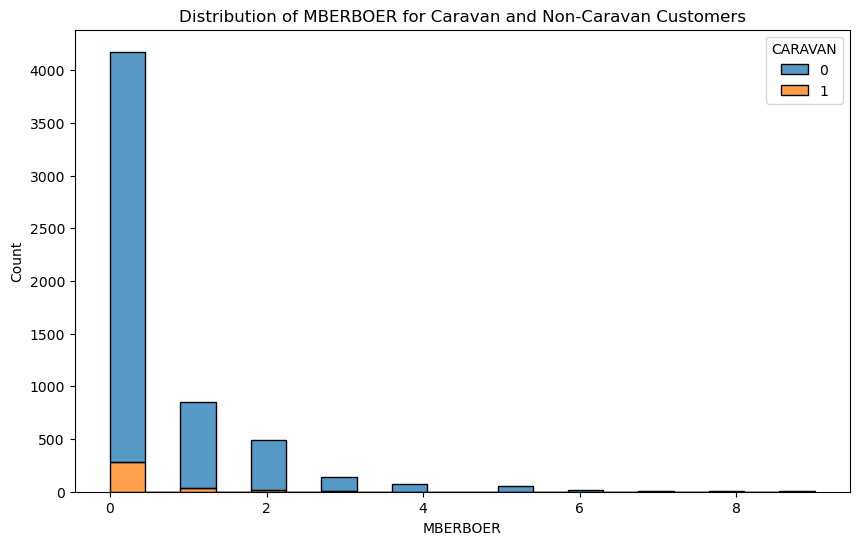

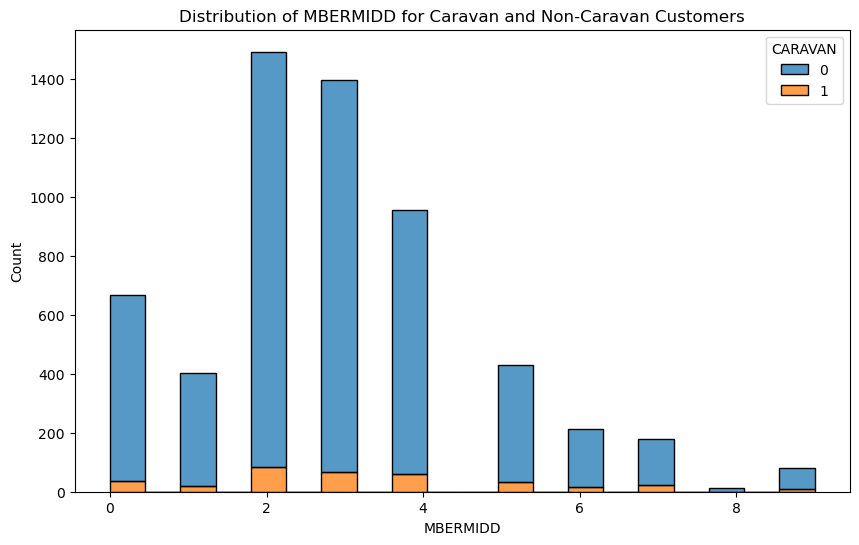

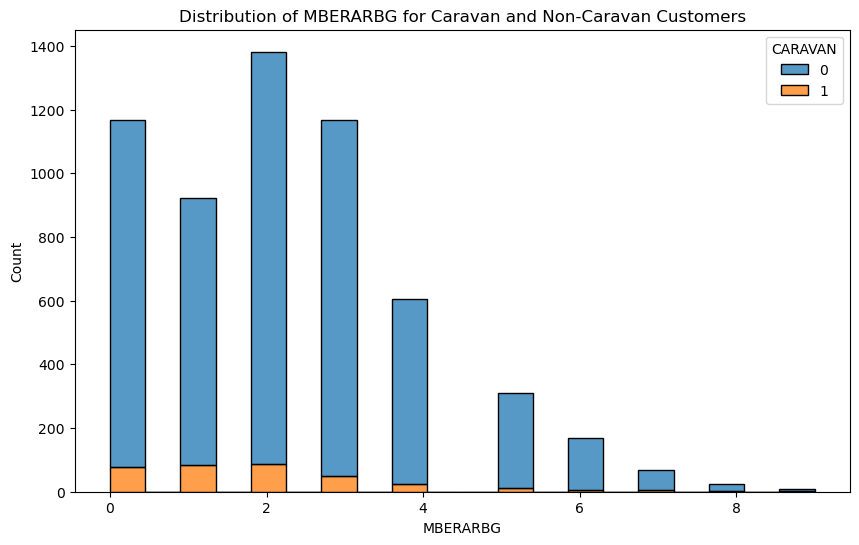

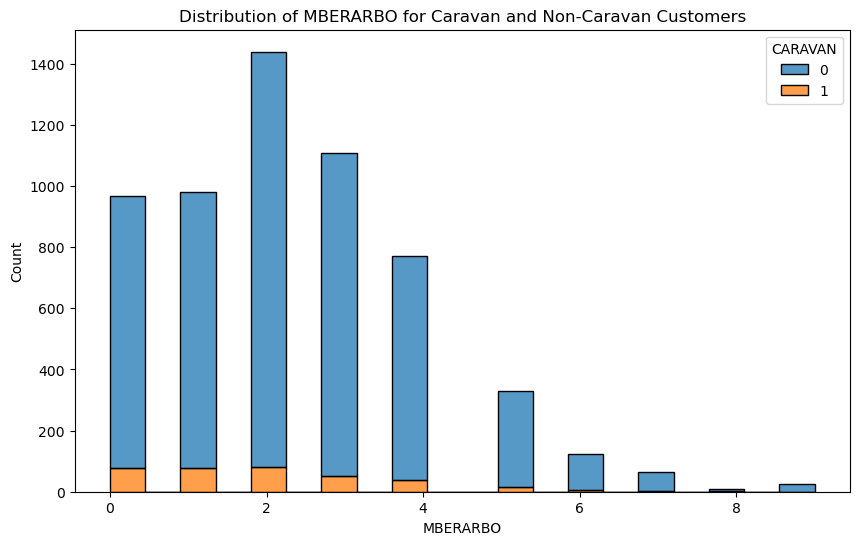

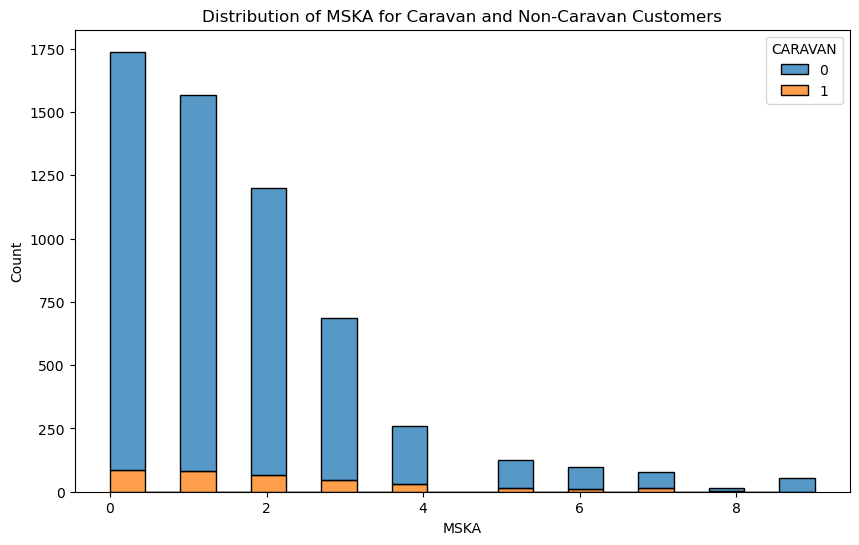

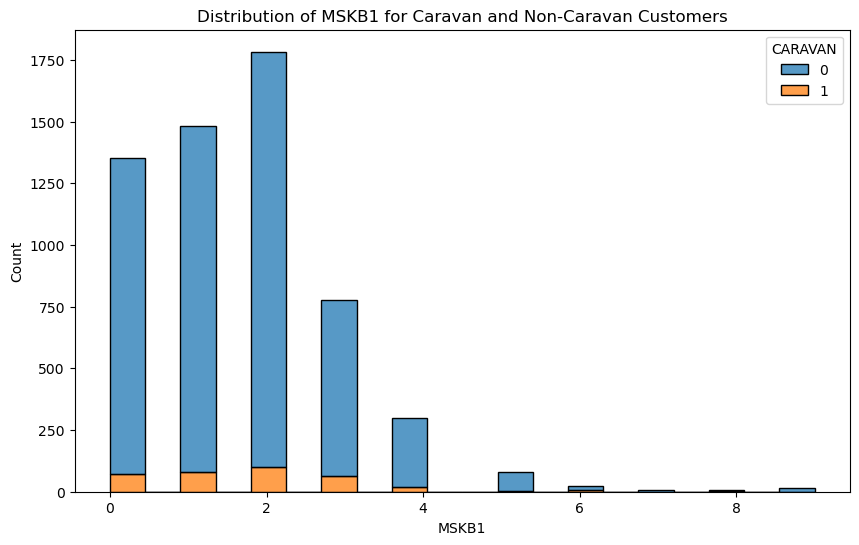

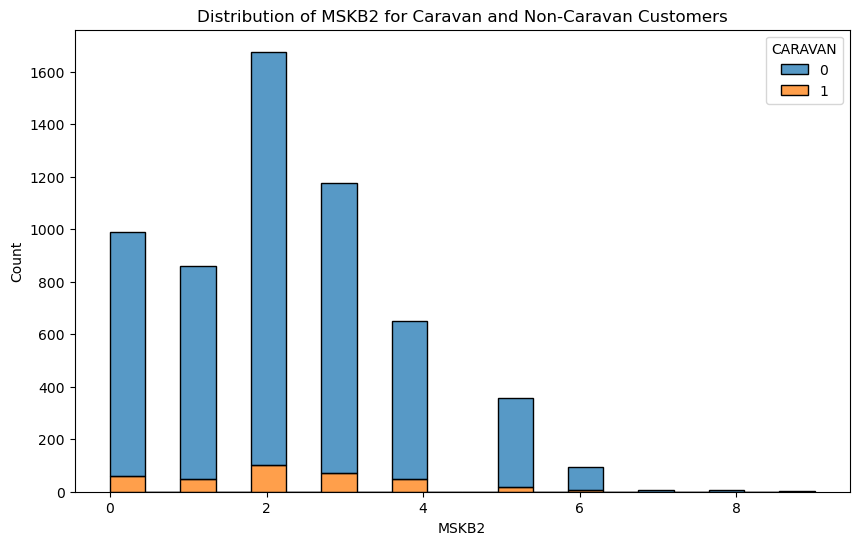

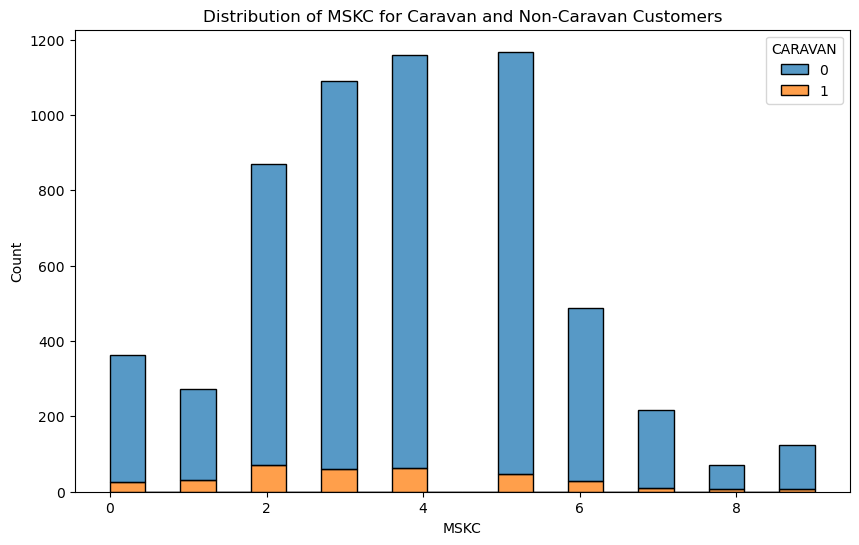

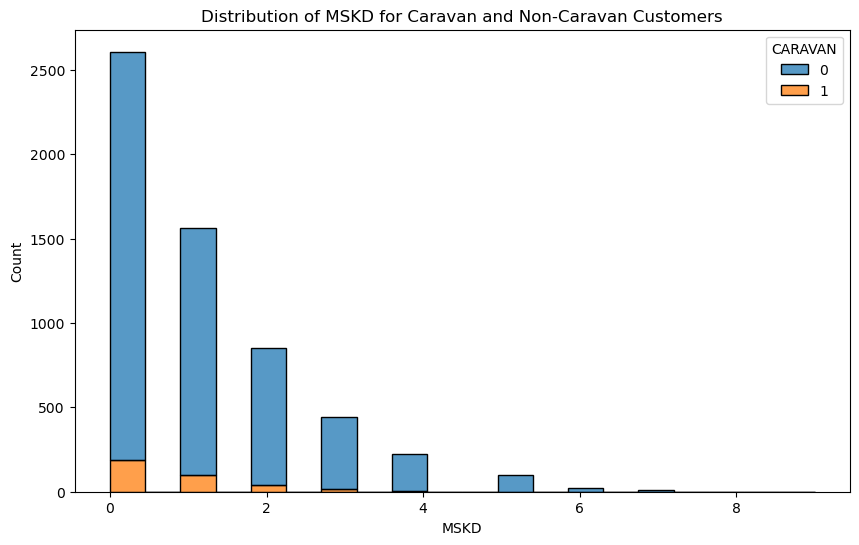

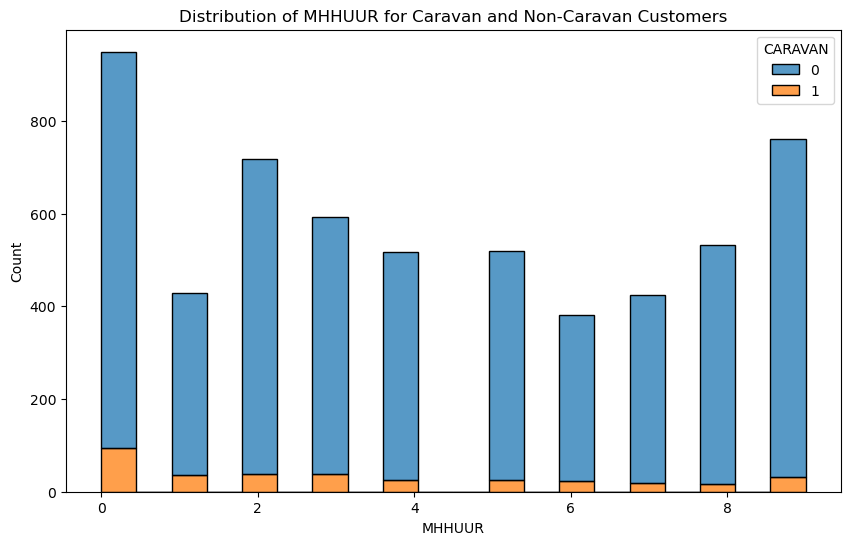

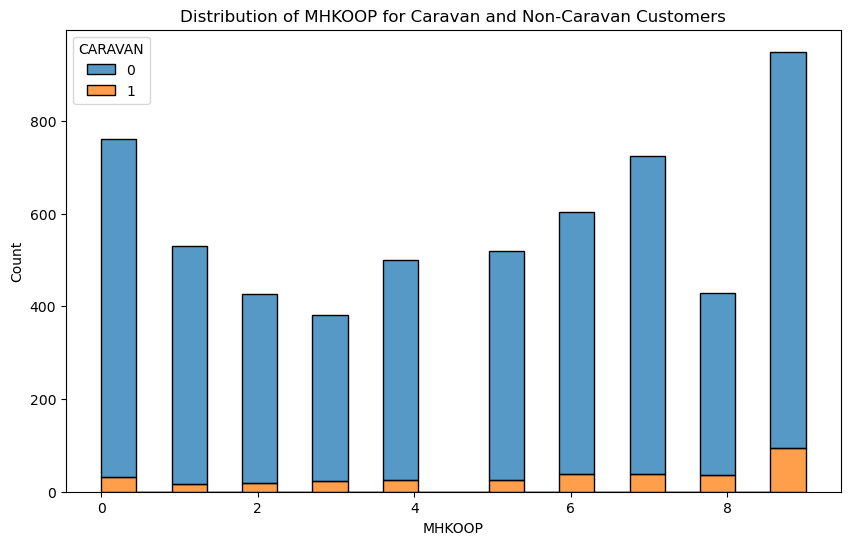

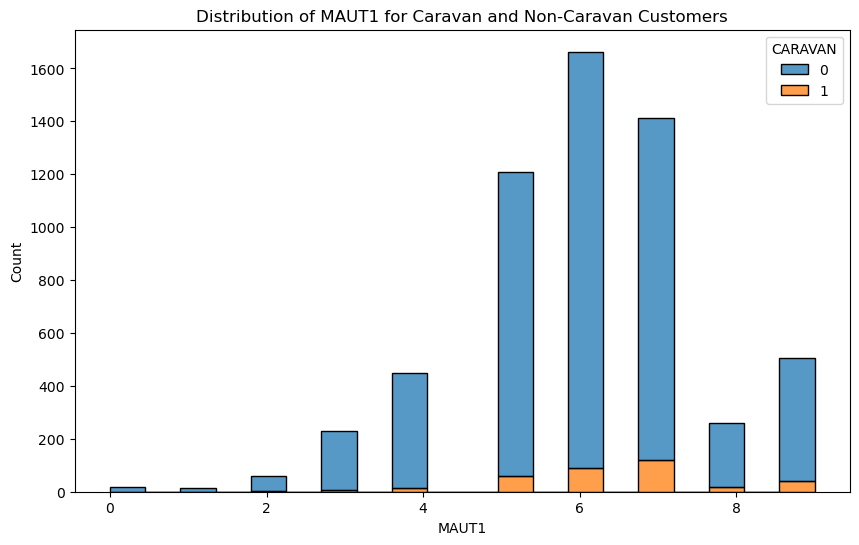

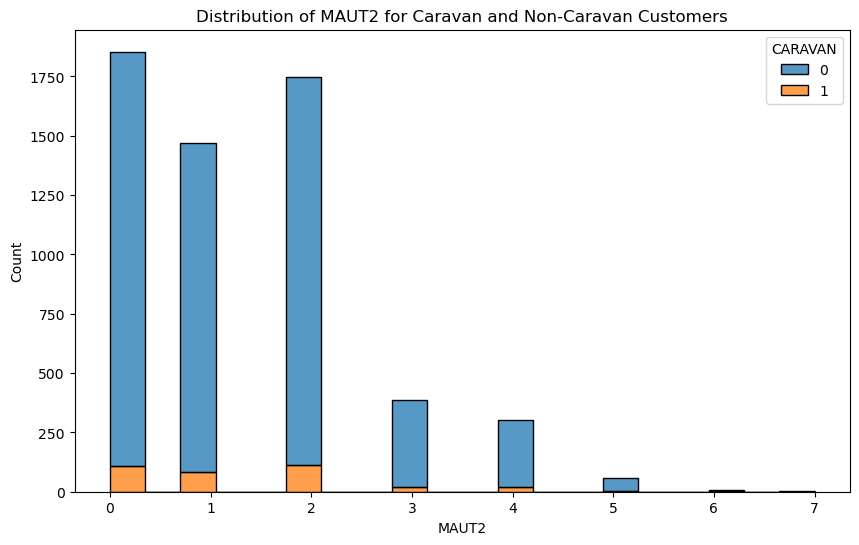

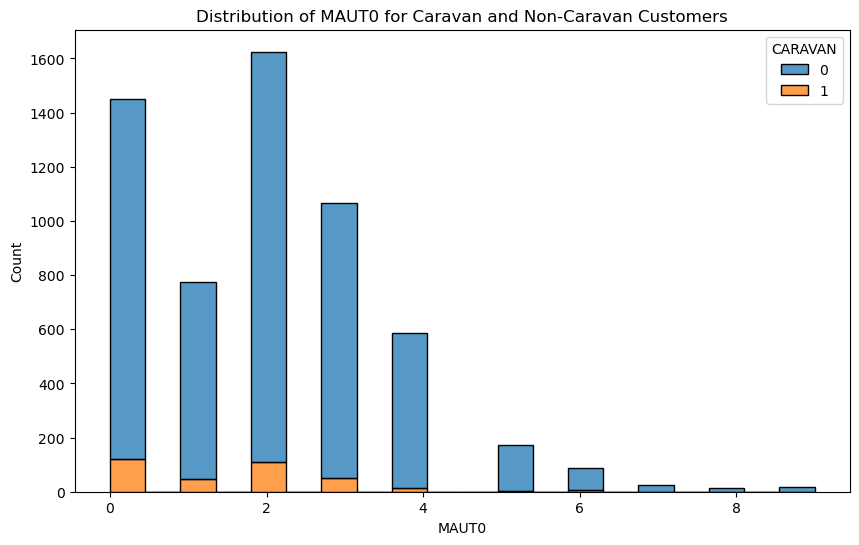

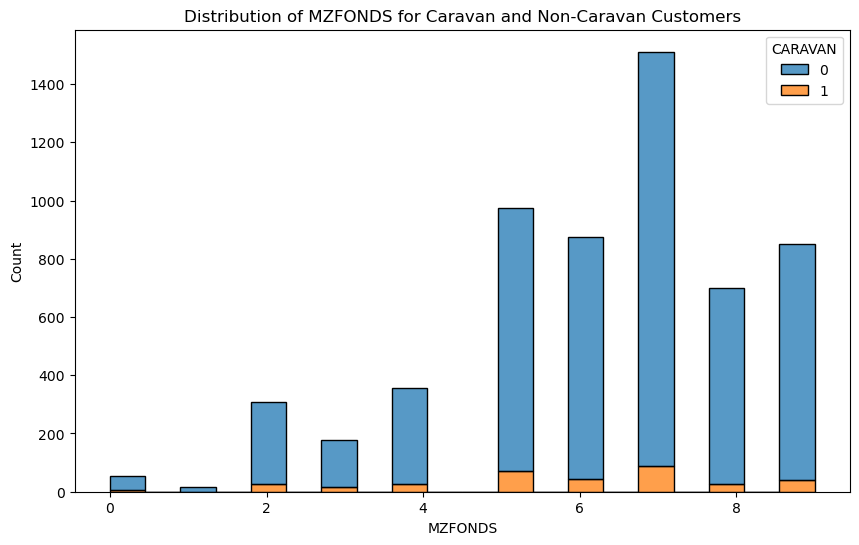

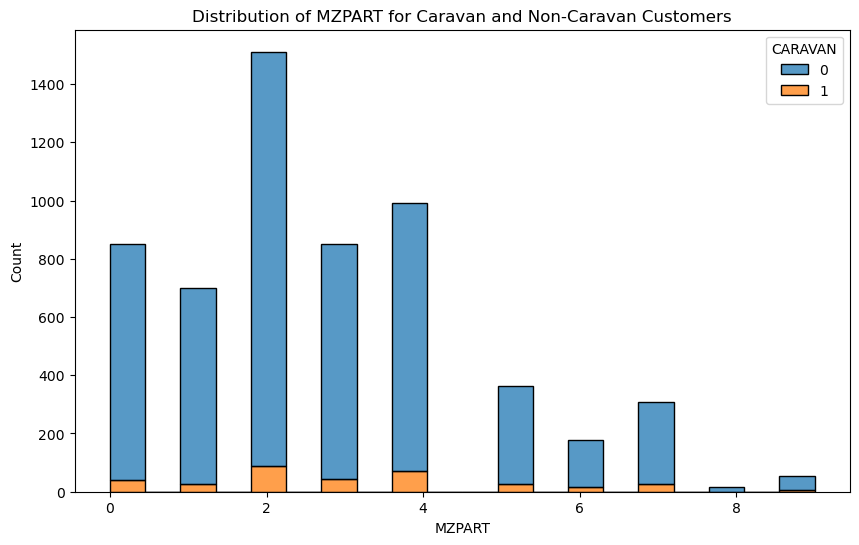

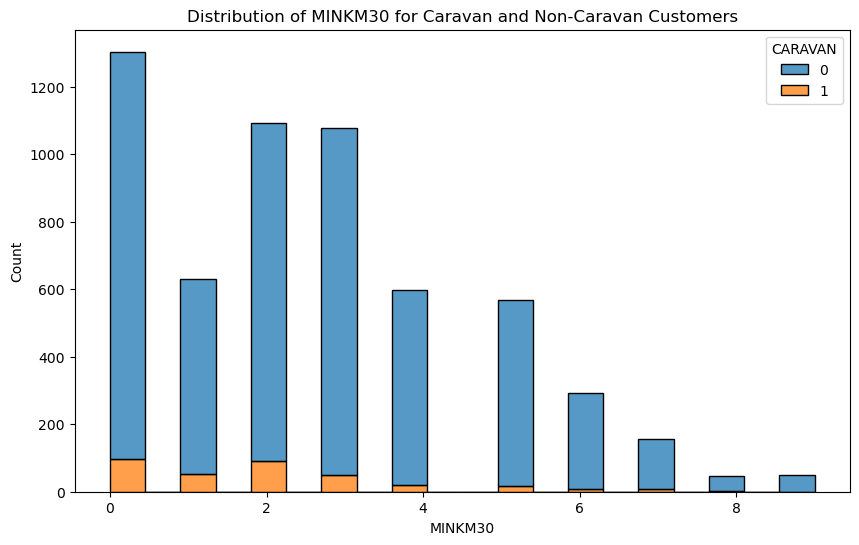

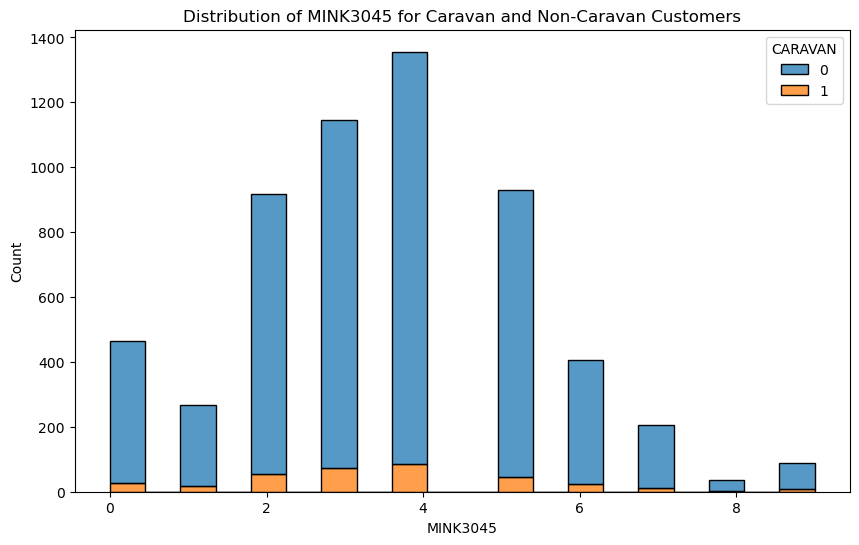

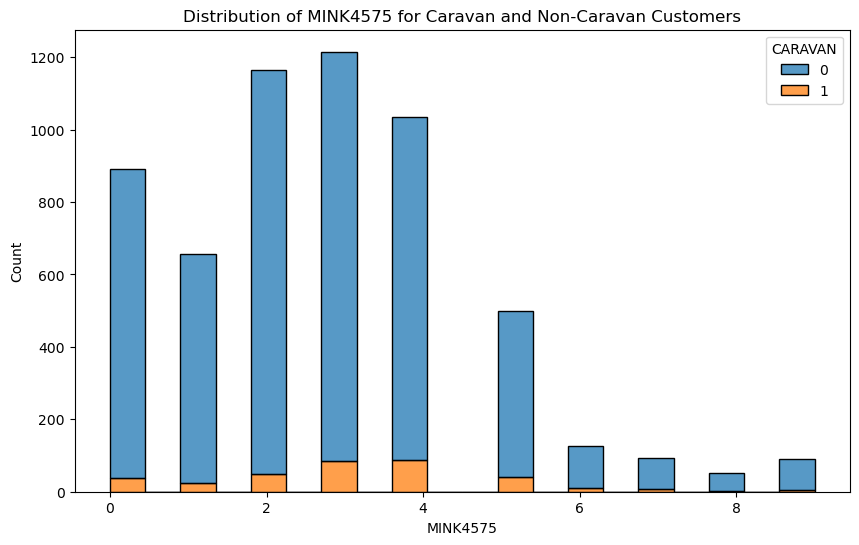

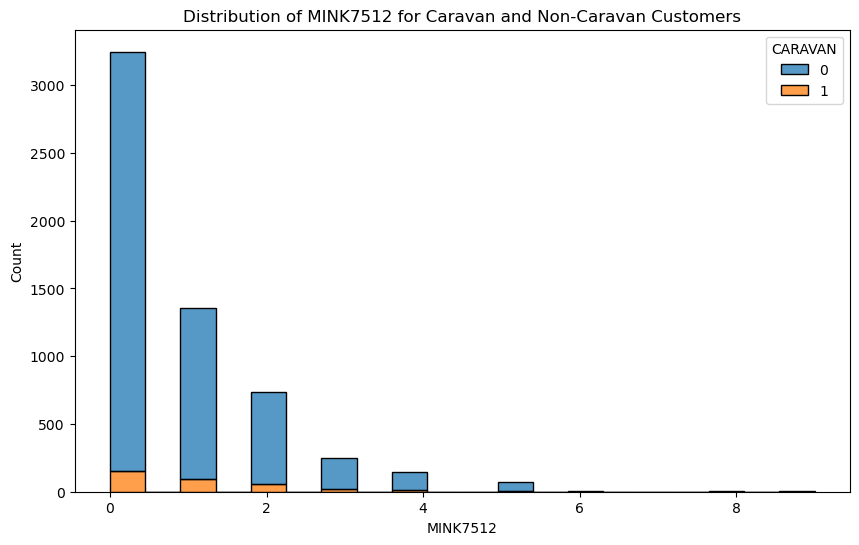

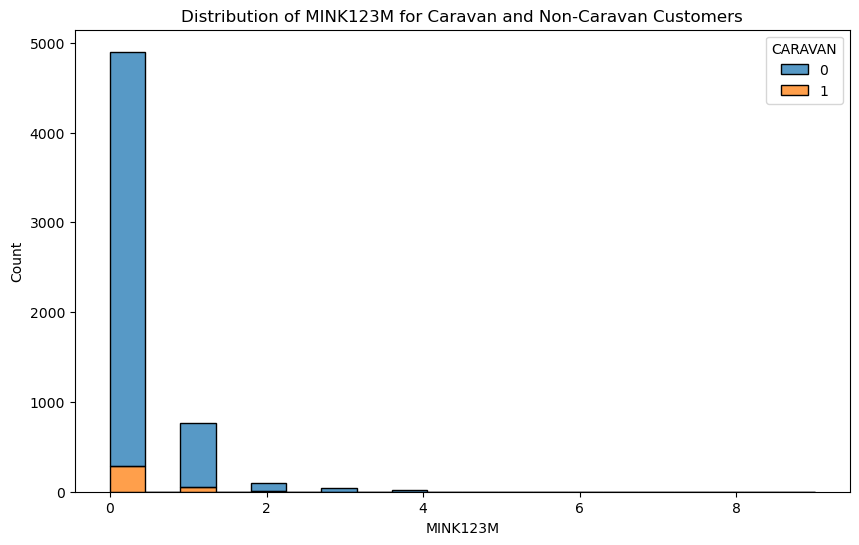

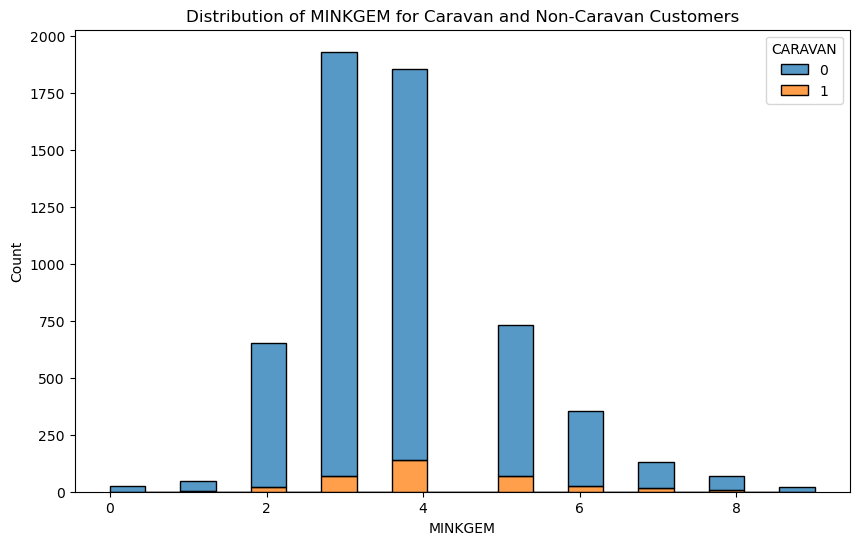

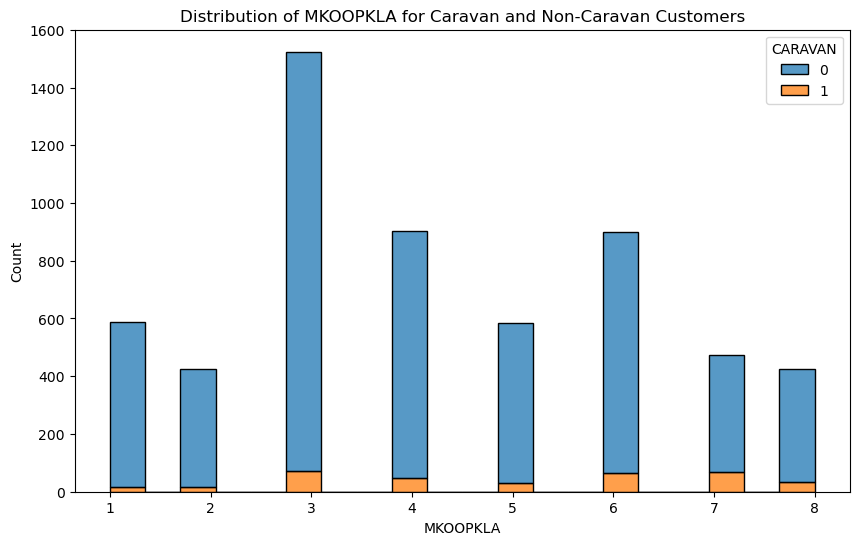

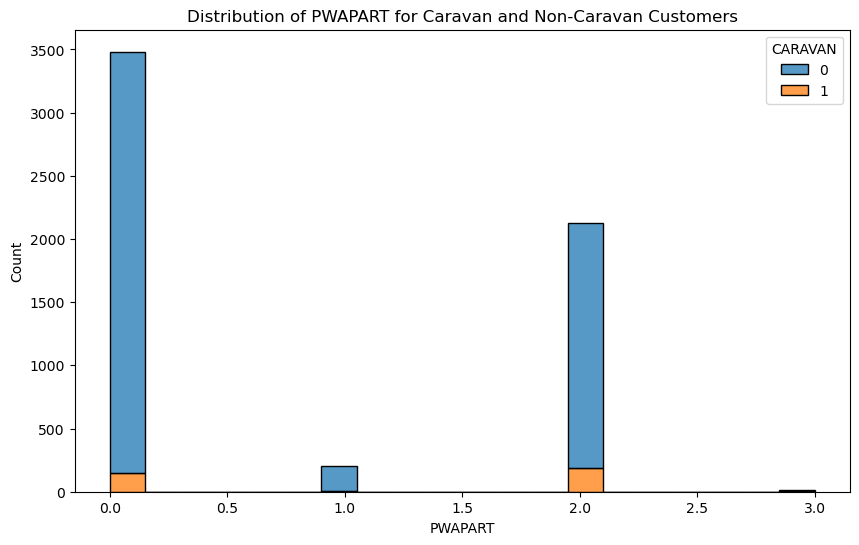

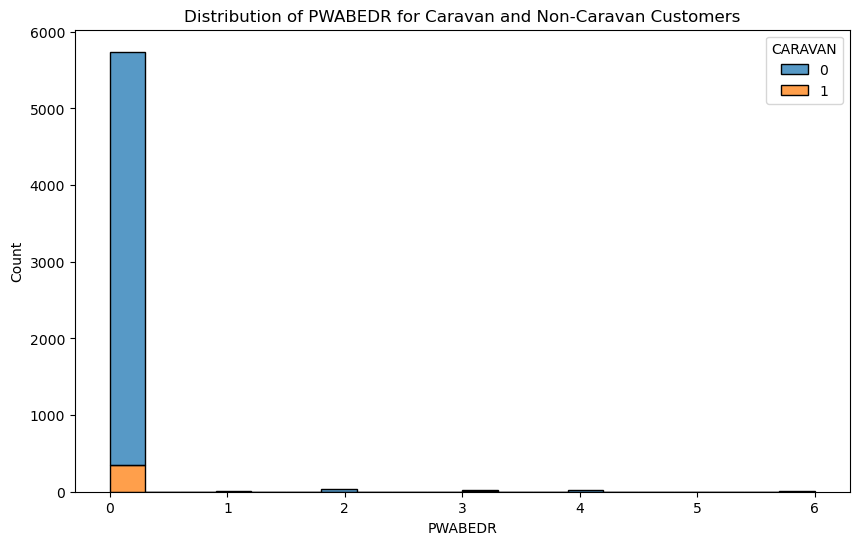

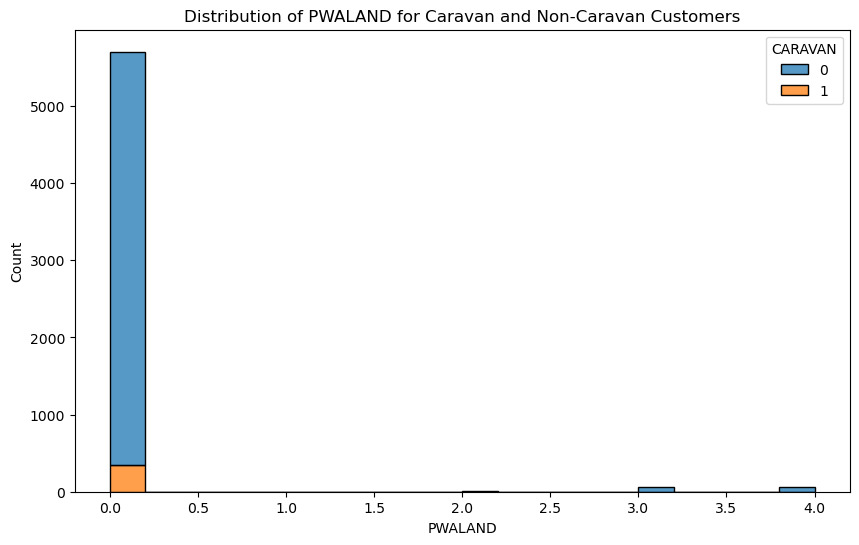

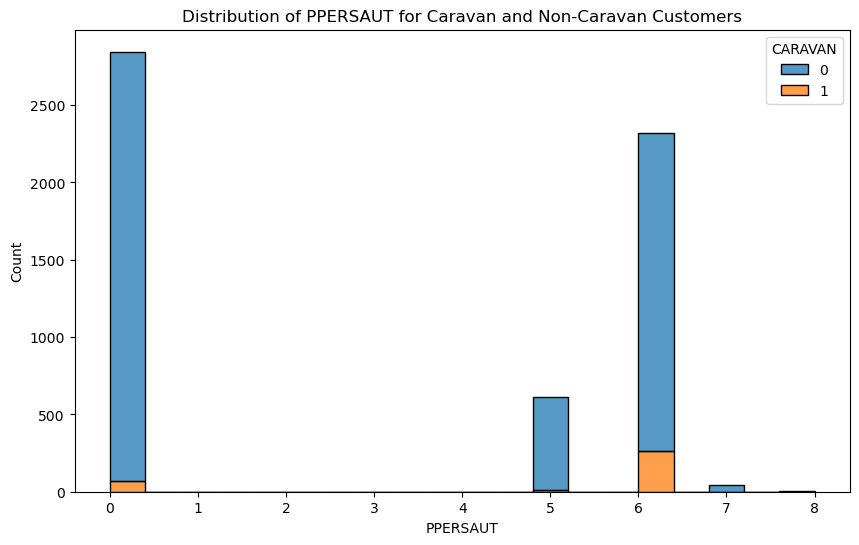

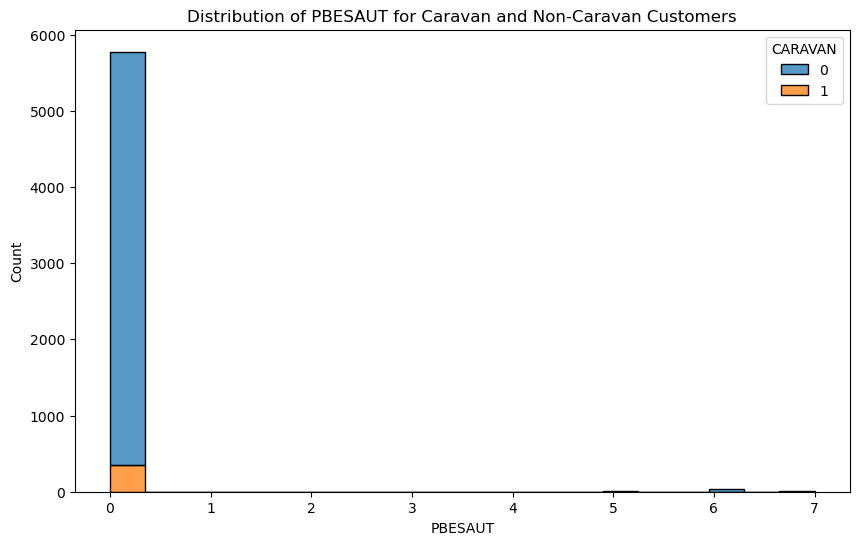

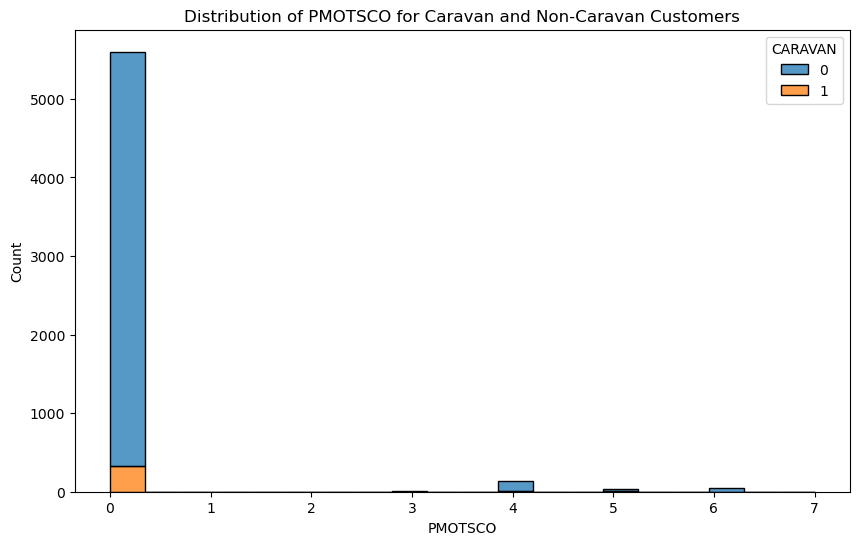

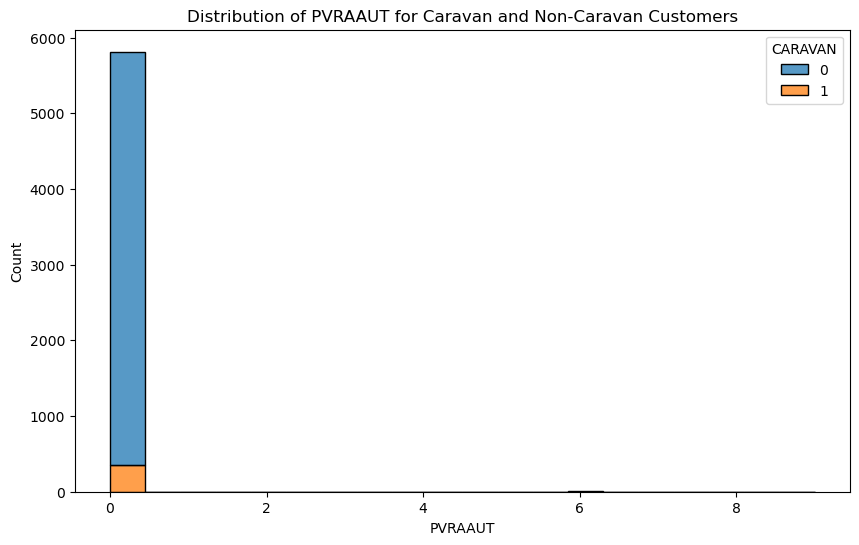

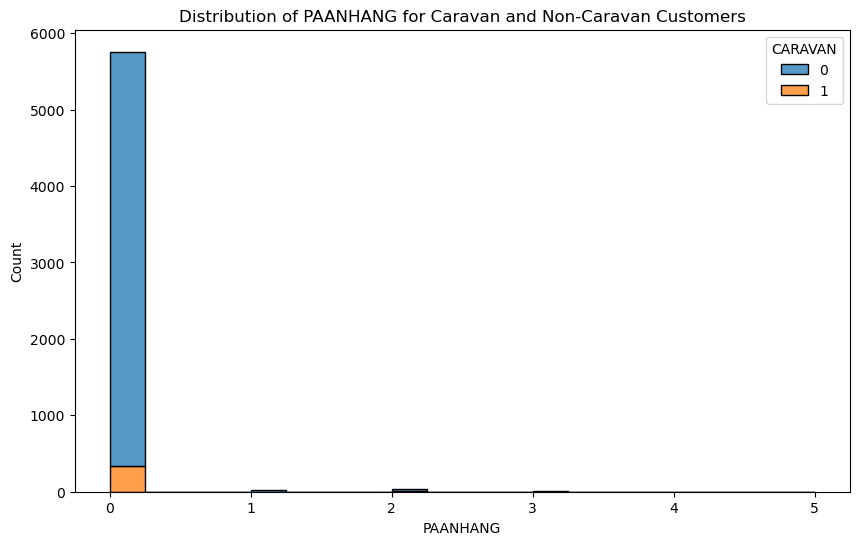

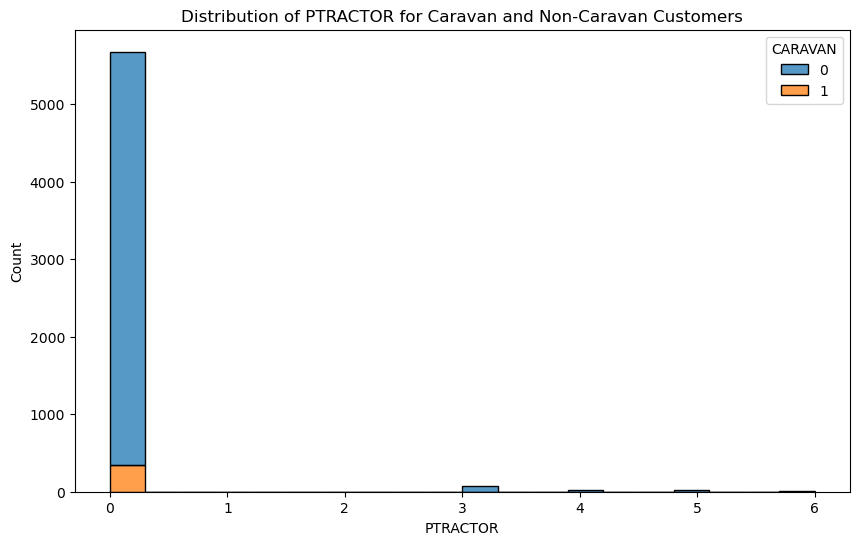

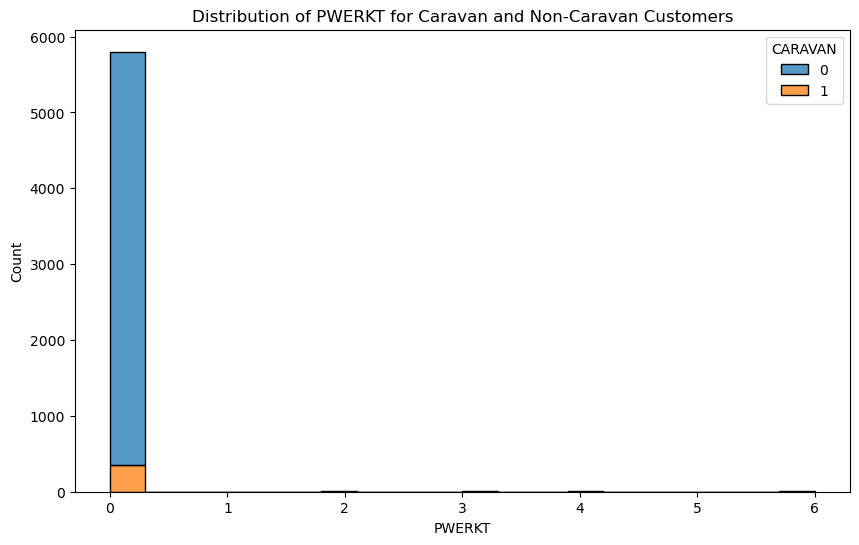

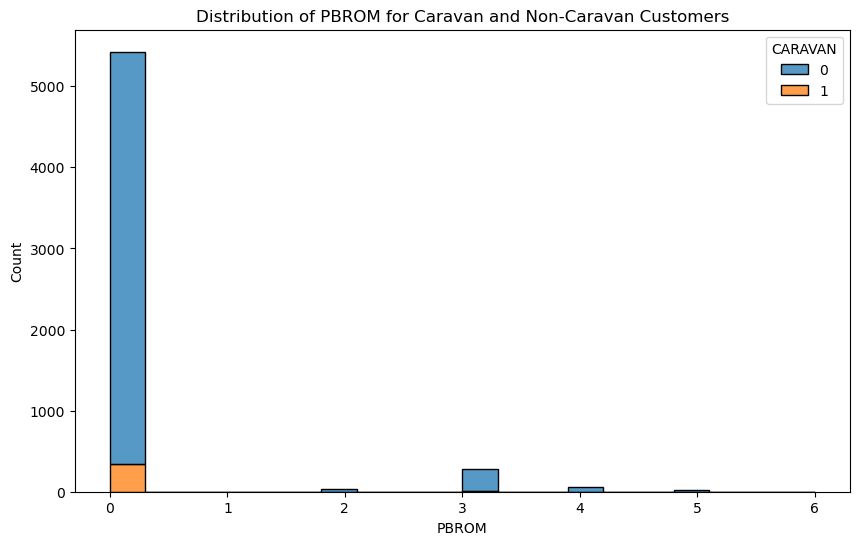

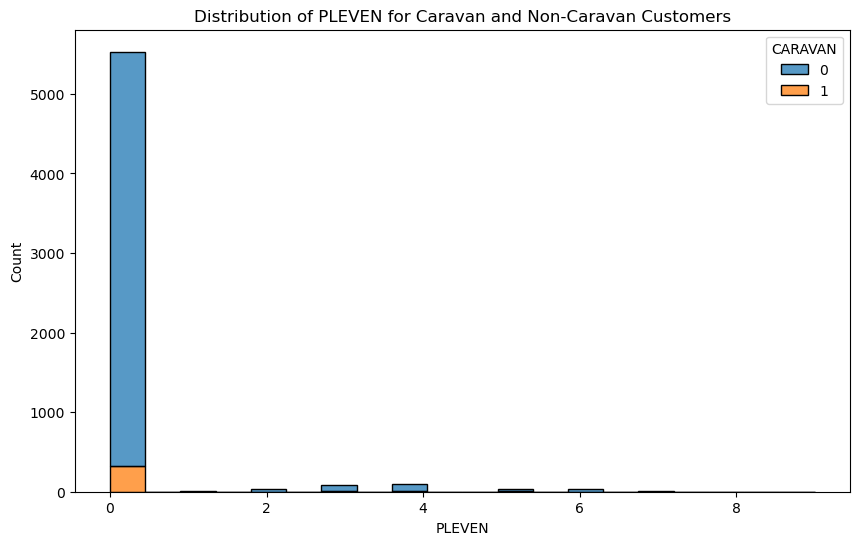

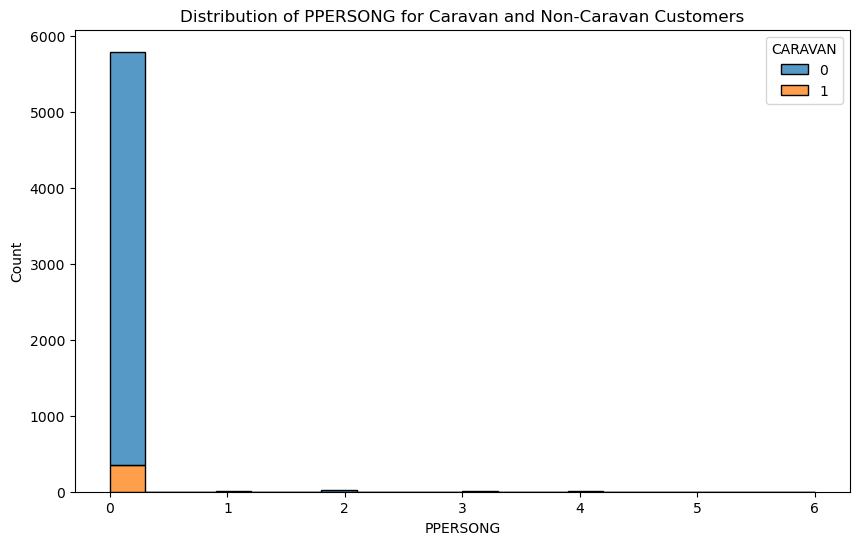

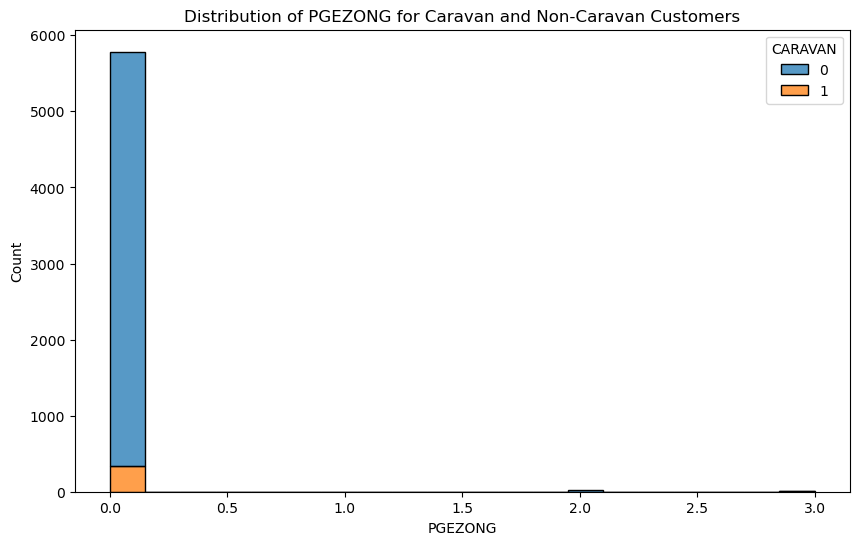

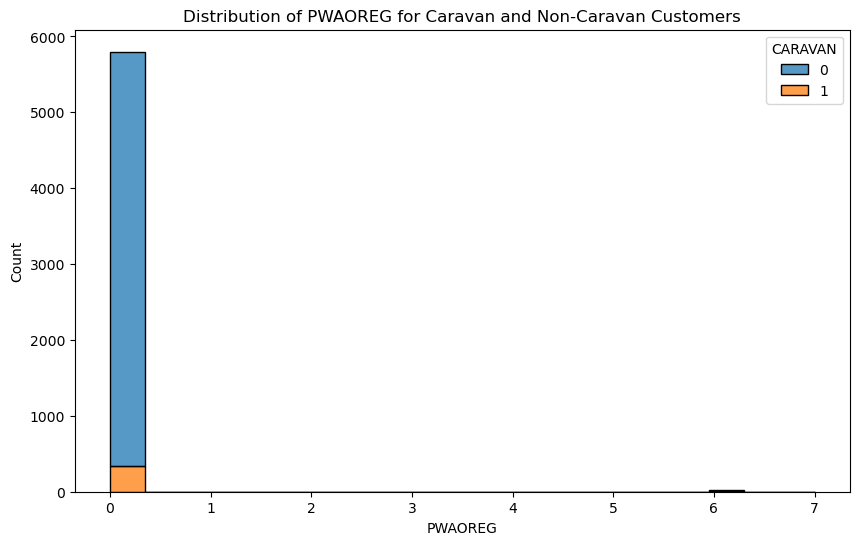

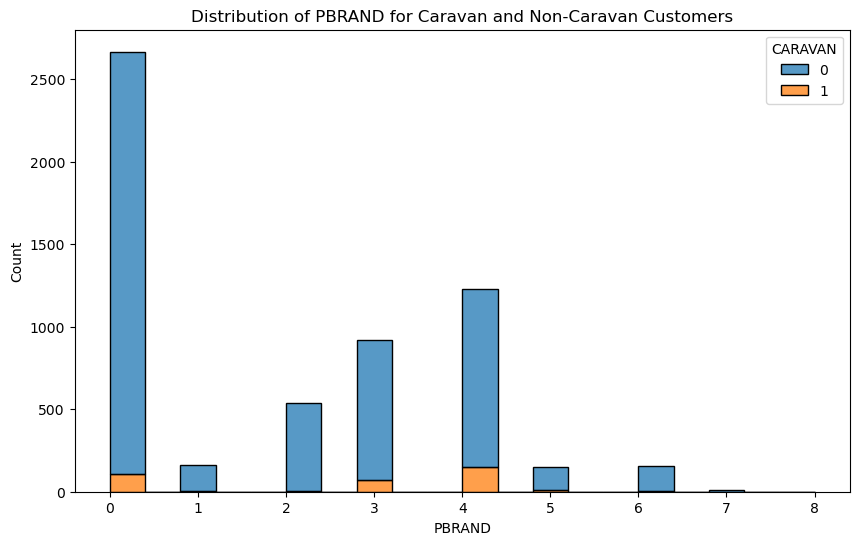

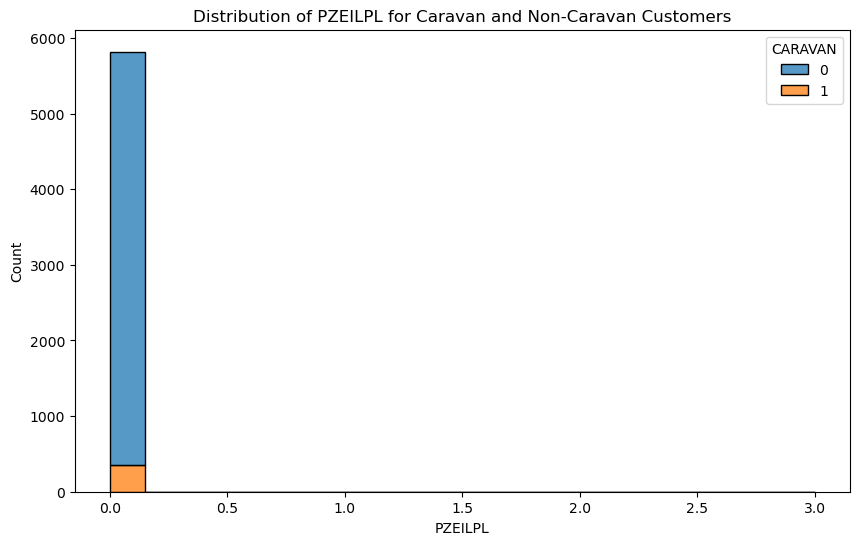

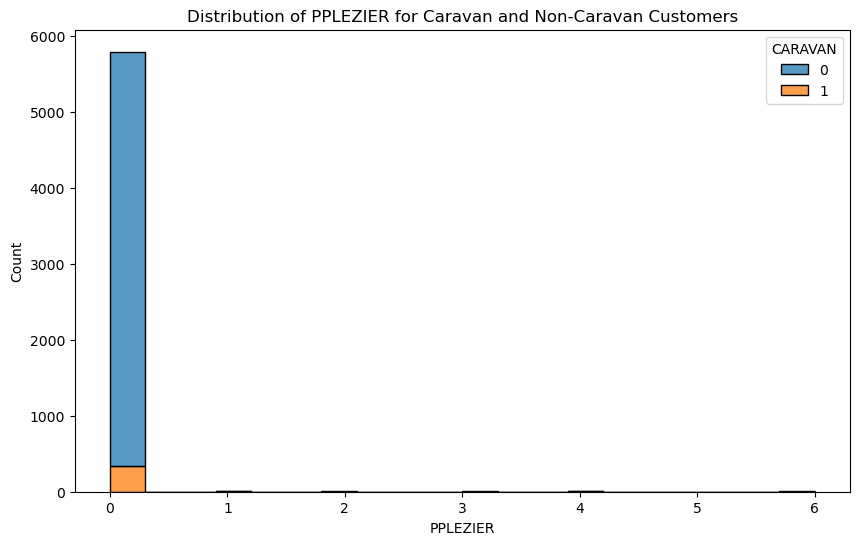

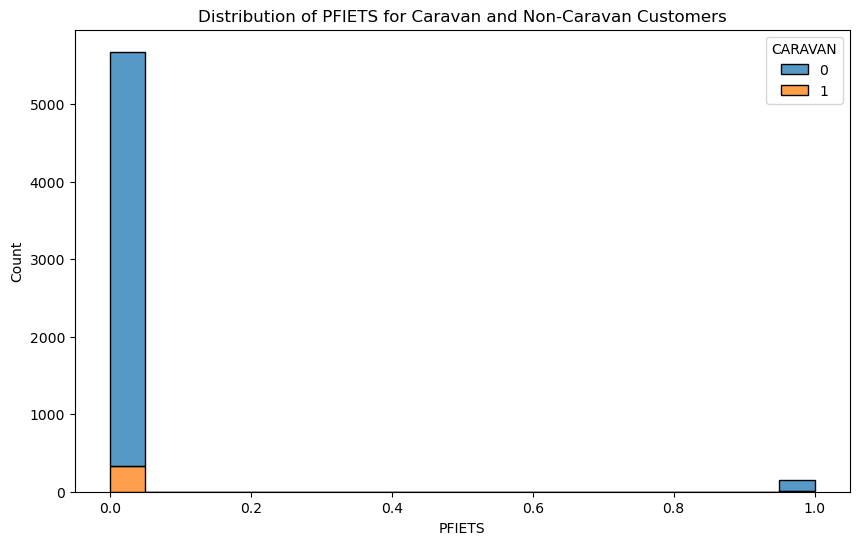

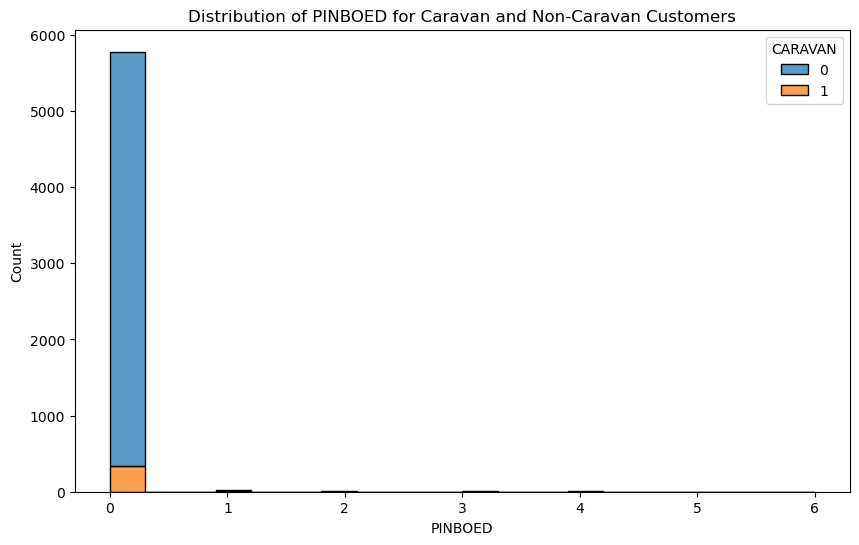

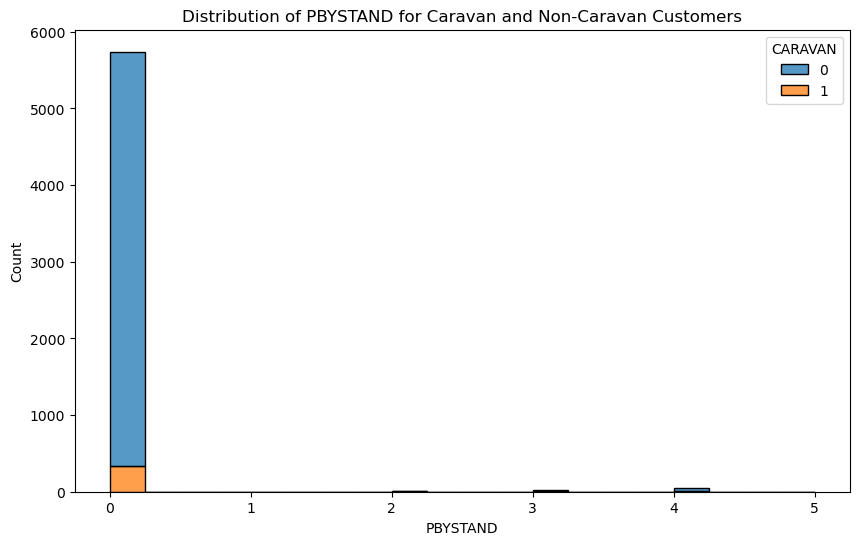

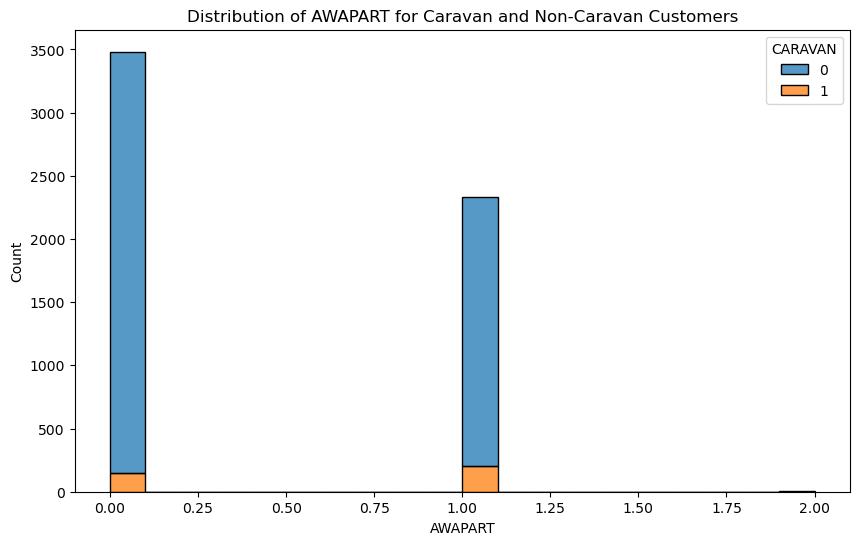

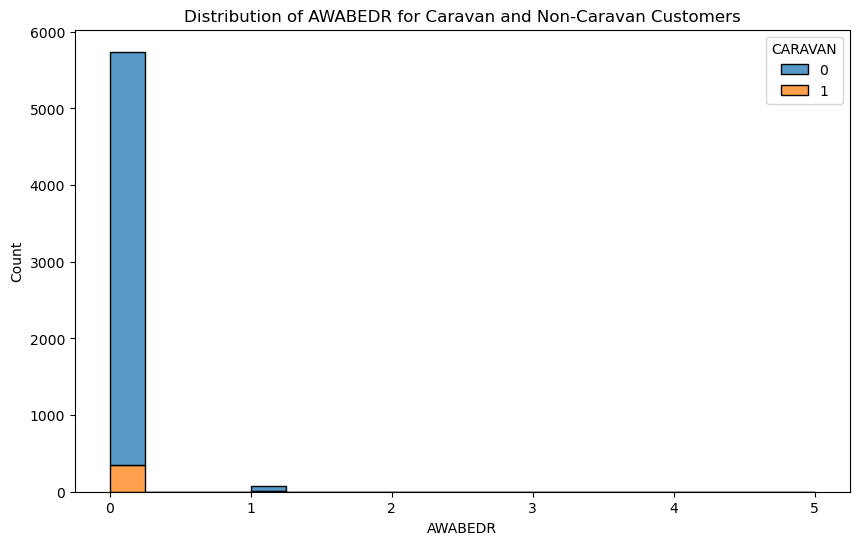

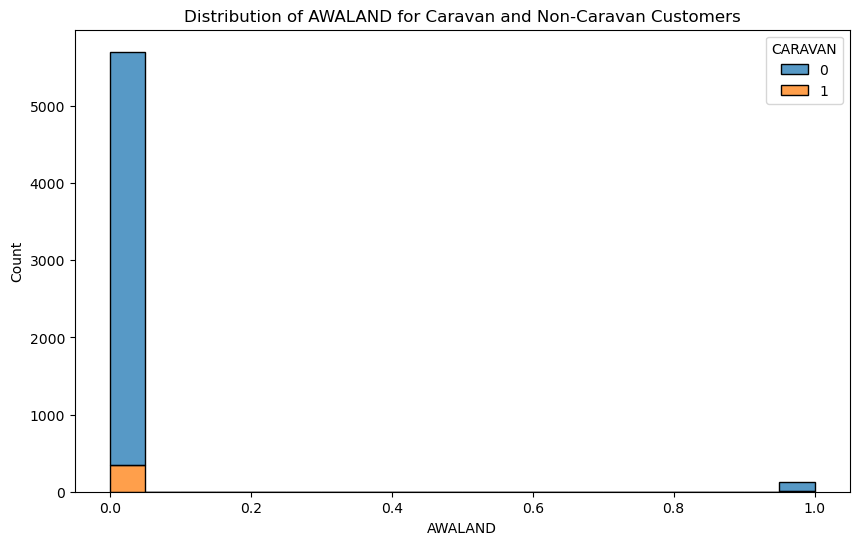

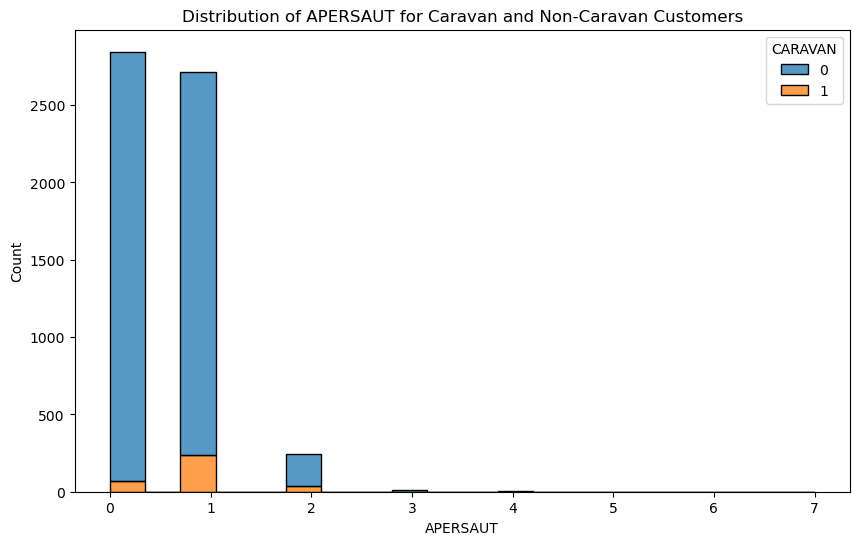

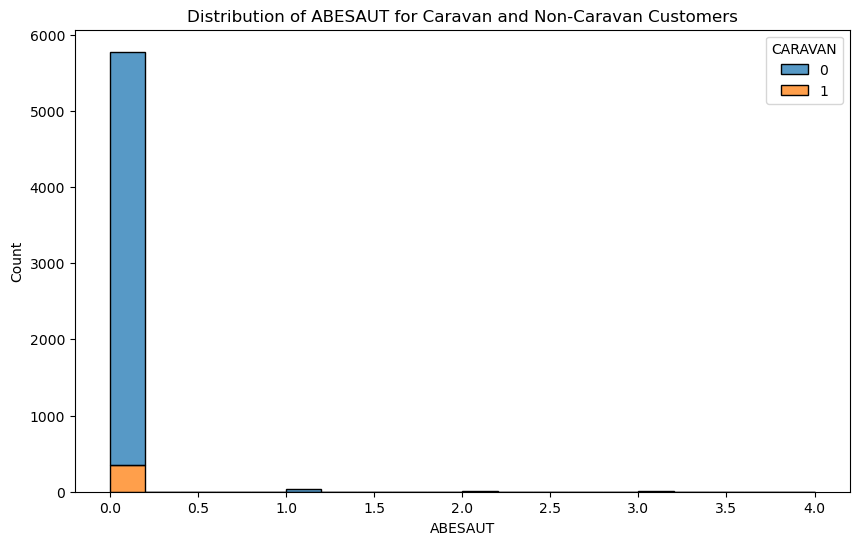

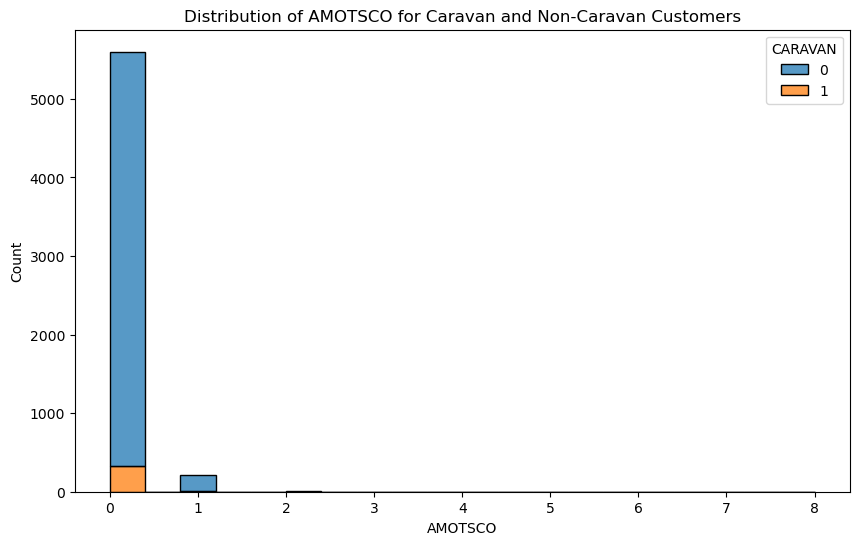

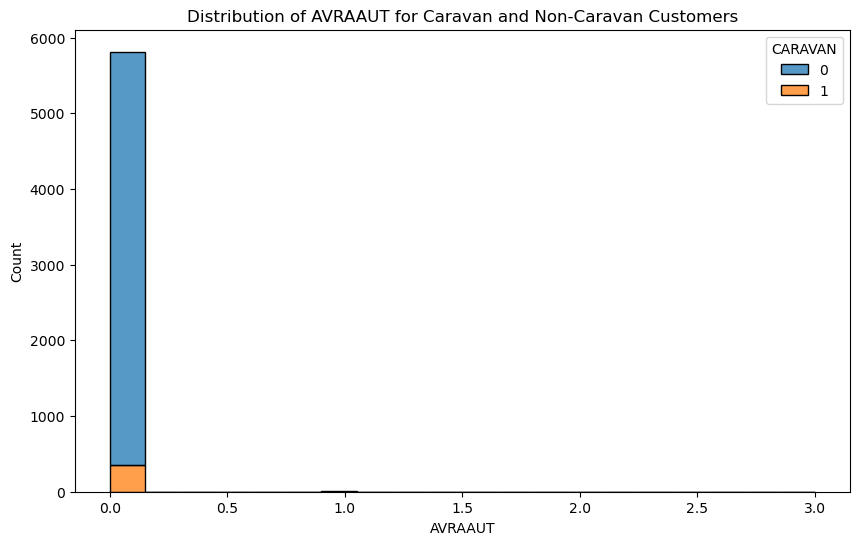

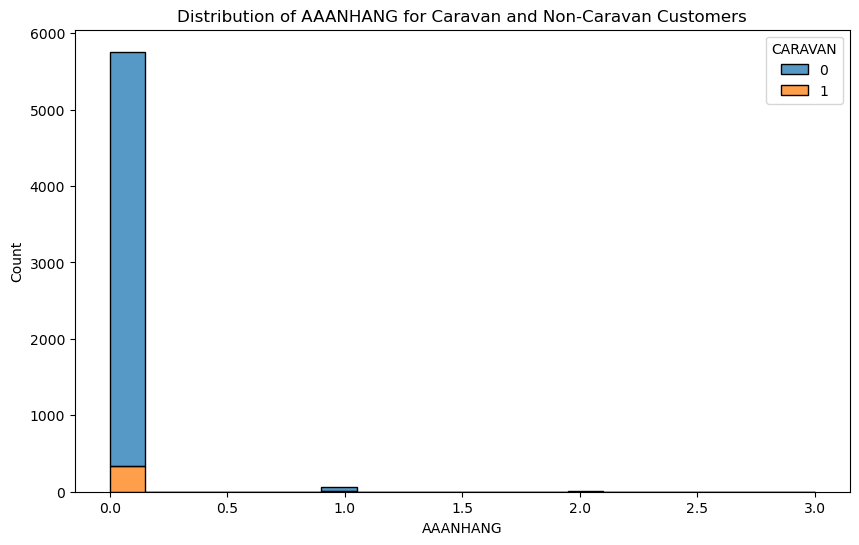

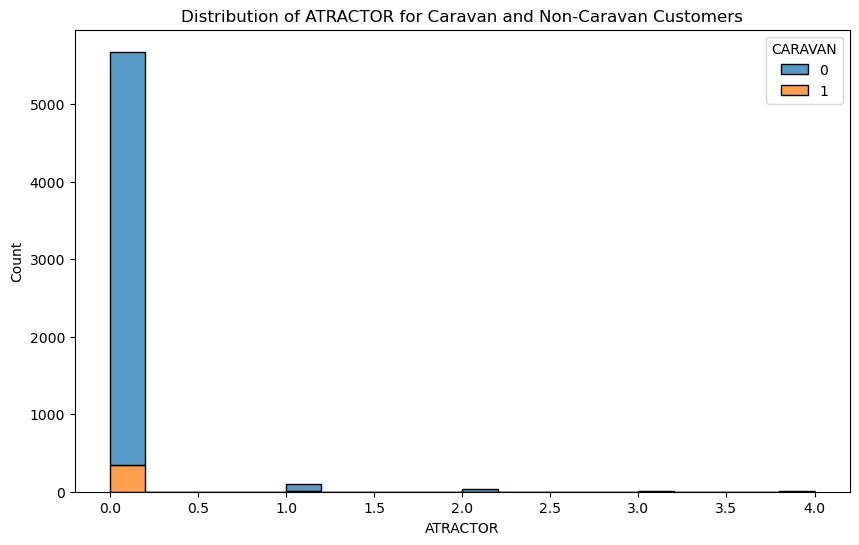

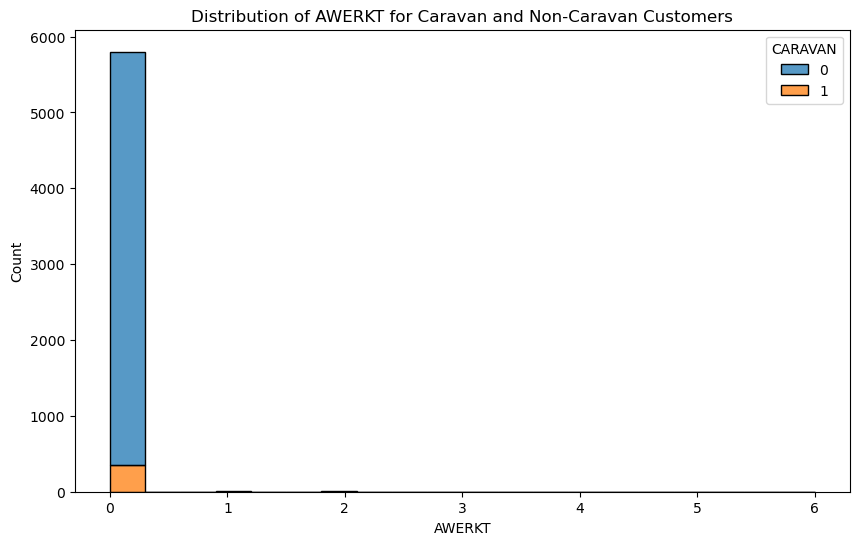

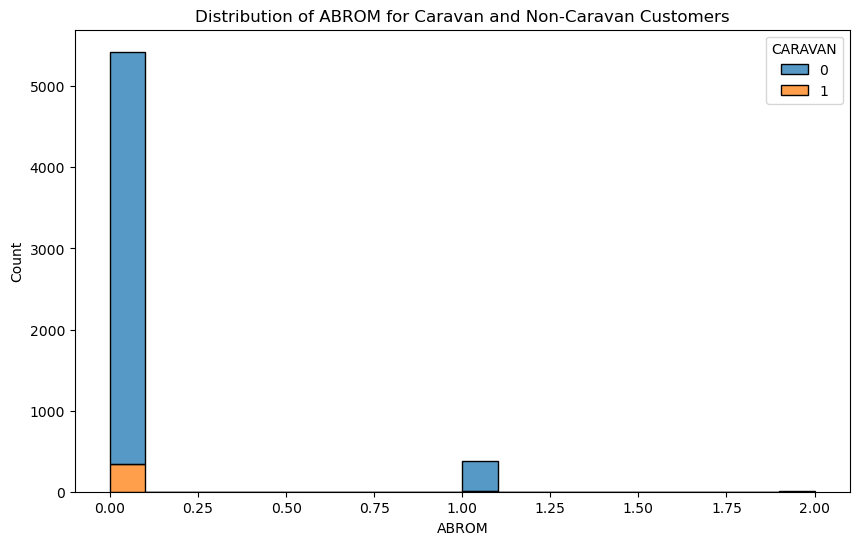

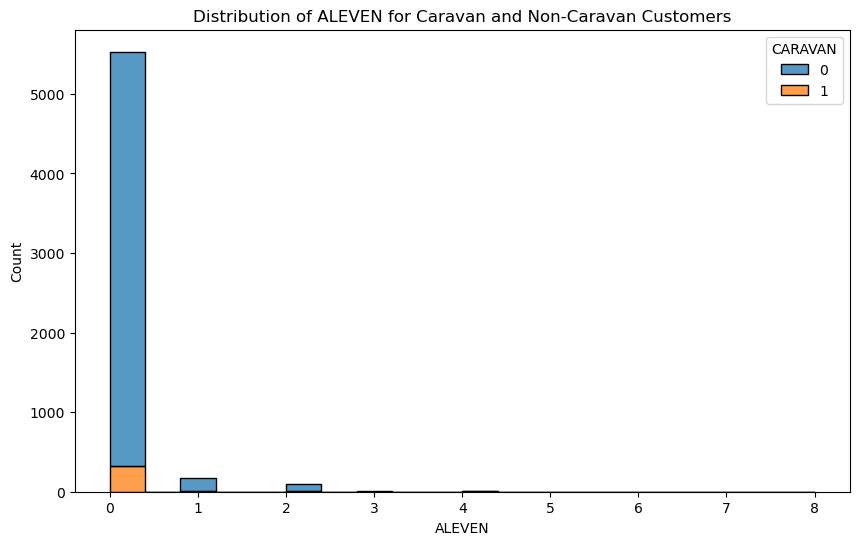

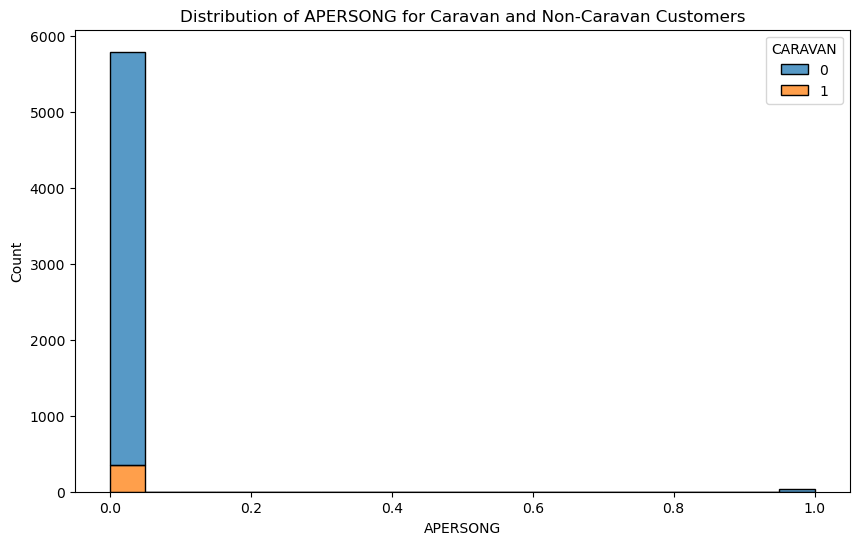

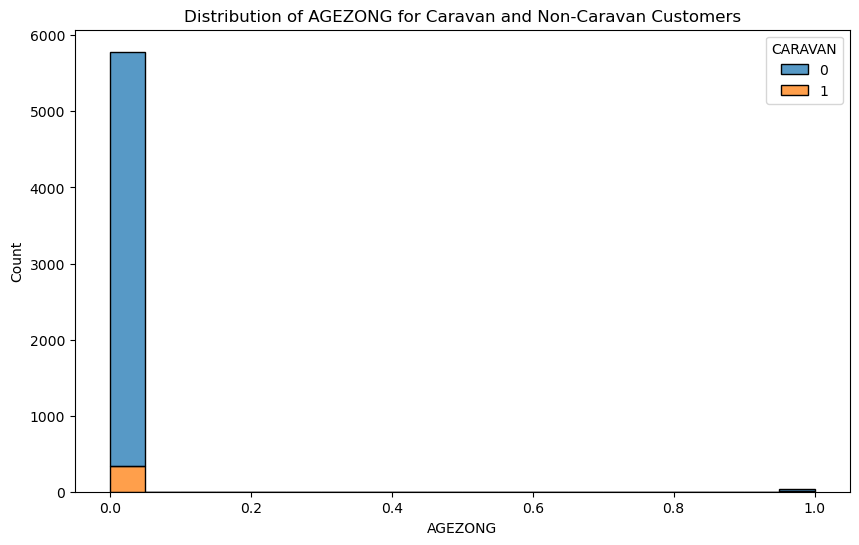

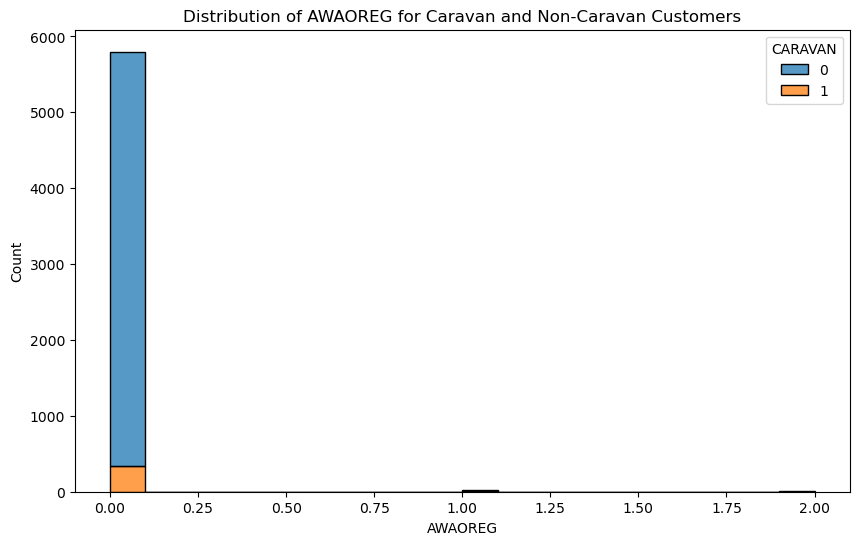

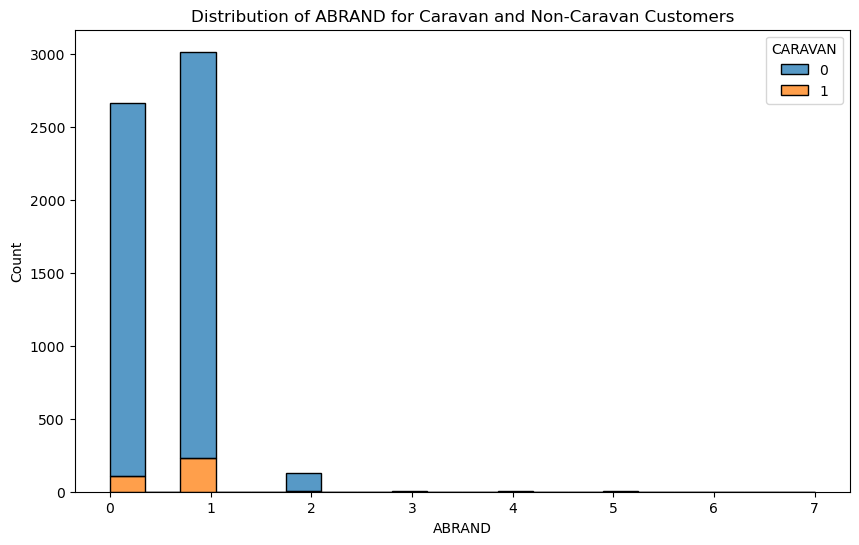

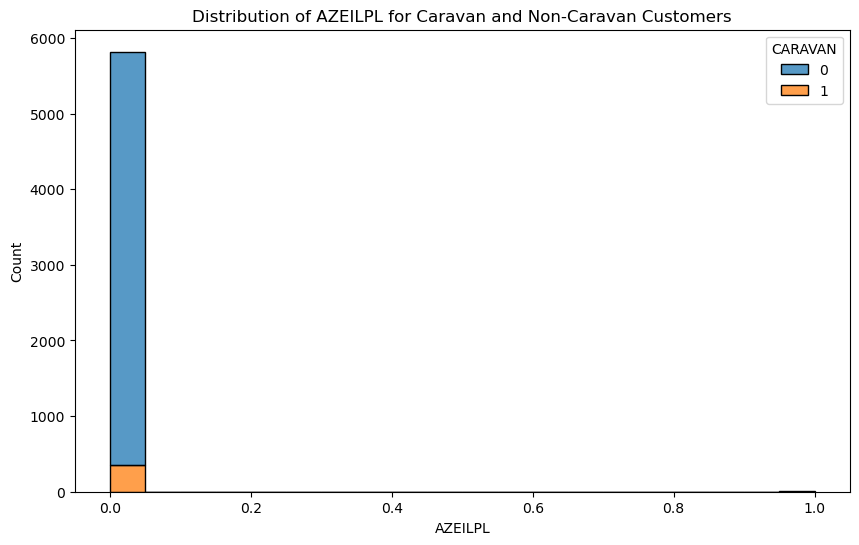

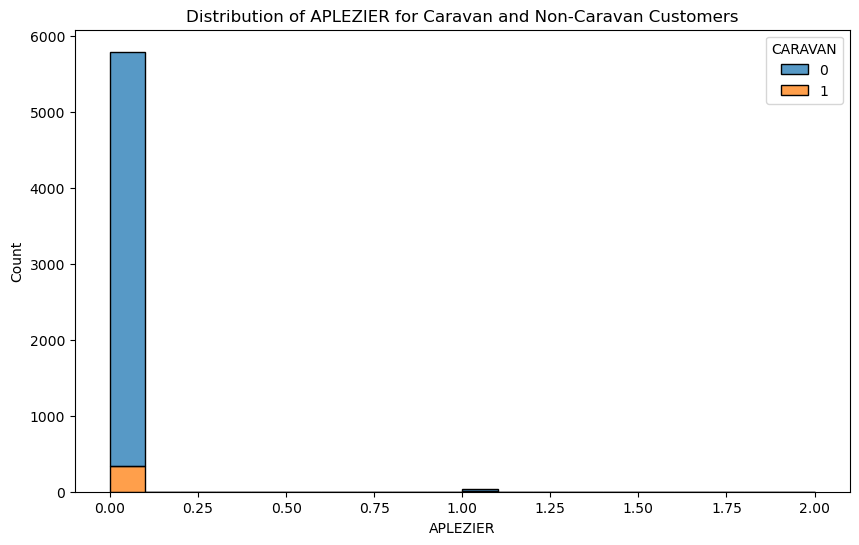

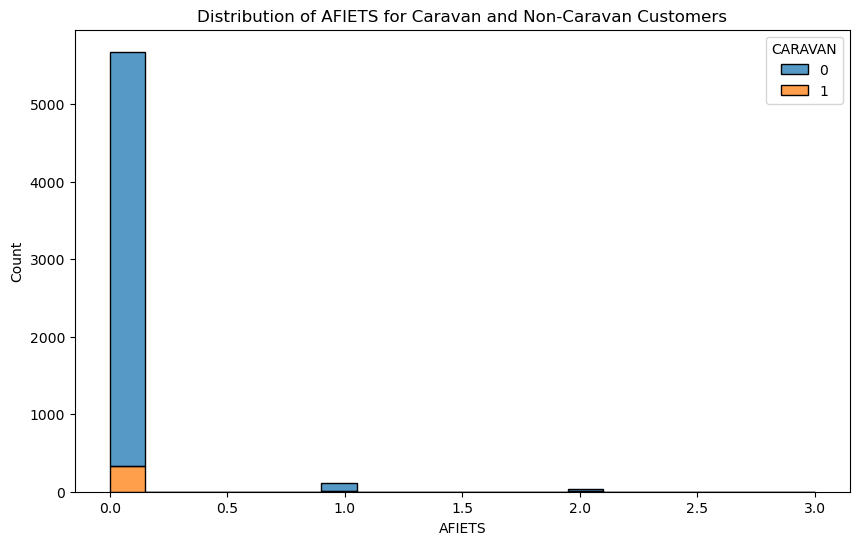

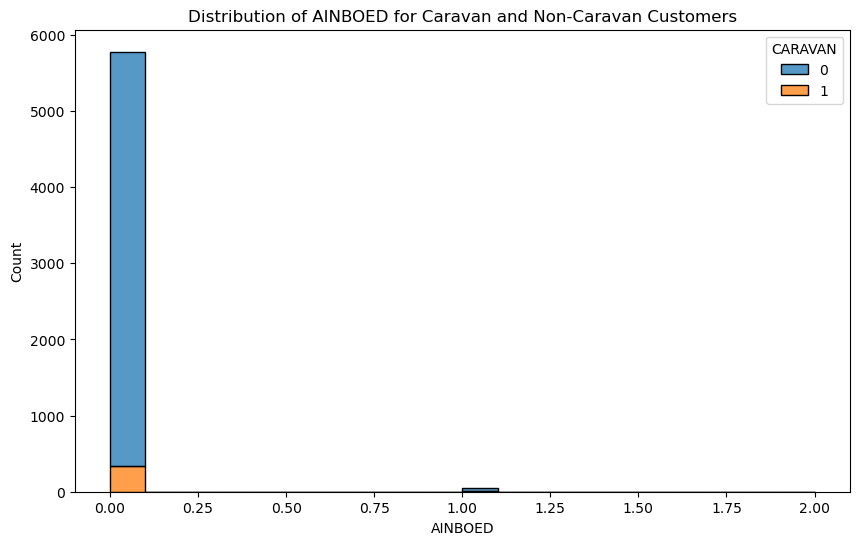

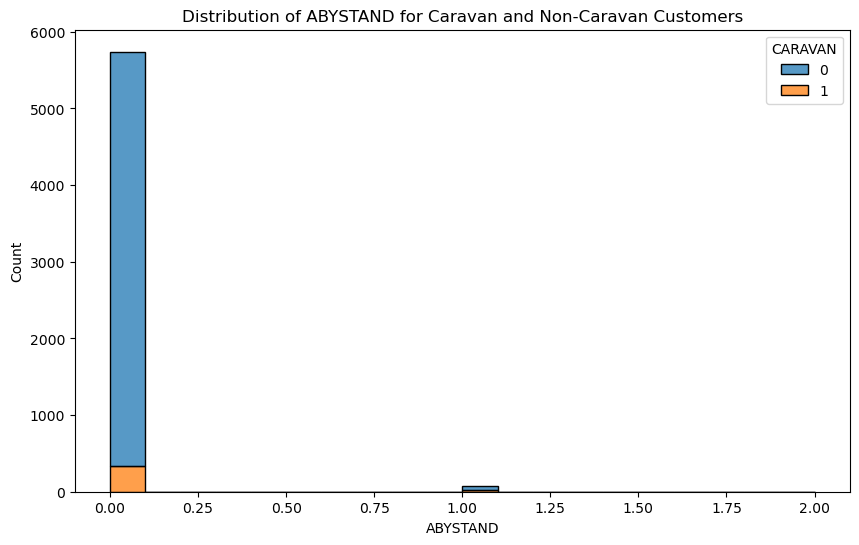

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all numerical features
train_data.hist(bins=20, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Compare distributions of features for customers with and without a caravan policy
for col in train_data.columns:
    if col != 'CARAVAN':  # Assuming 'CARAVAN' is the target column
        plt.figure(figsize=(10, 6))
        sns.histplot(data=train_data, x=col, hue='CARAVAN', multiple='stack', bins=20)
        plt.title(f'Distribution of {col} for Caravan and Non-Caravan Customers')
        plt.show()


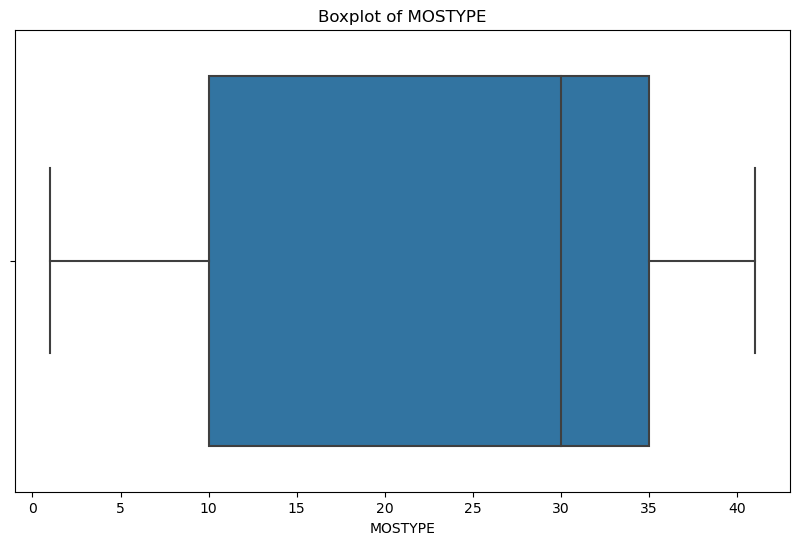

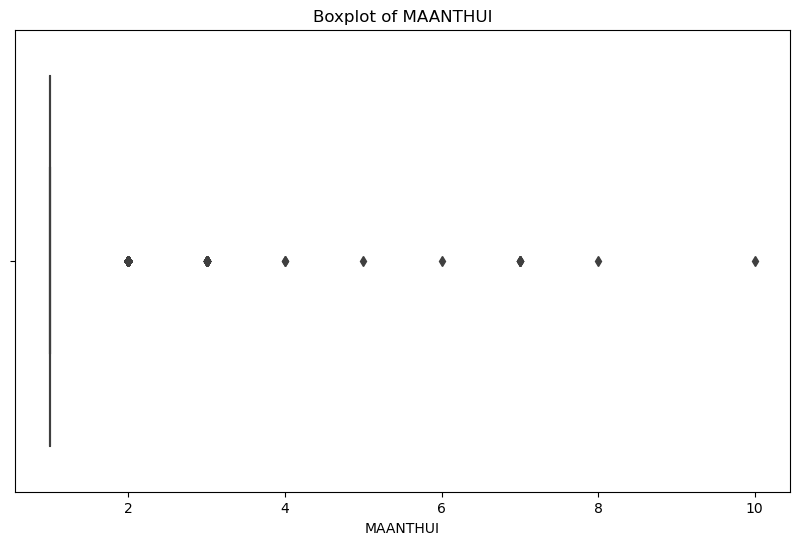

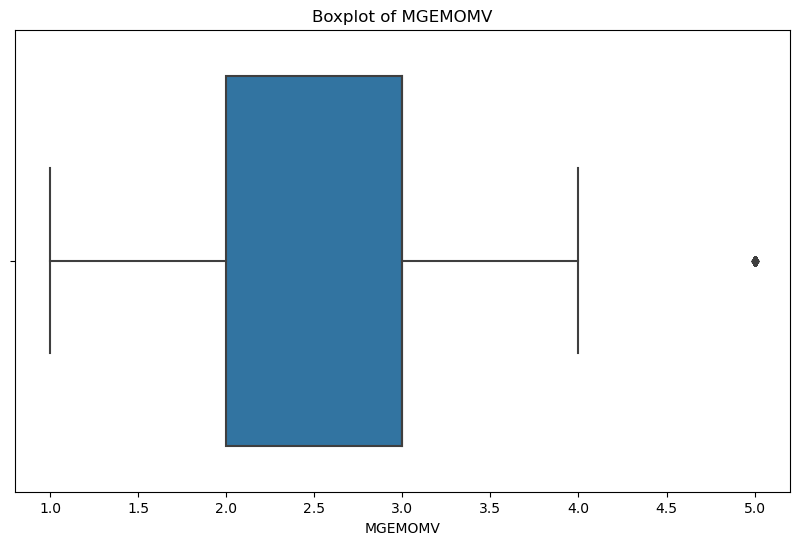

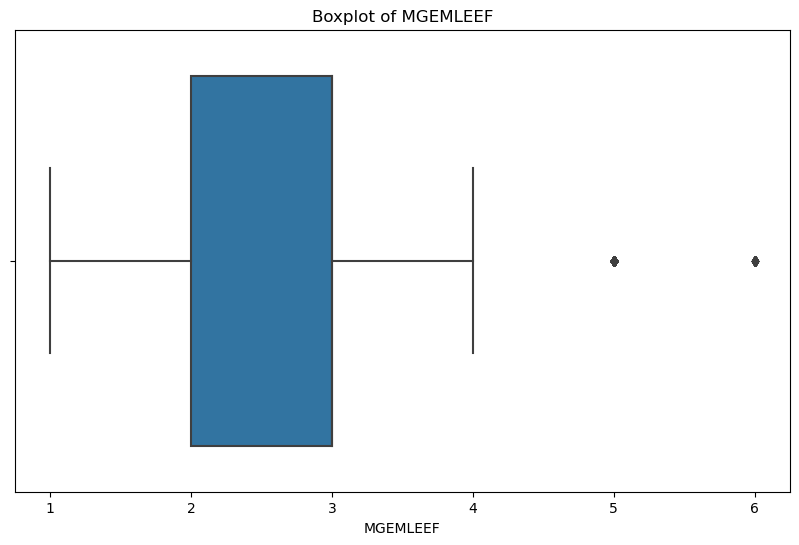

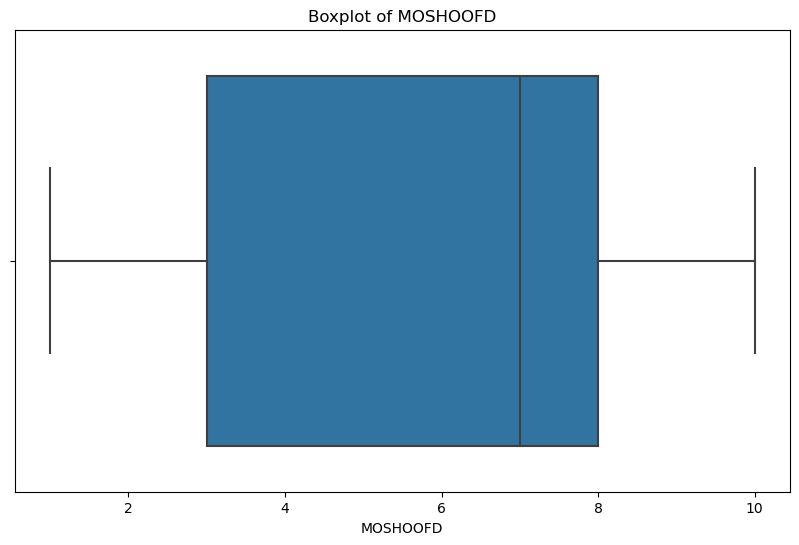

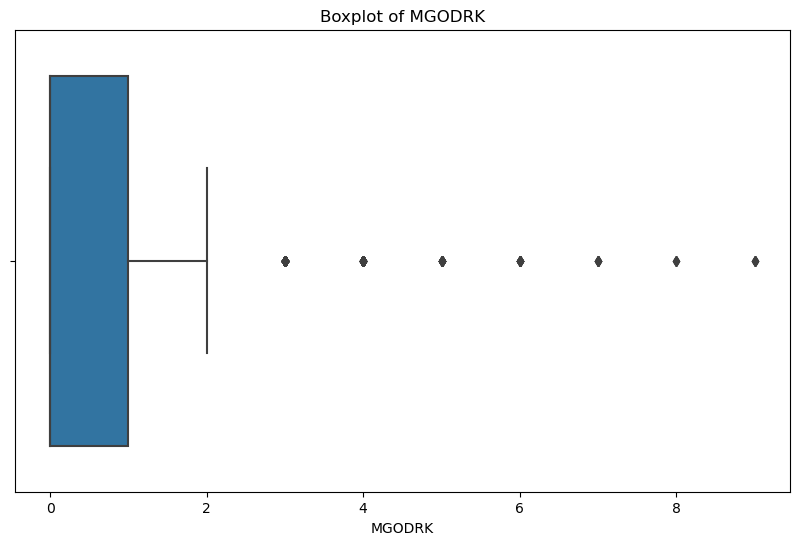

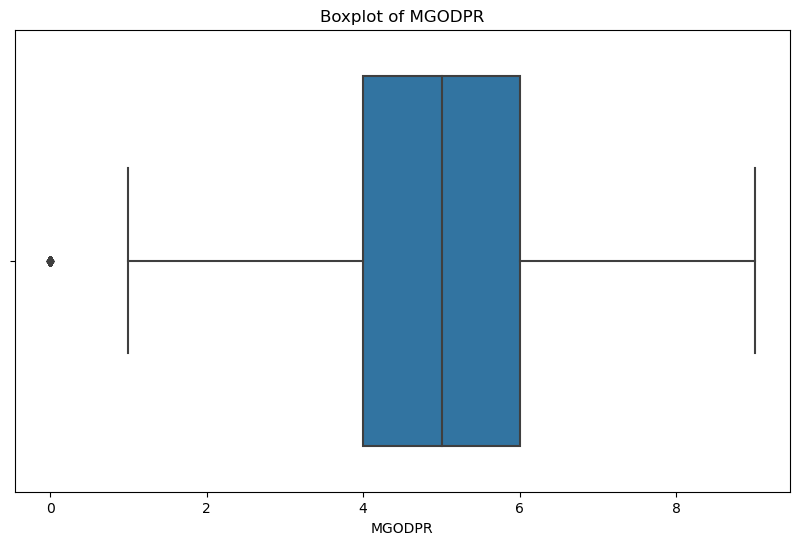

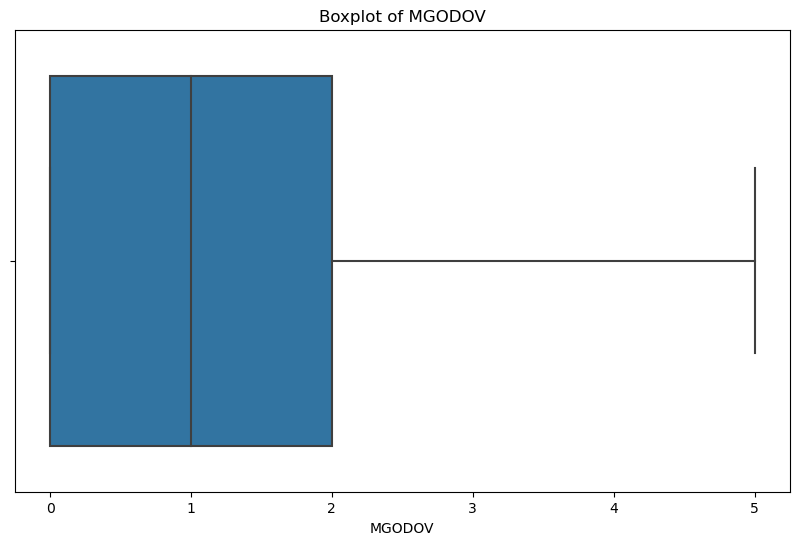

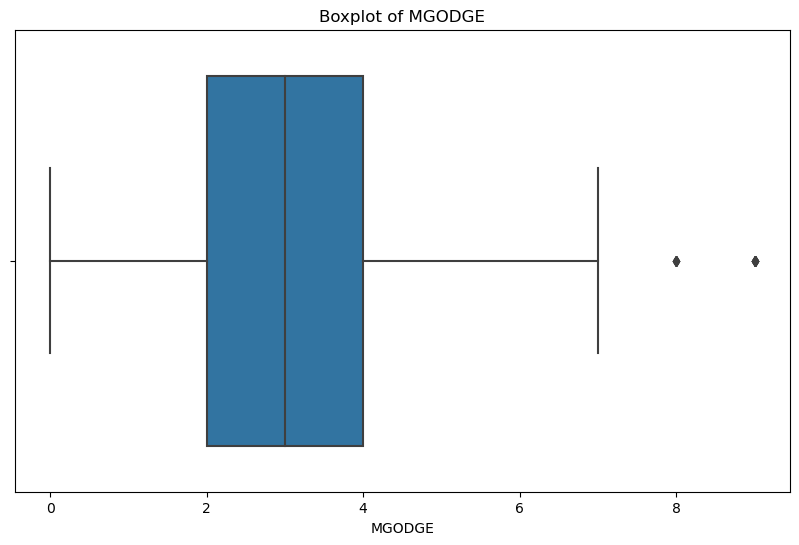

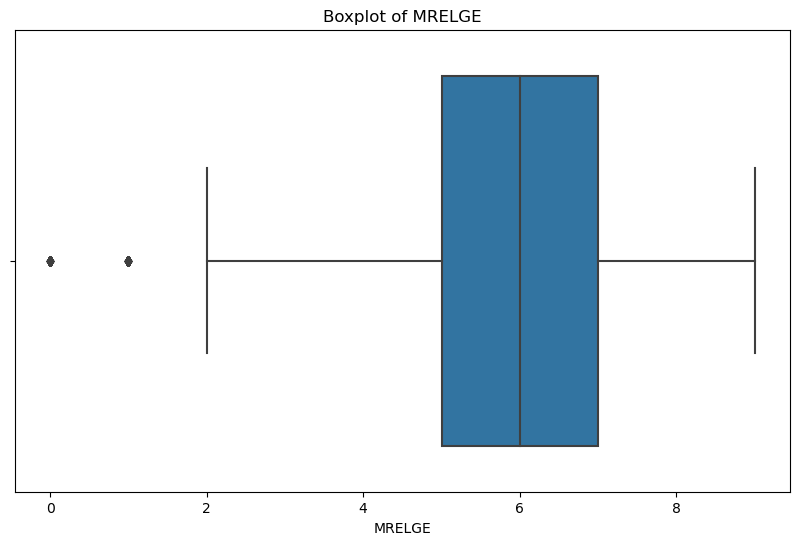

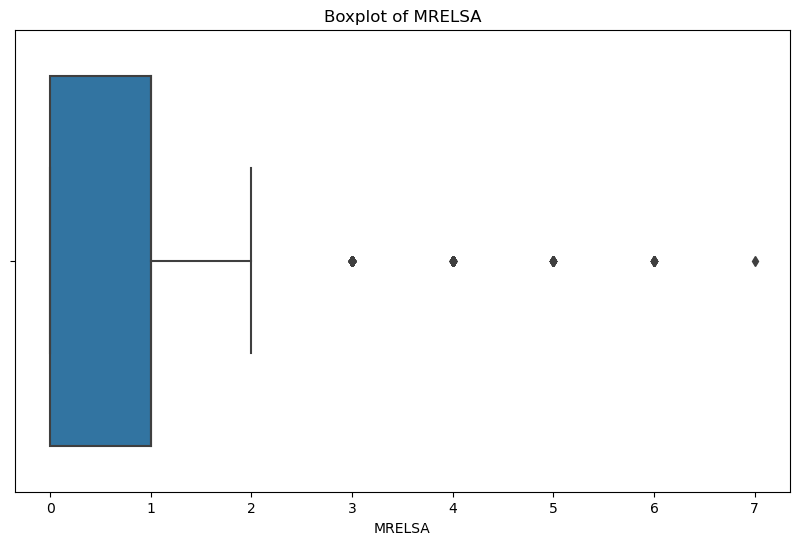

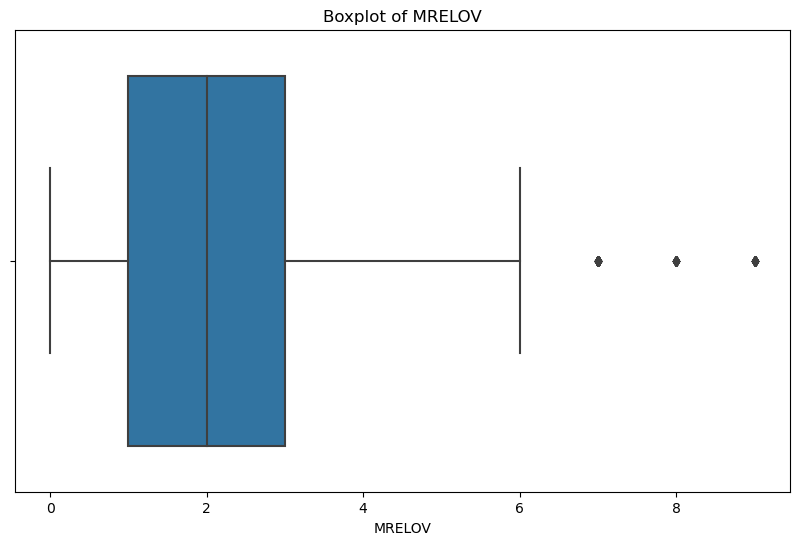

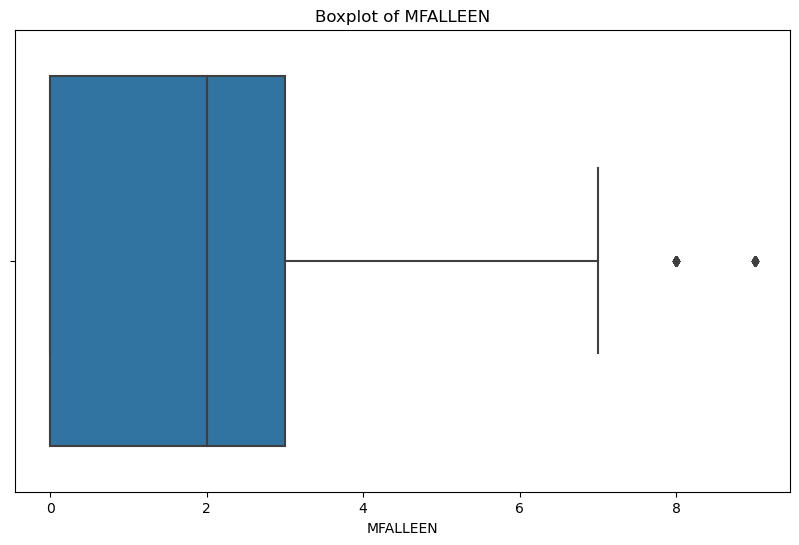

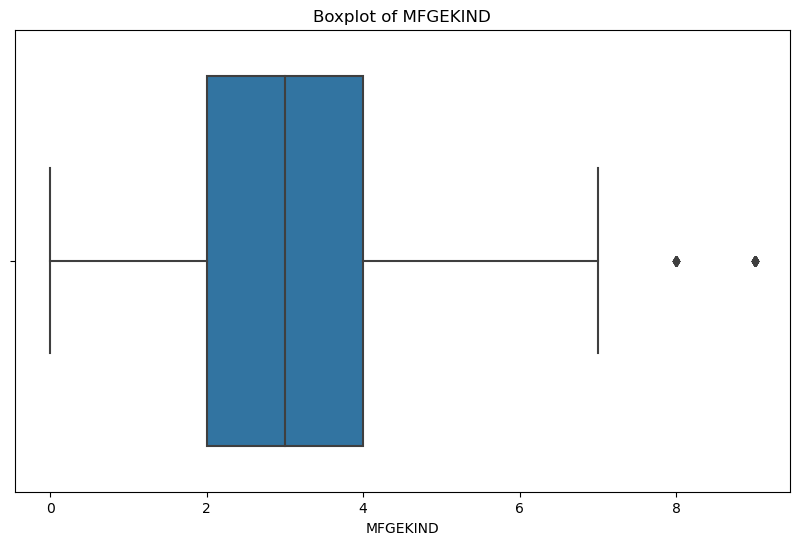

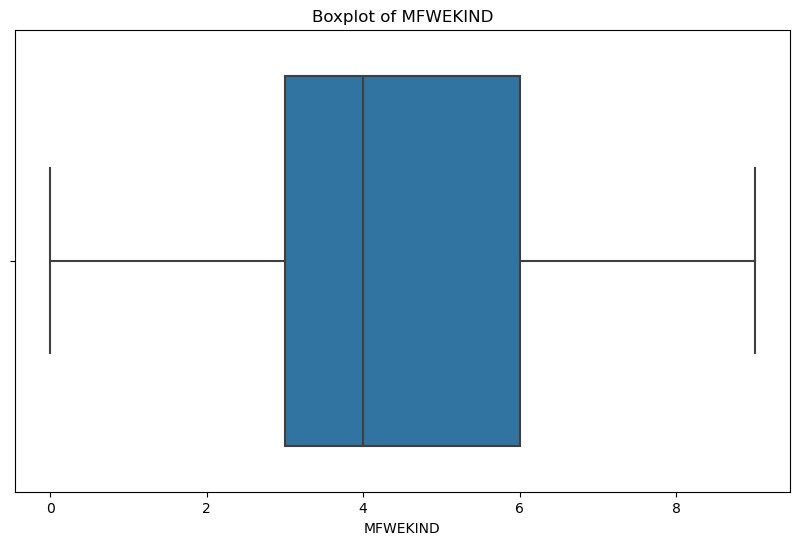

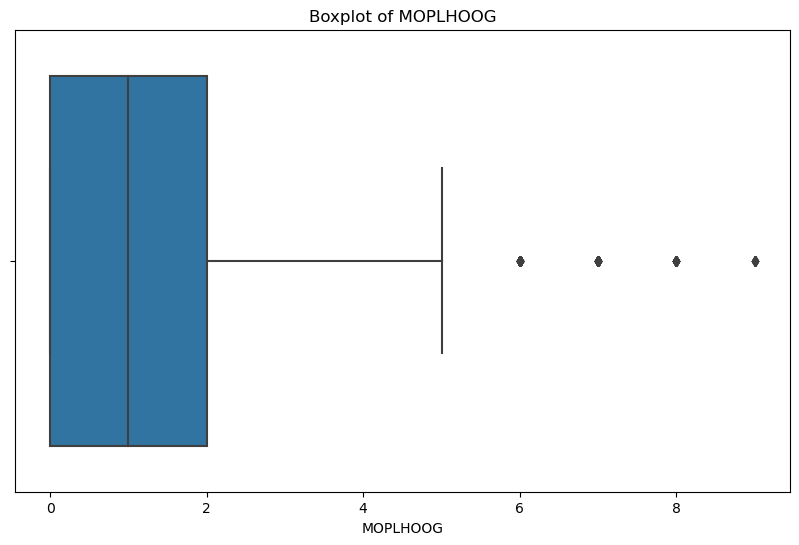

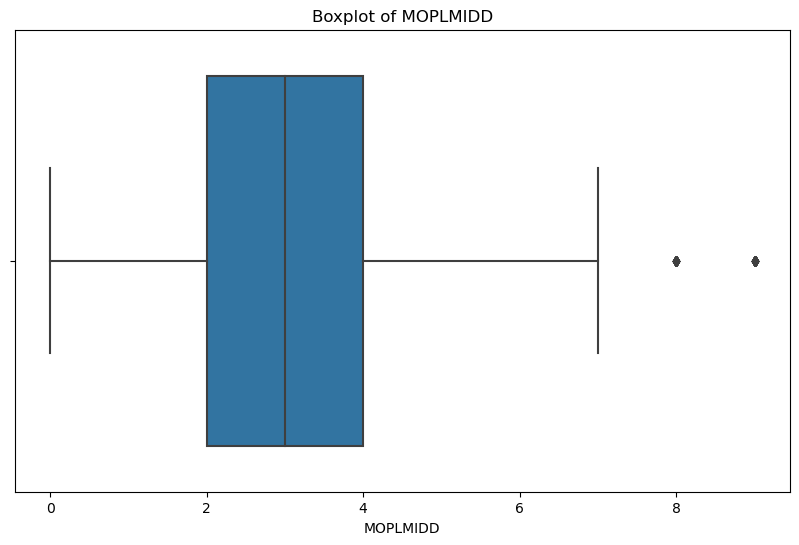

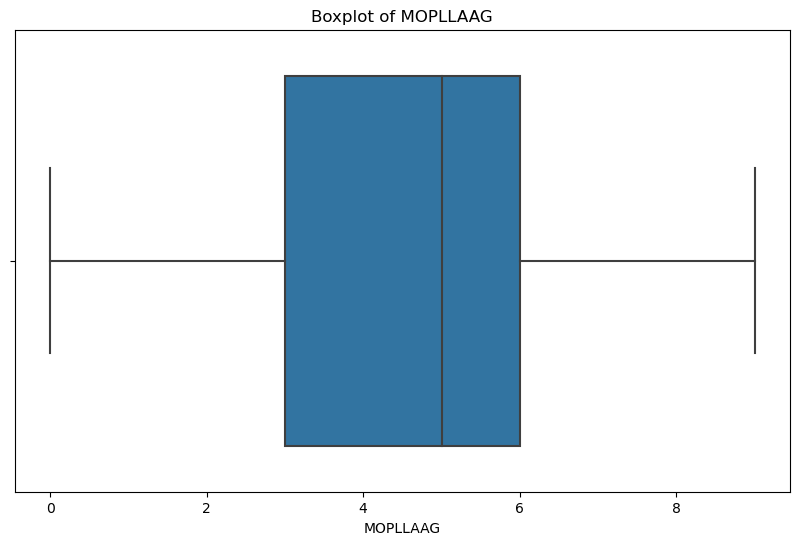

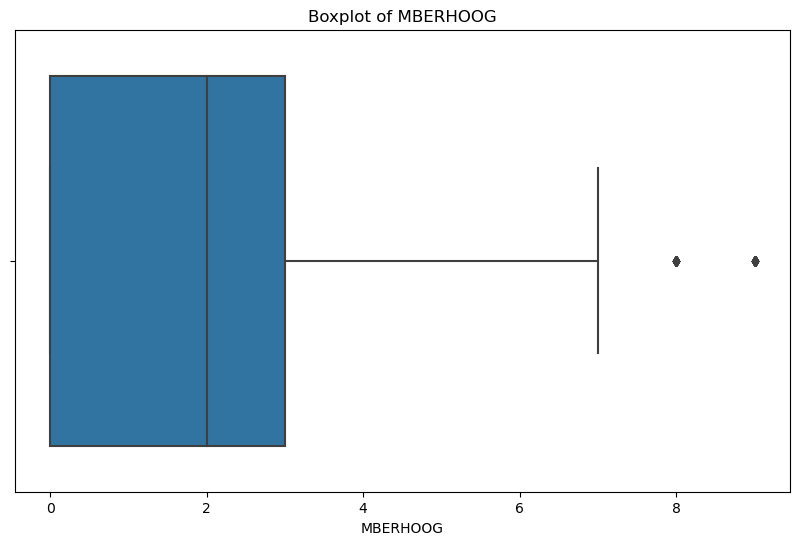

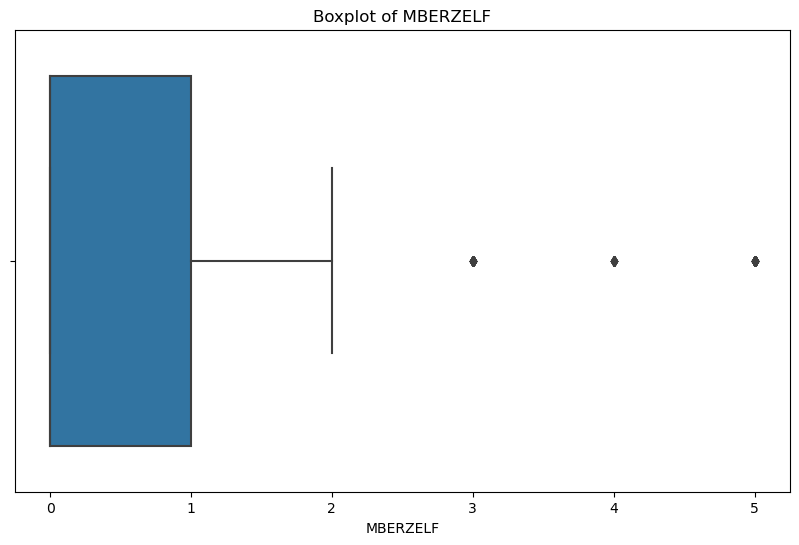

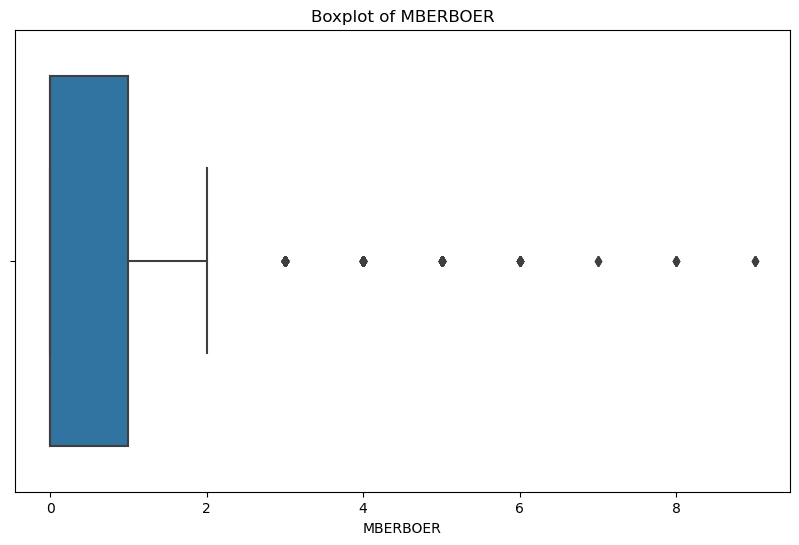

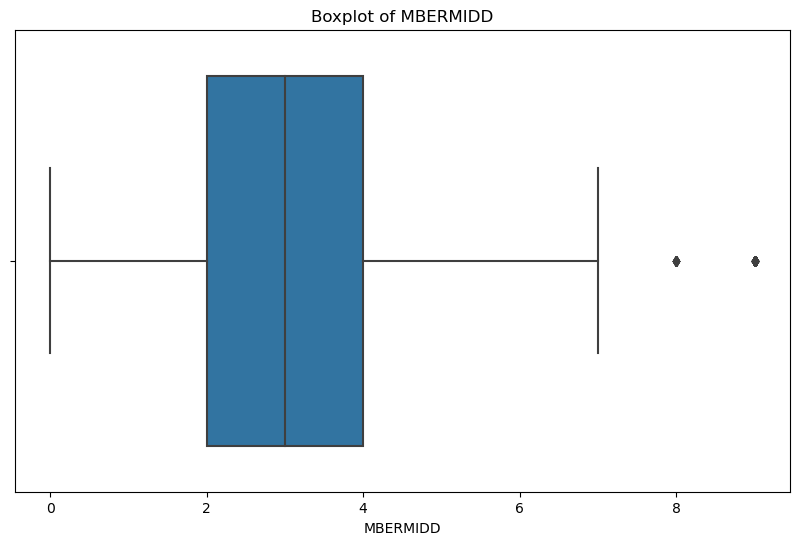

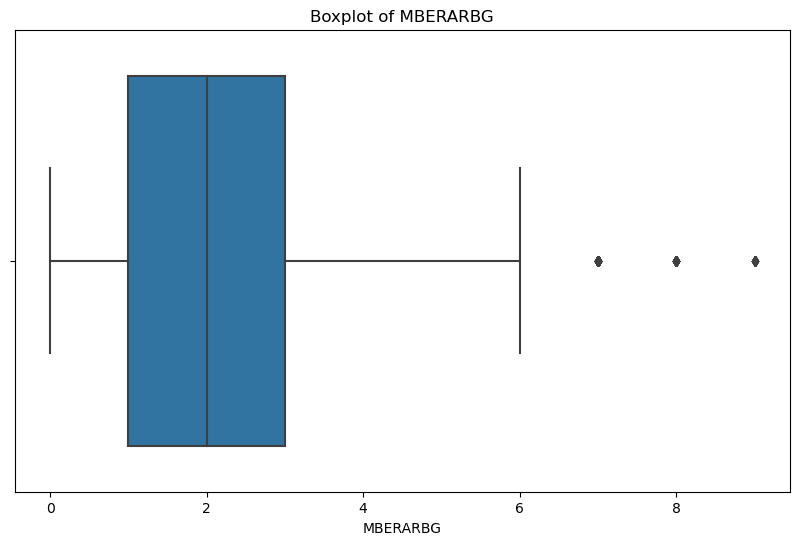

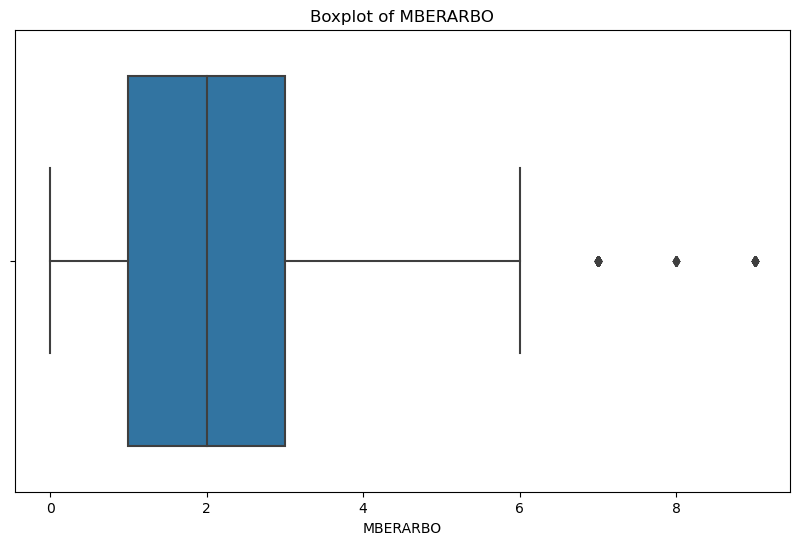

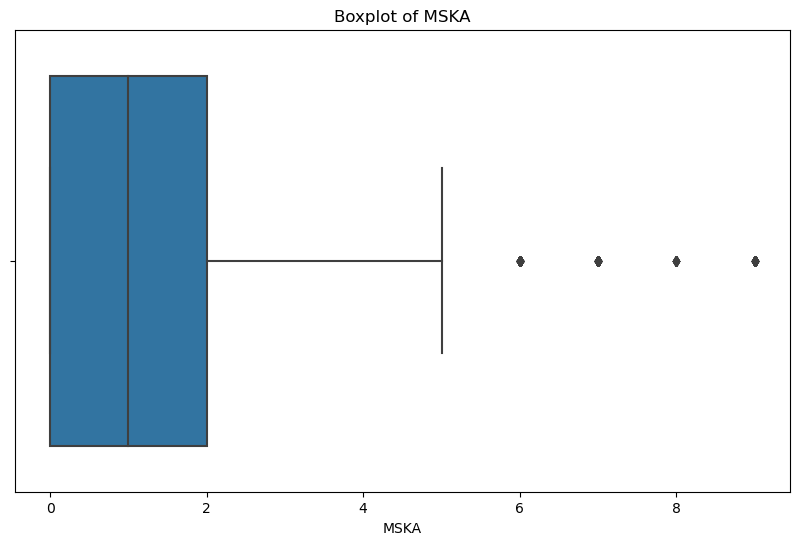

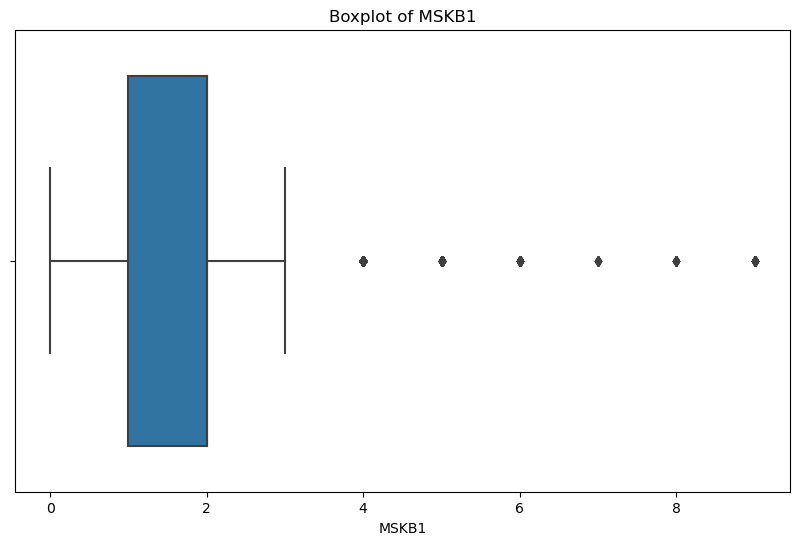

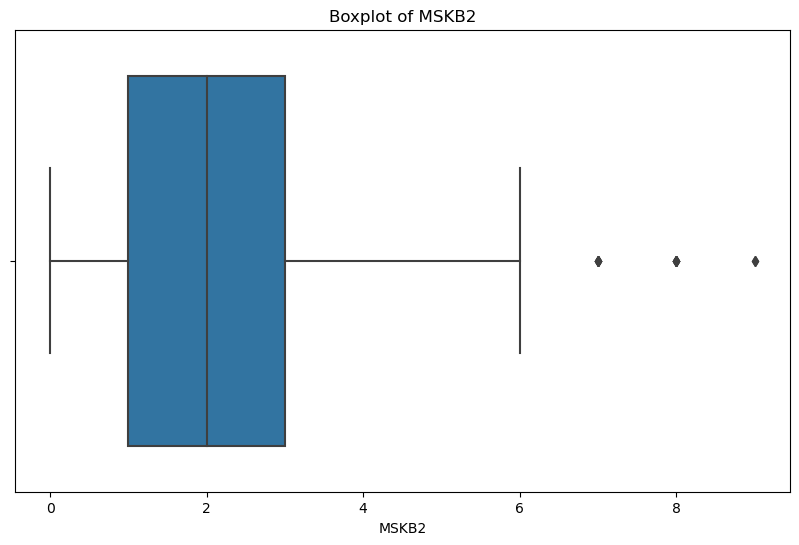

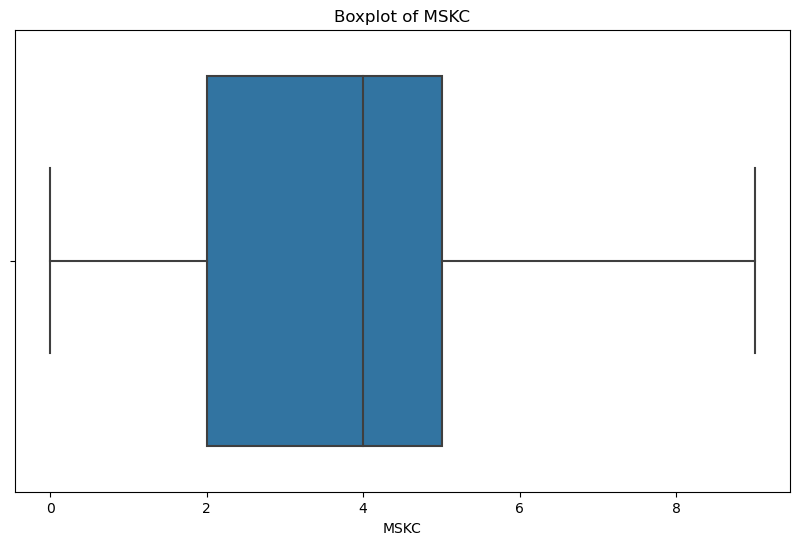

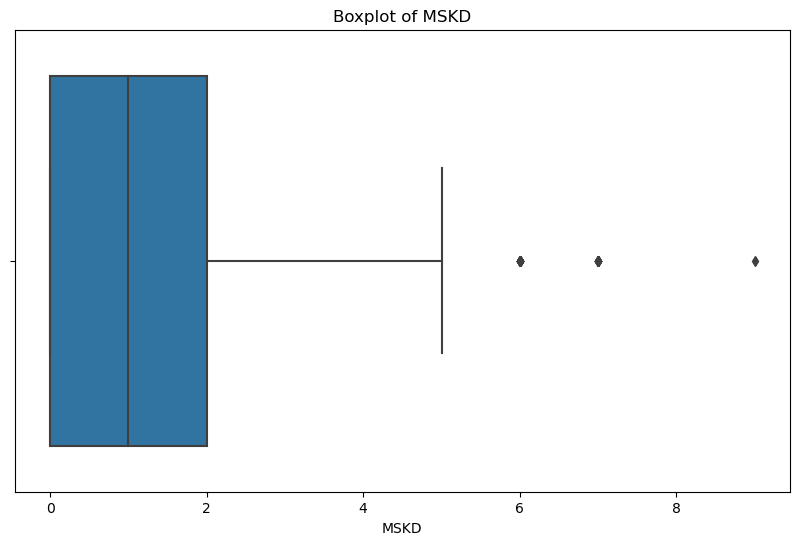

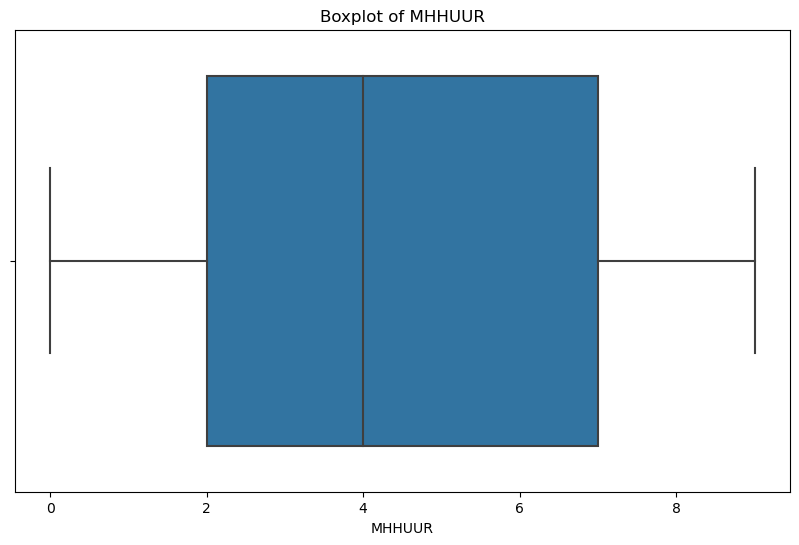

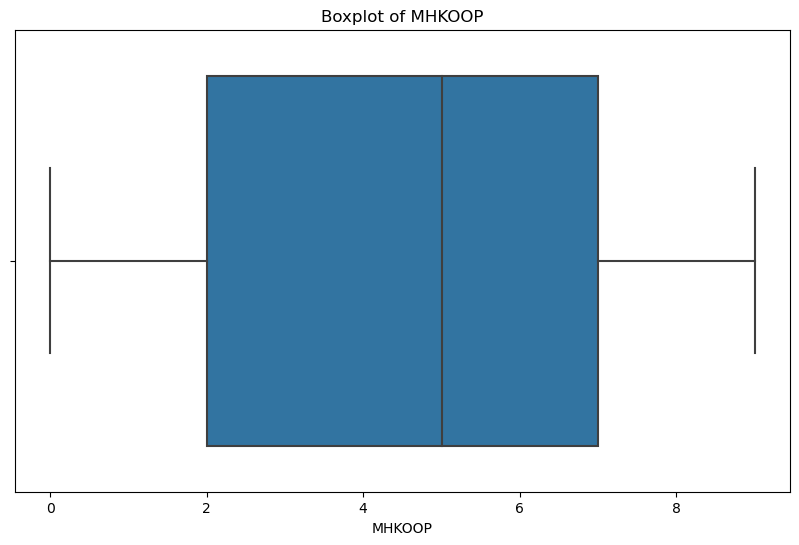

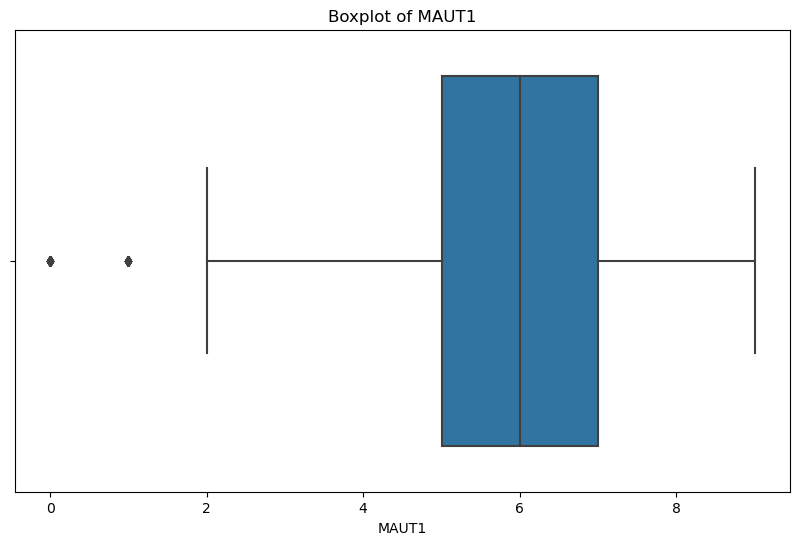

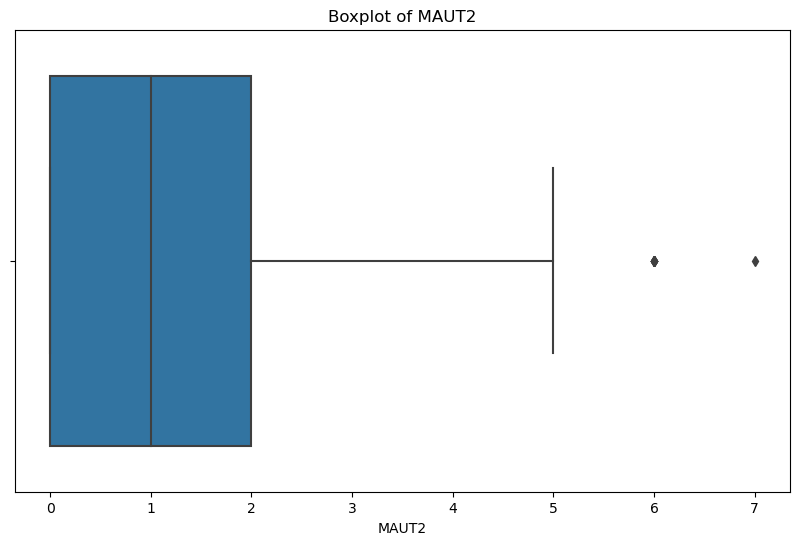

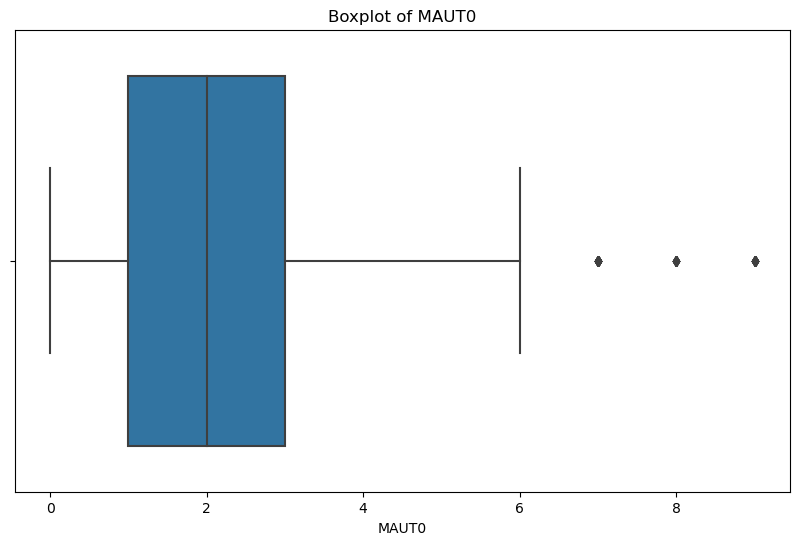

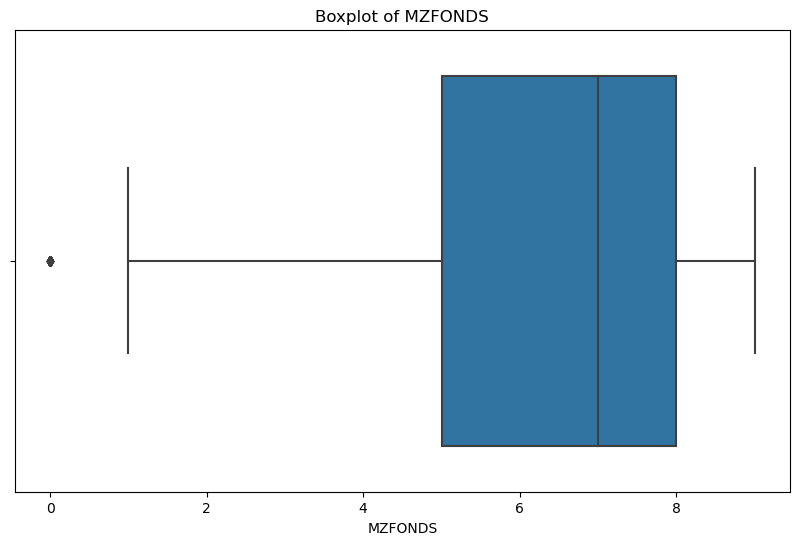

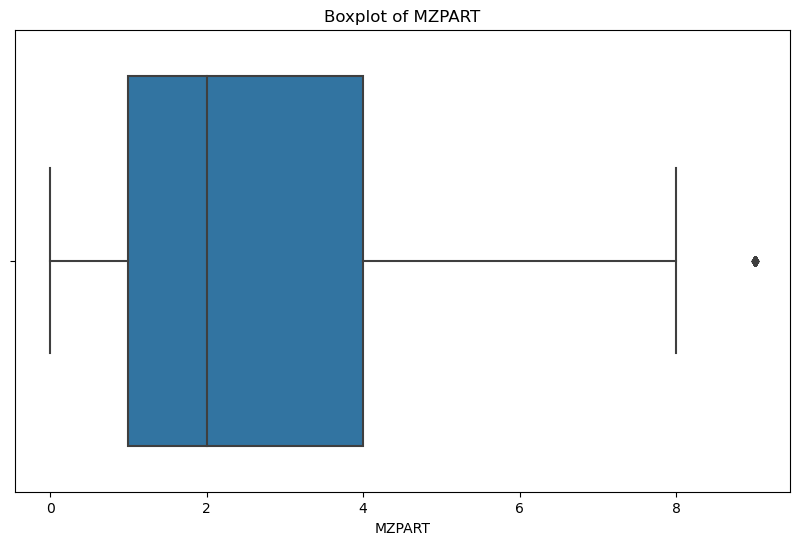

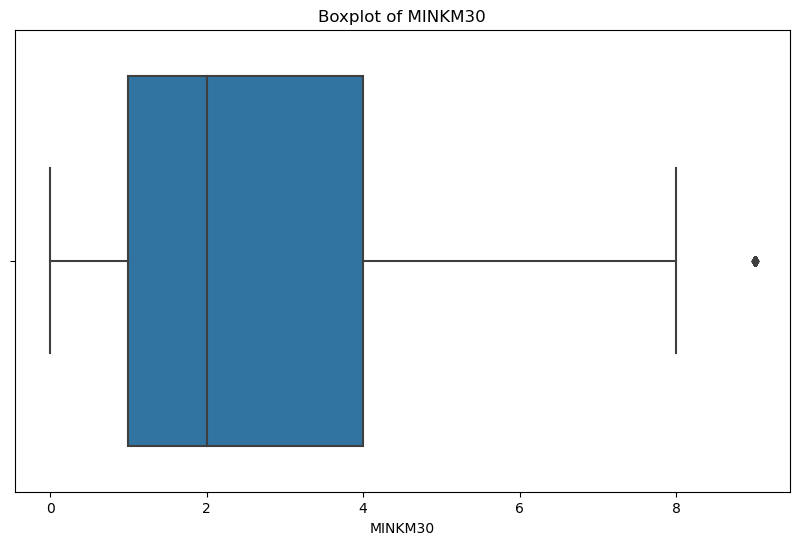

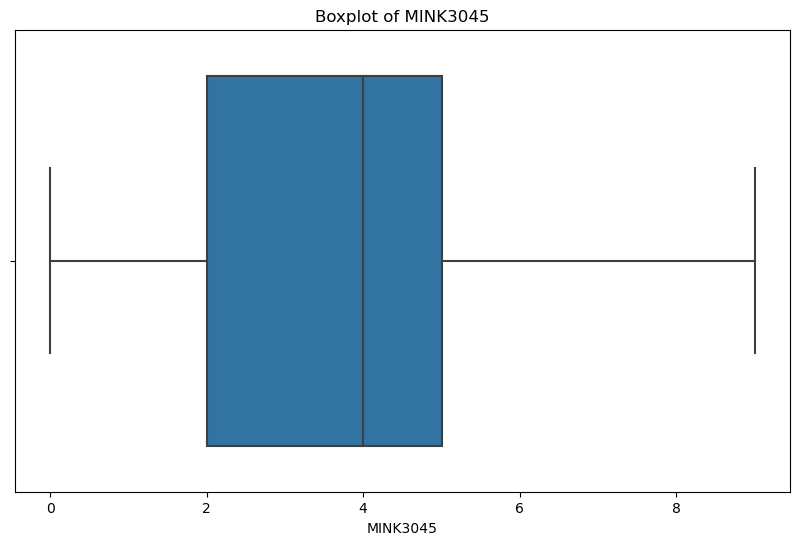

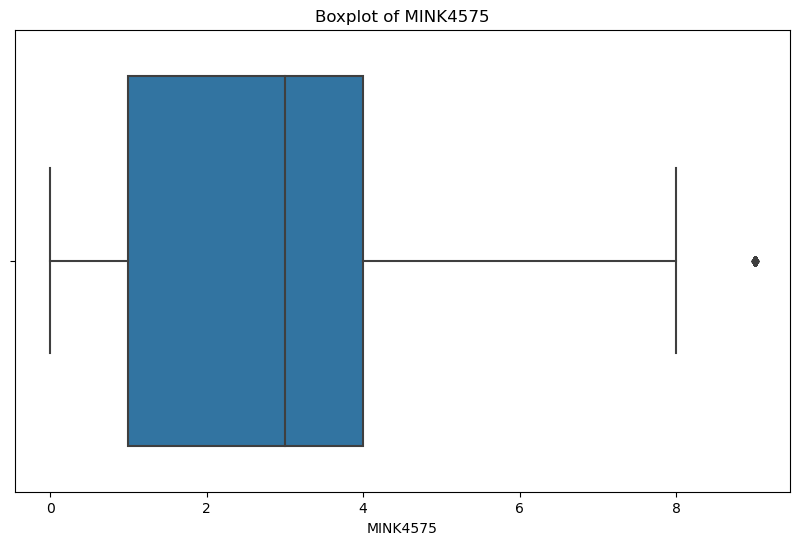

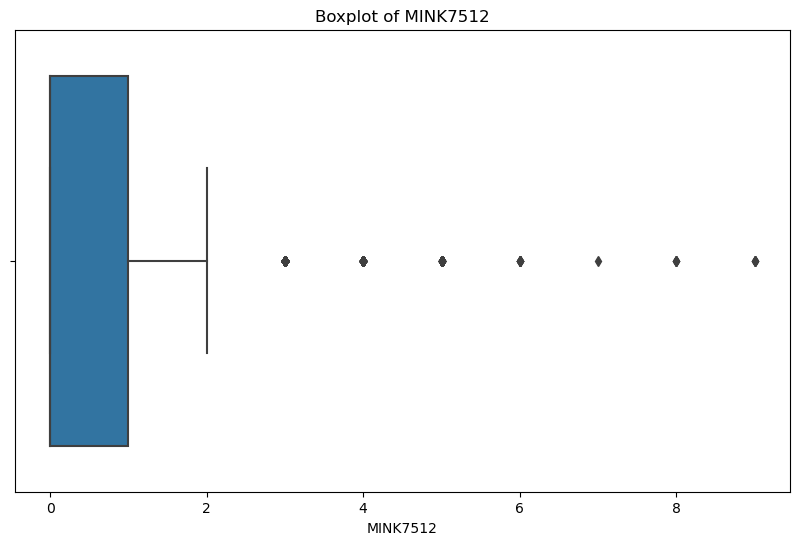

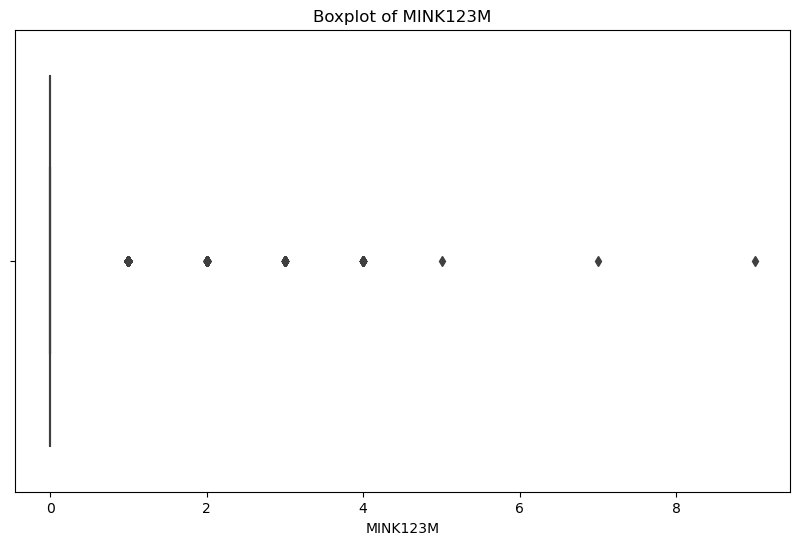

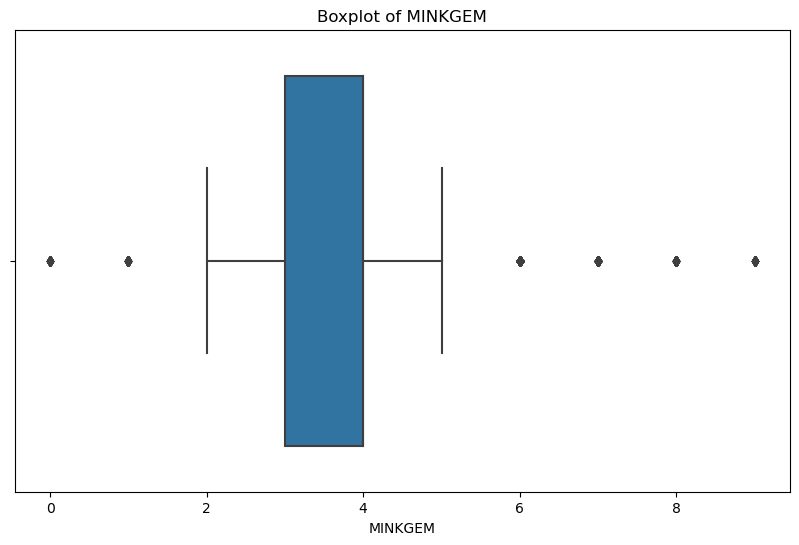

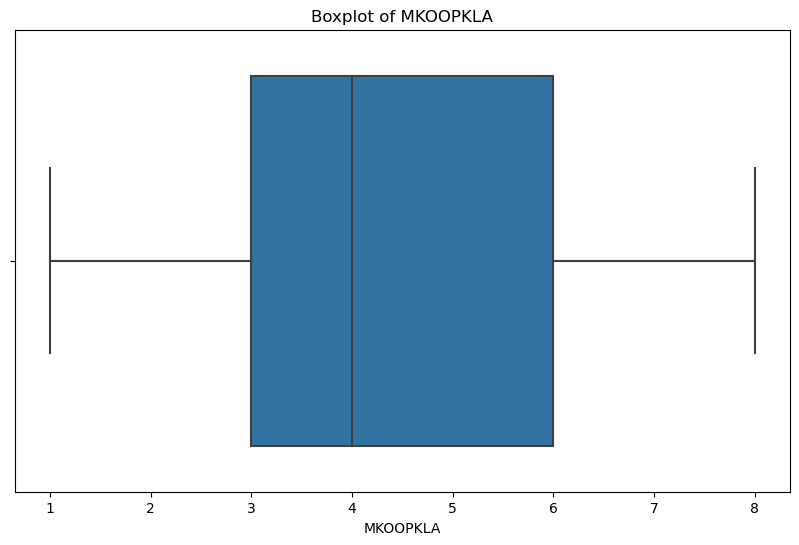

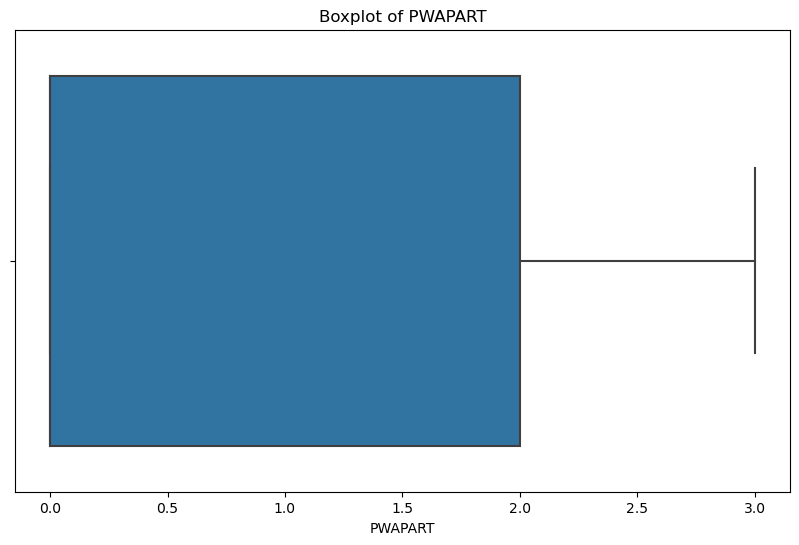

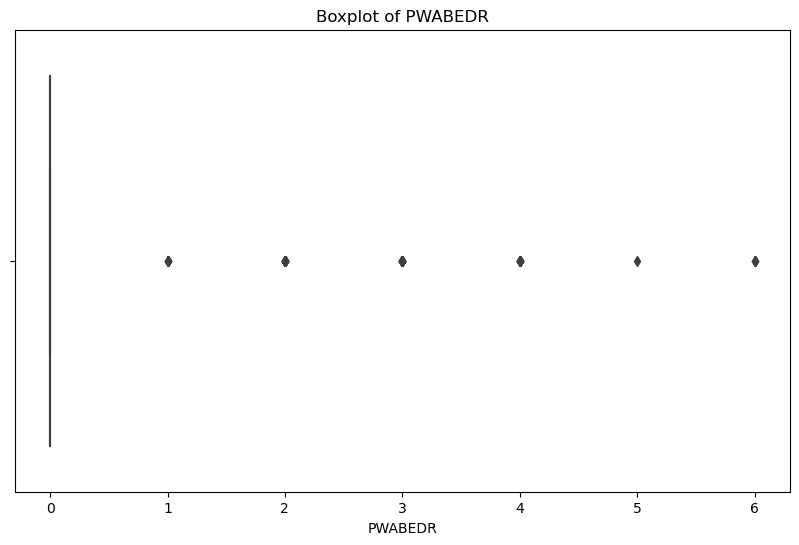

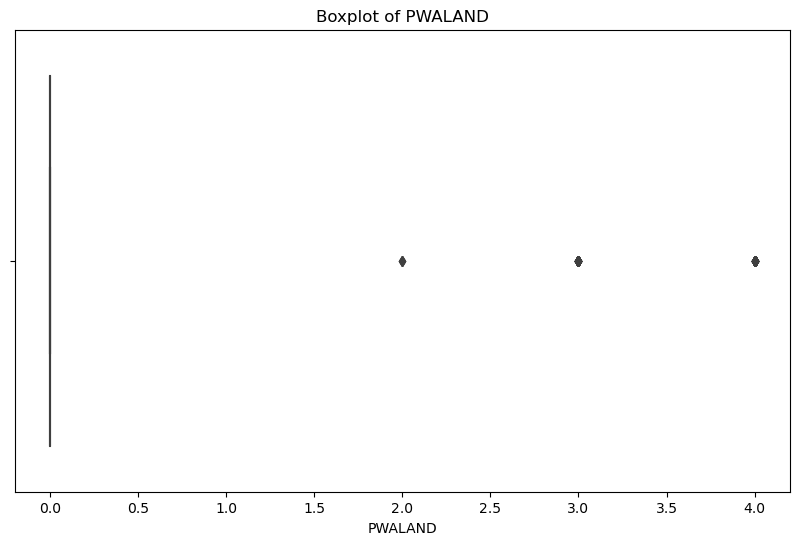

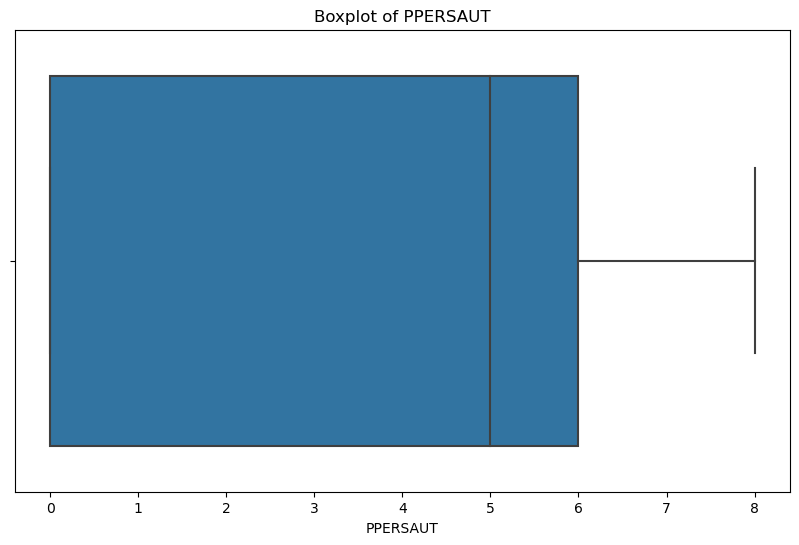

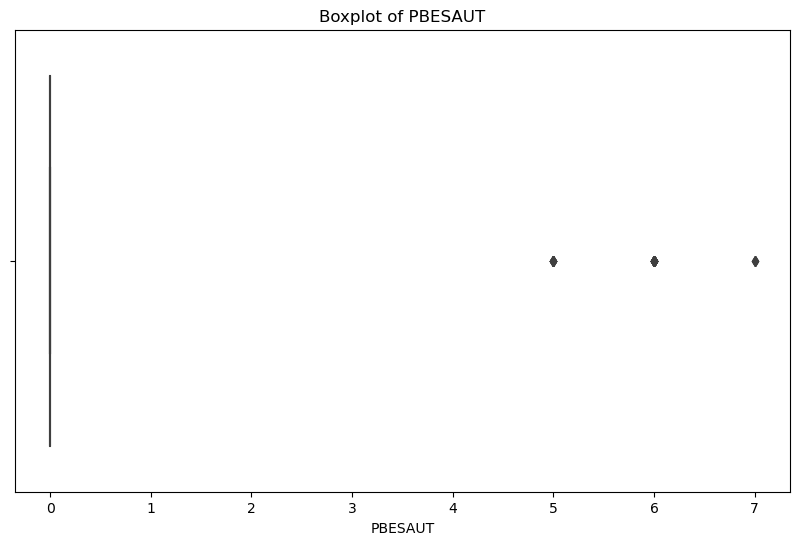

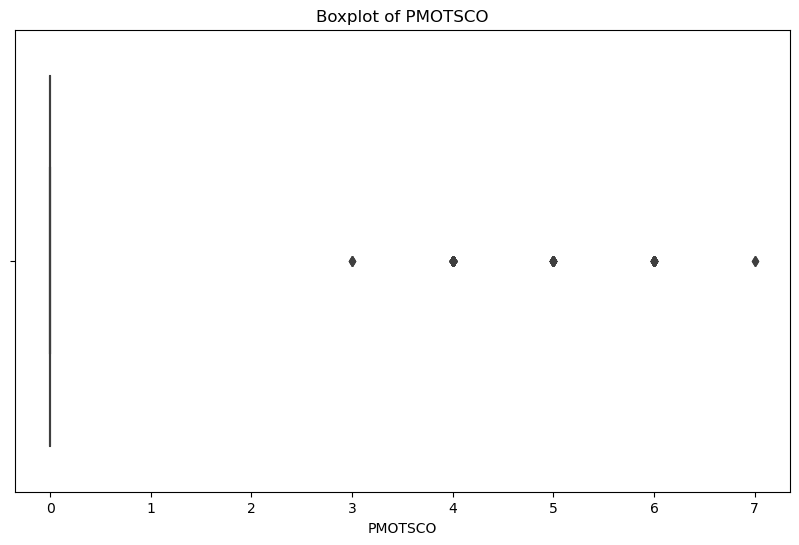

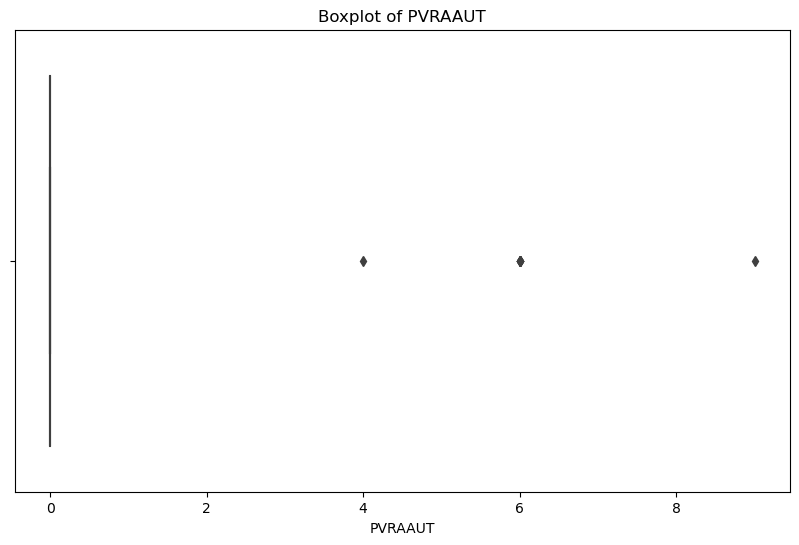

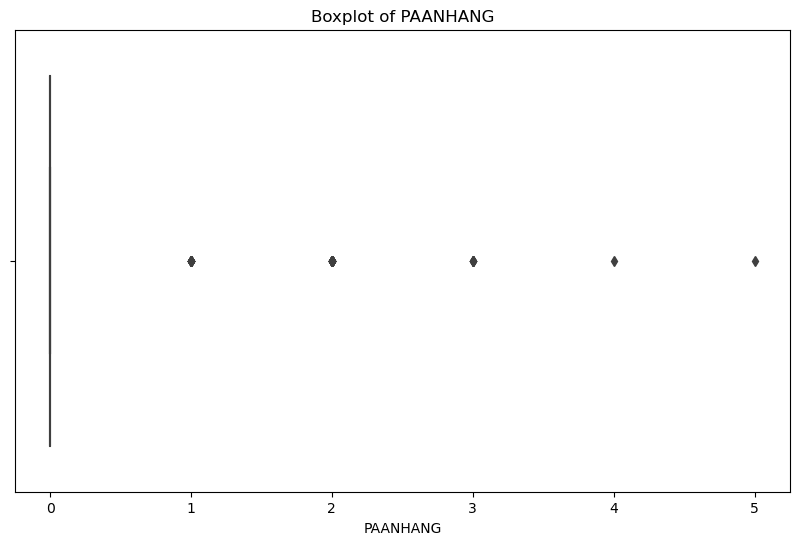

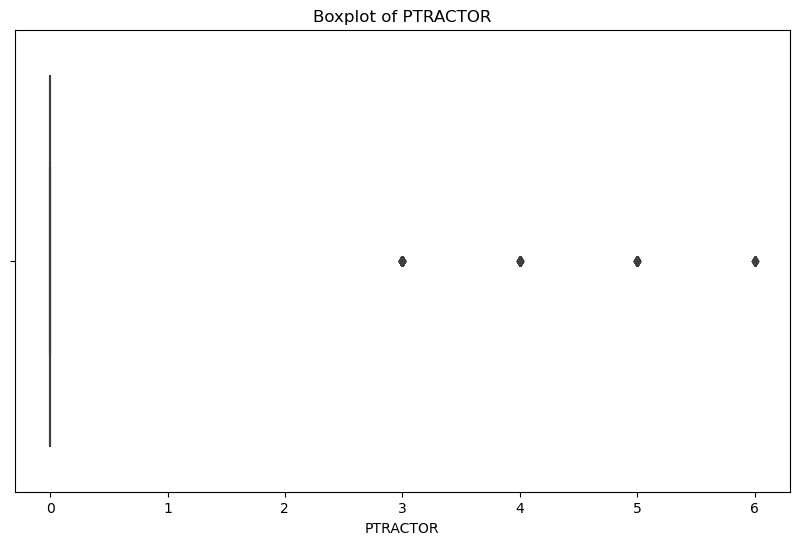

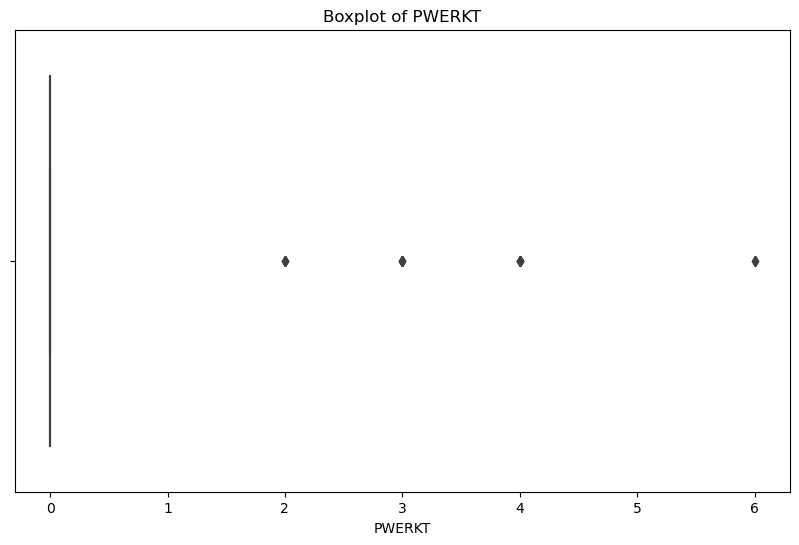

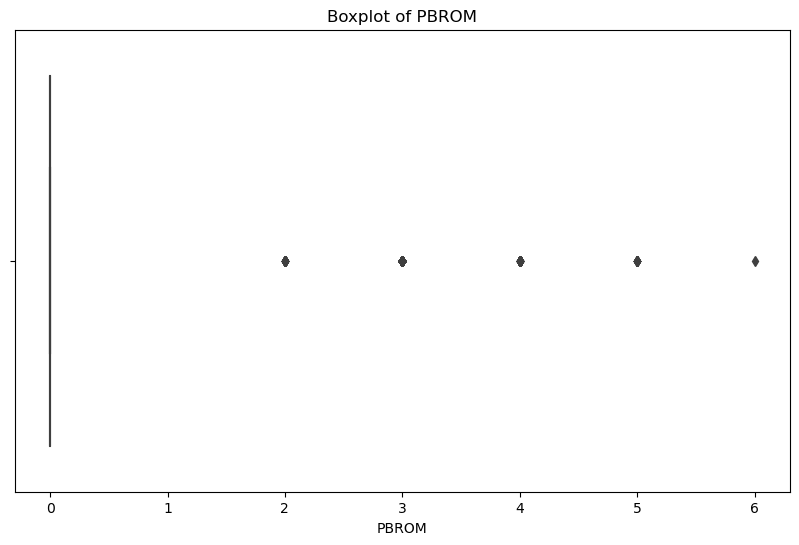

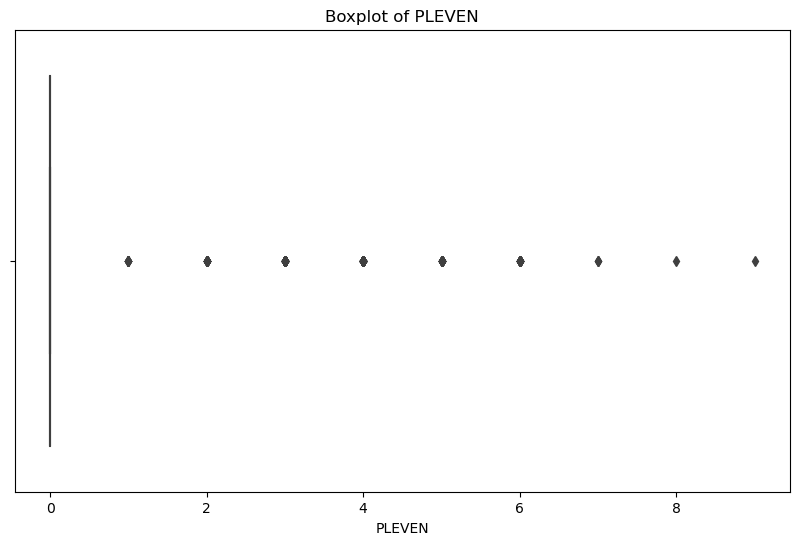

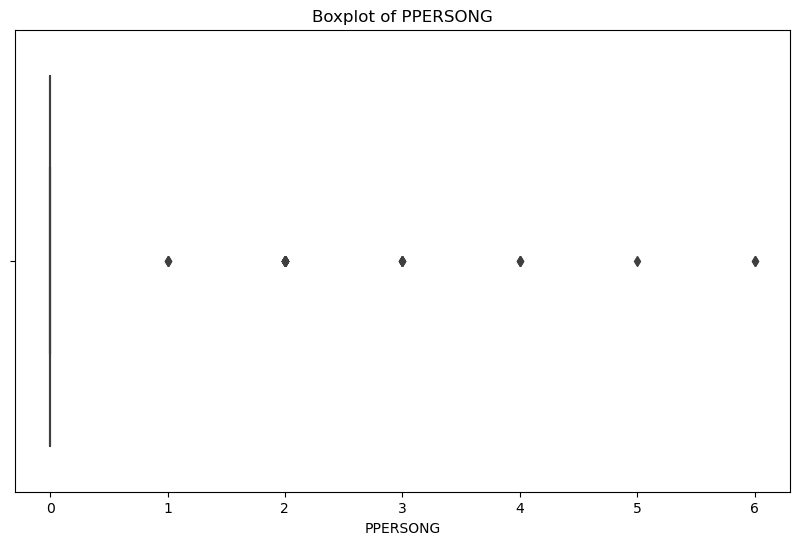

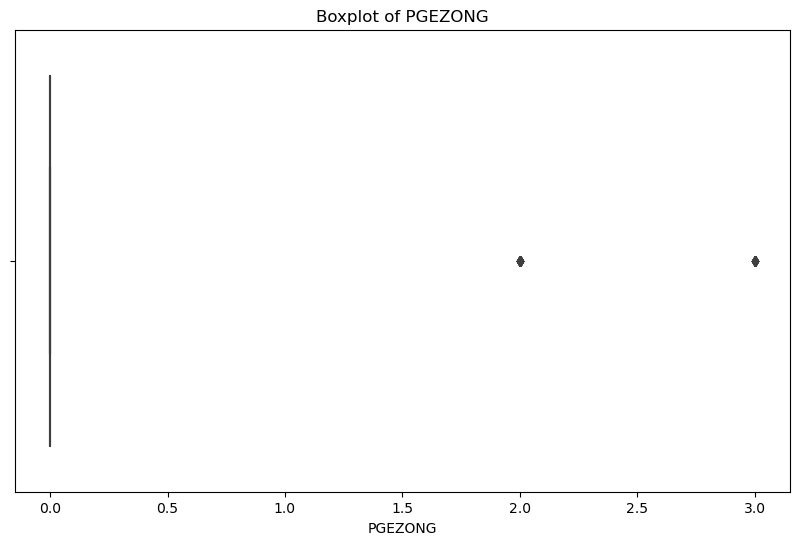

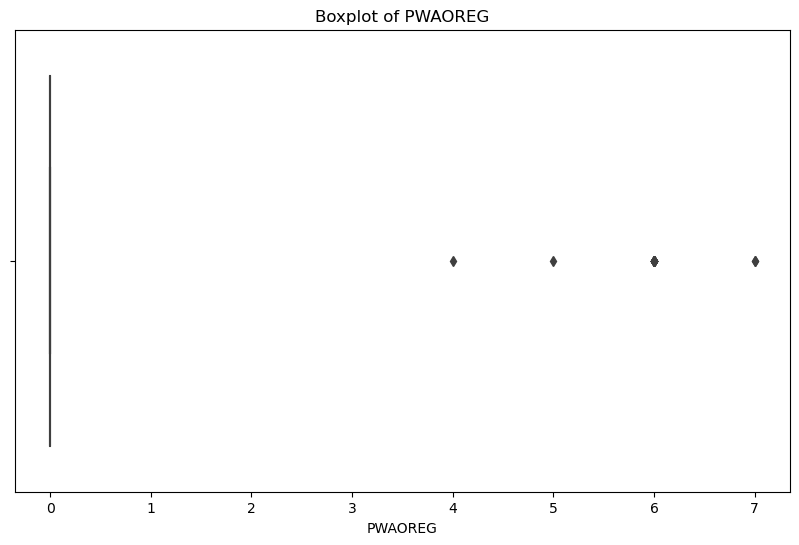

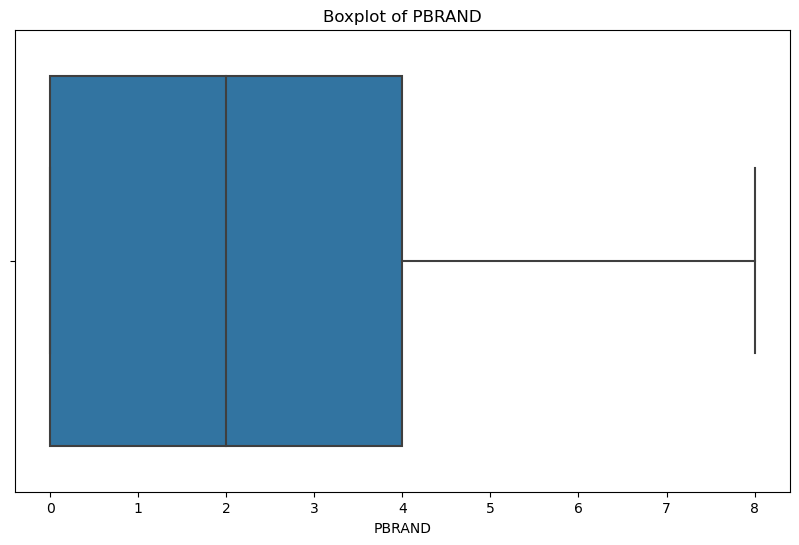

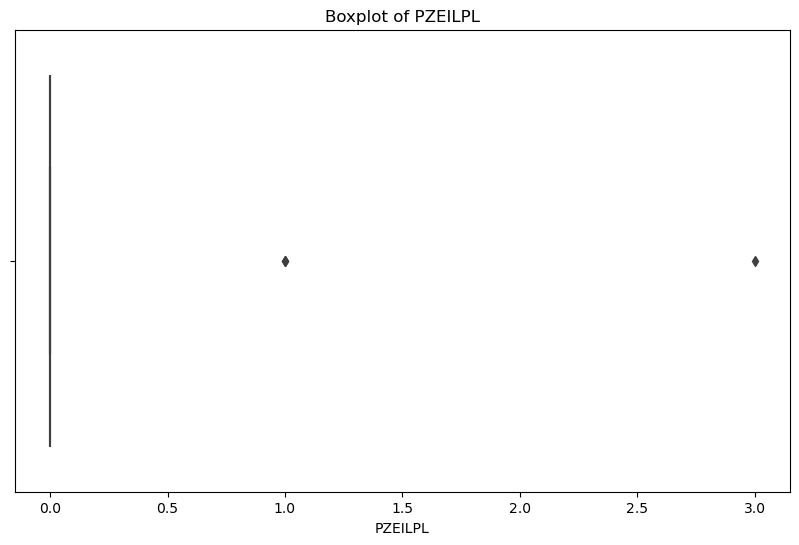

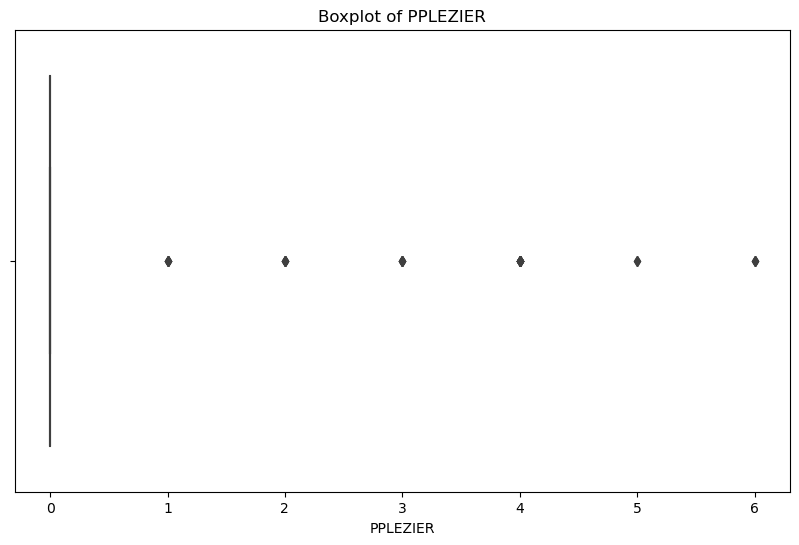

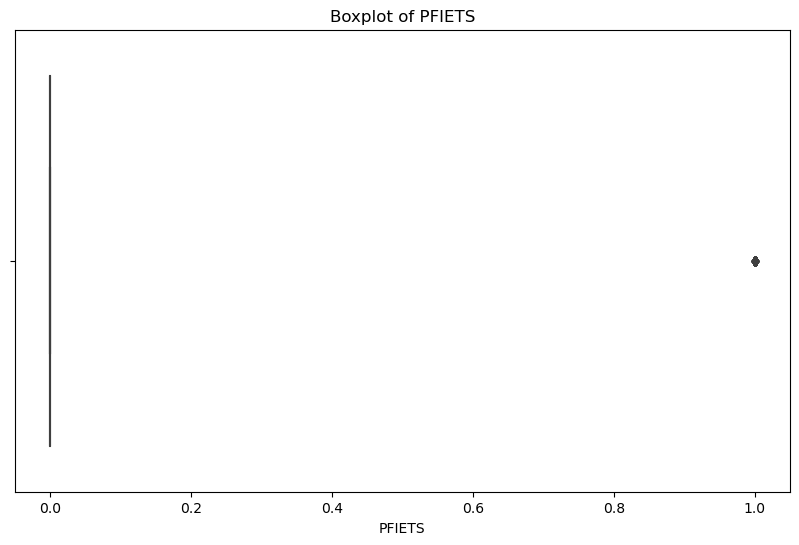

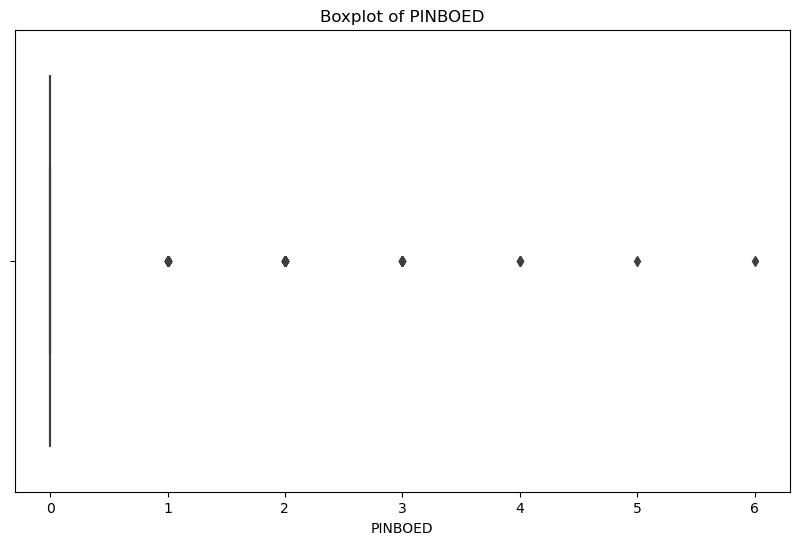

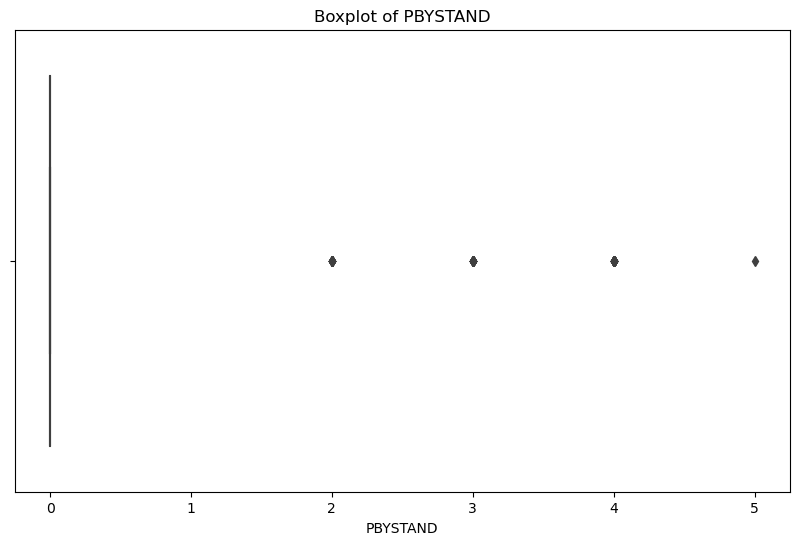

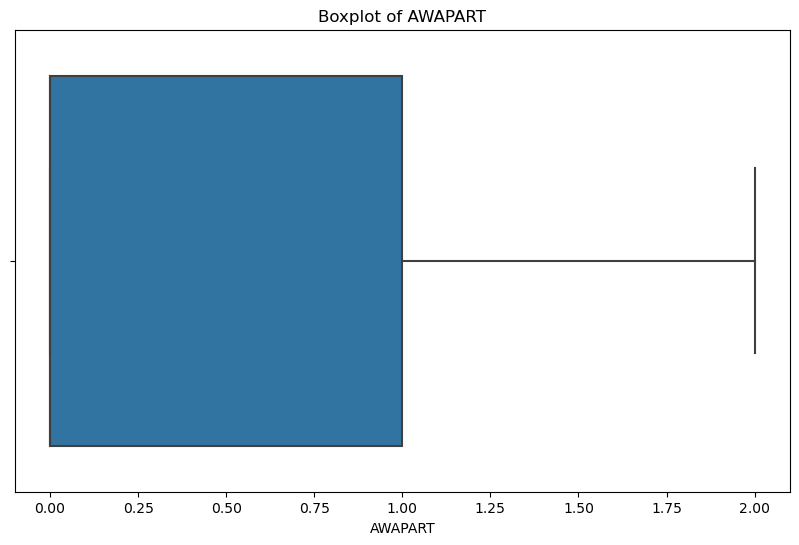

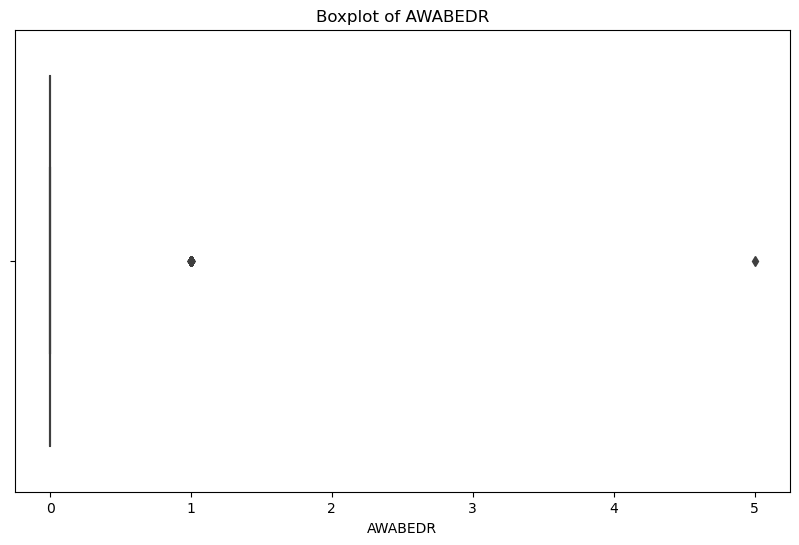

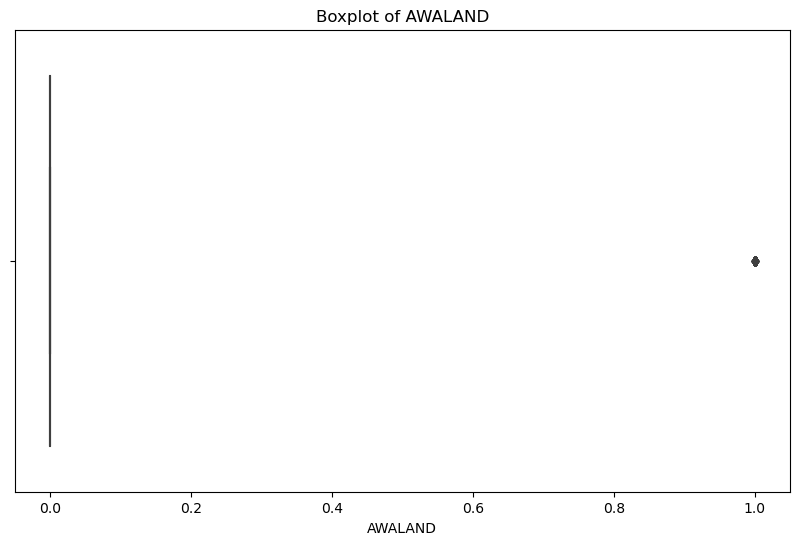

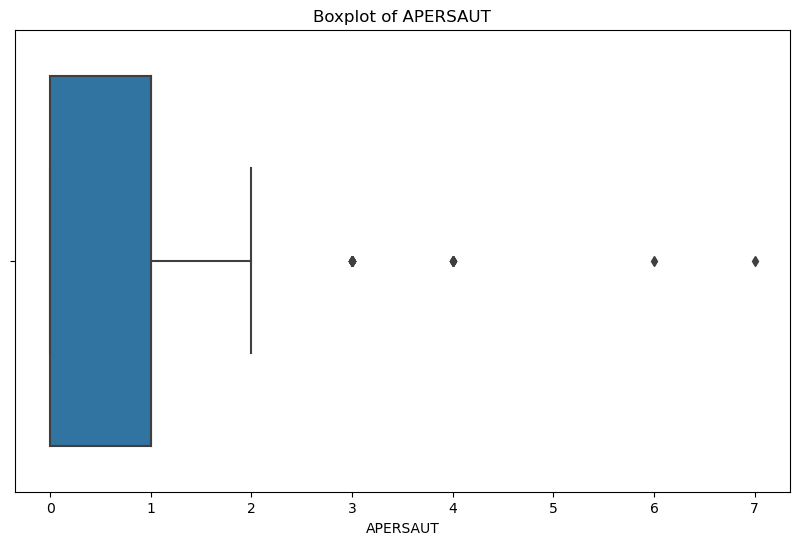

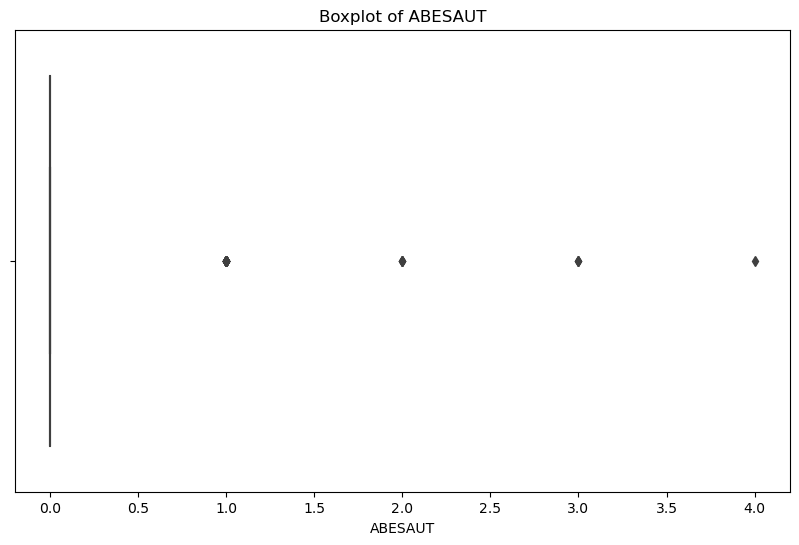

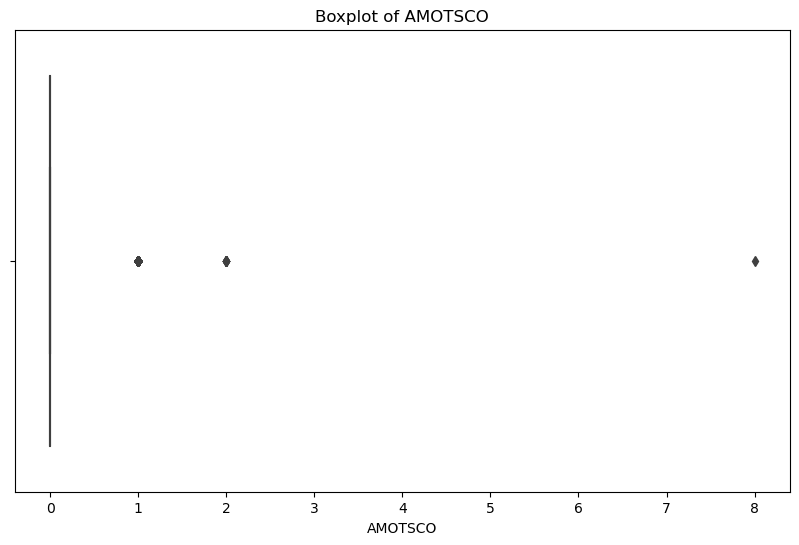

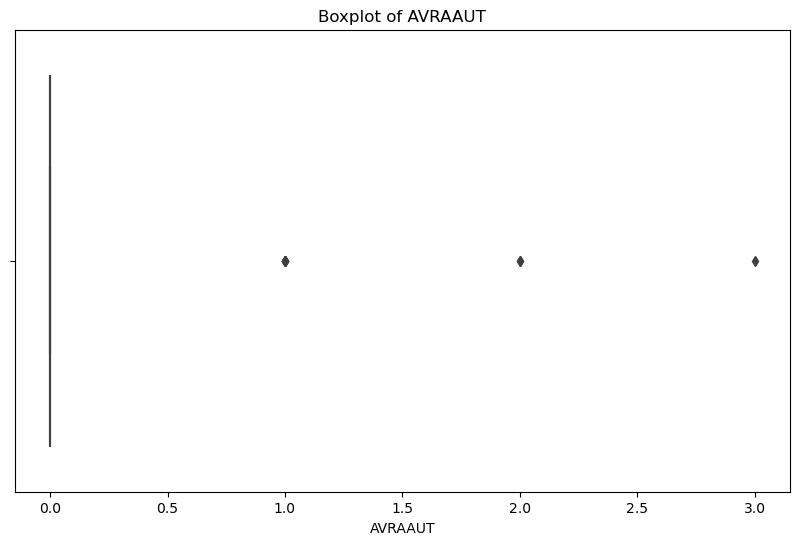

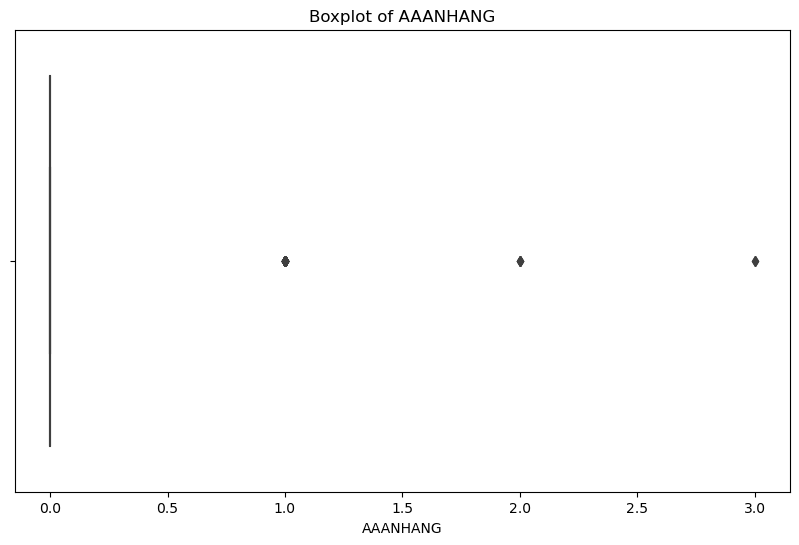

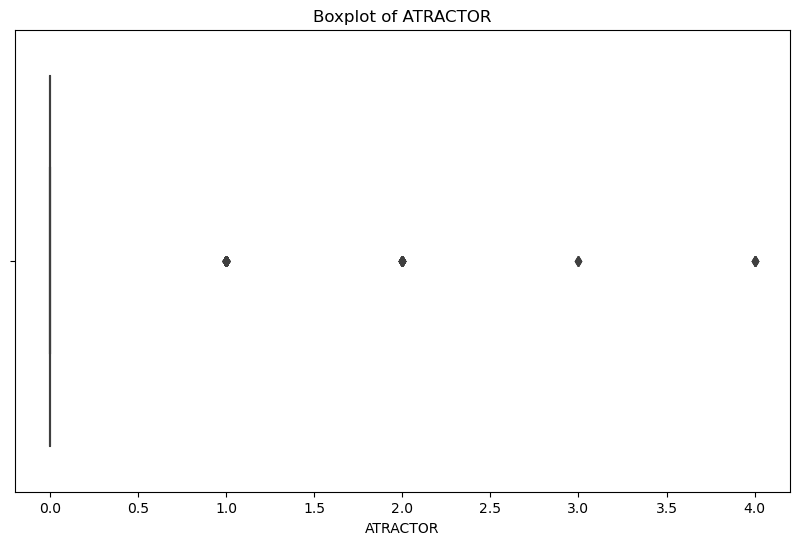

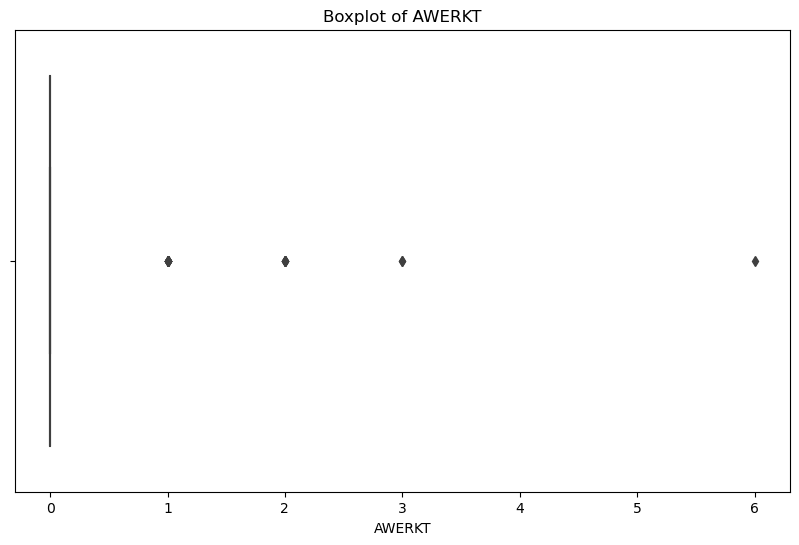

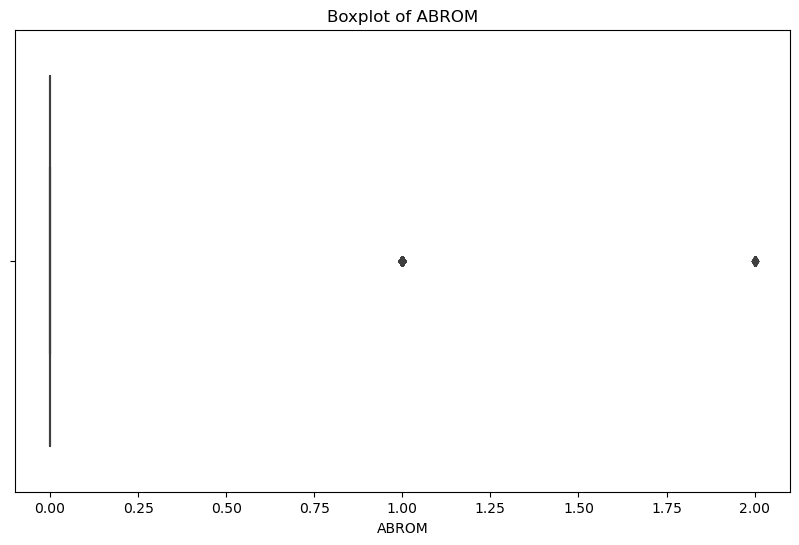

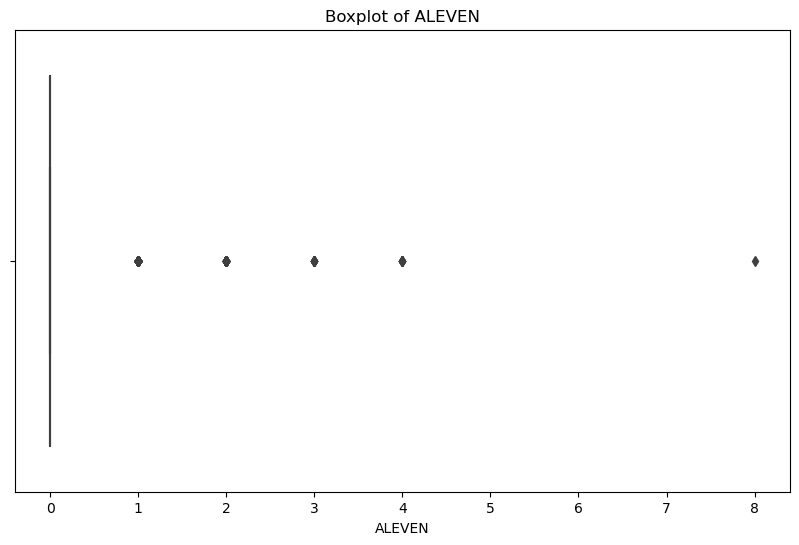

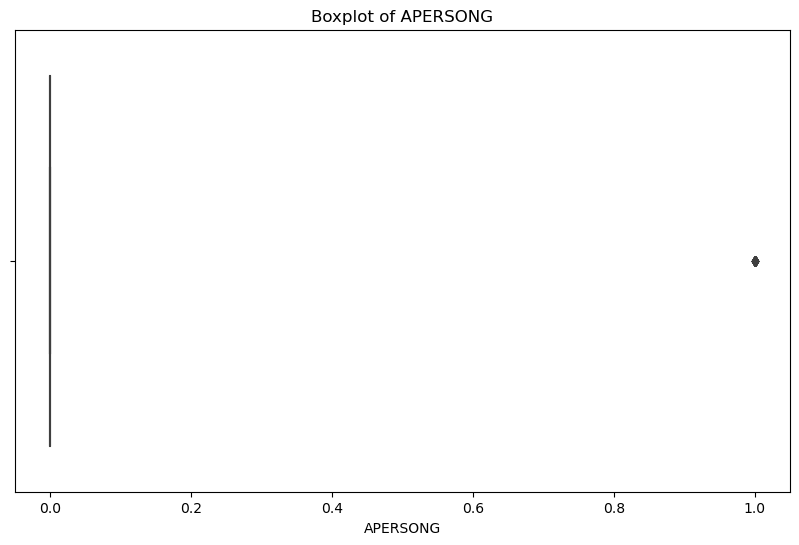

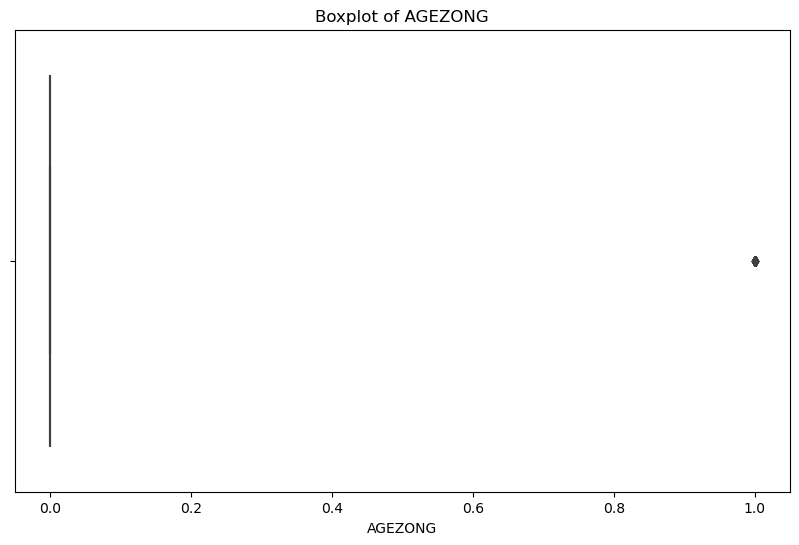

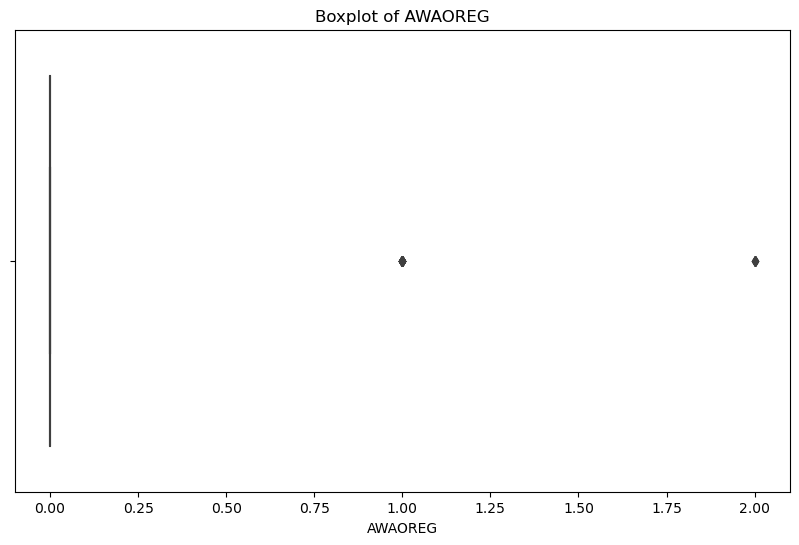

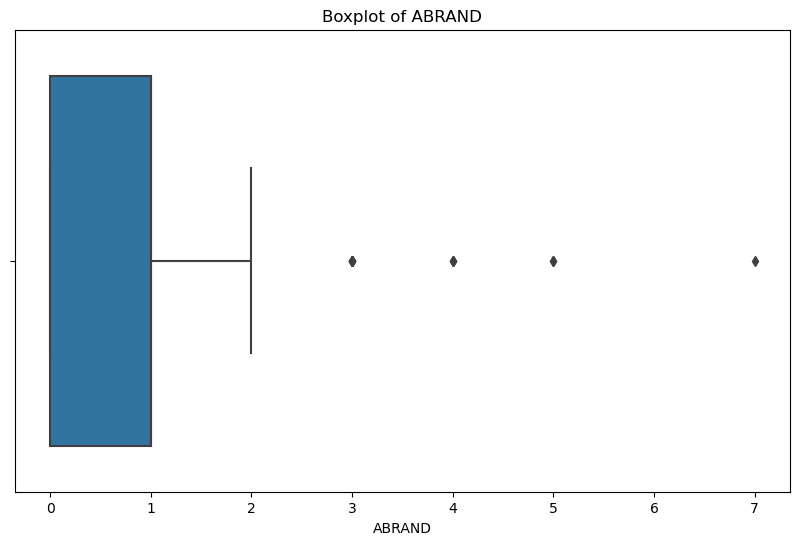

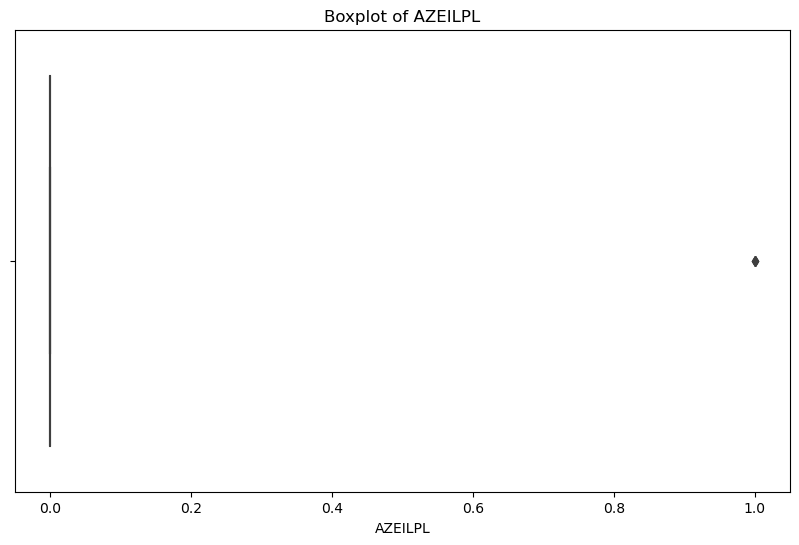

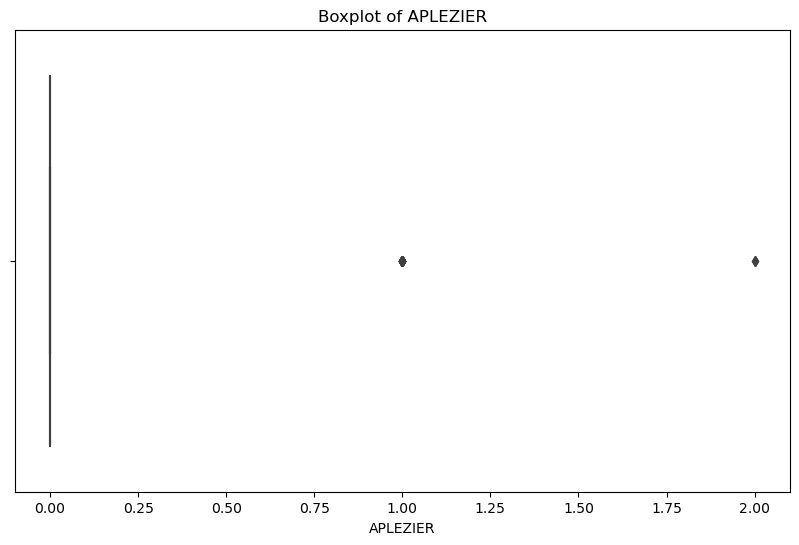

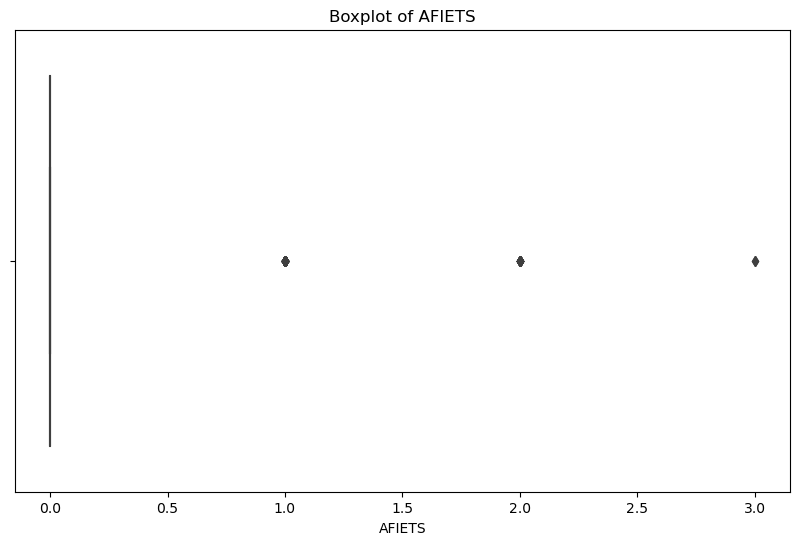

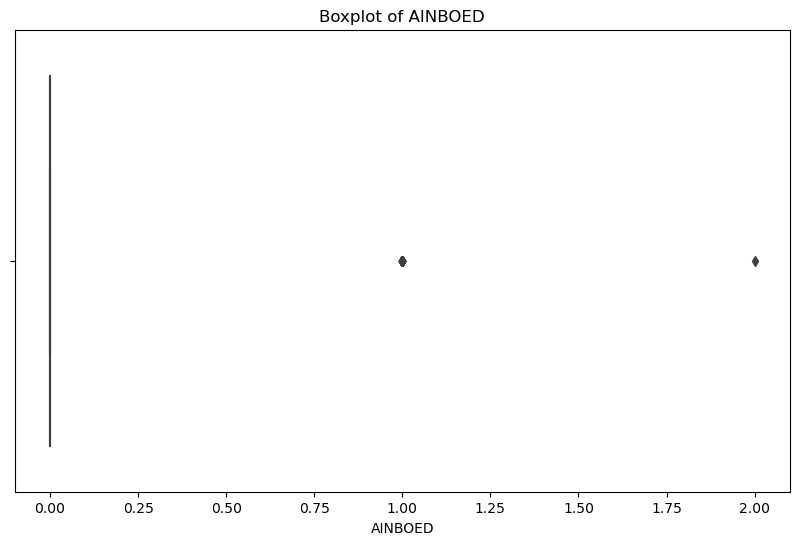

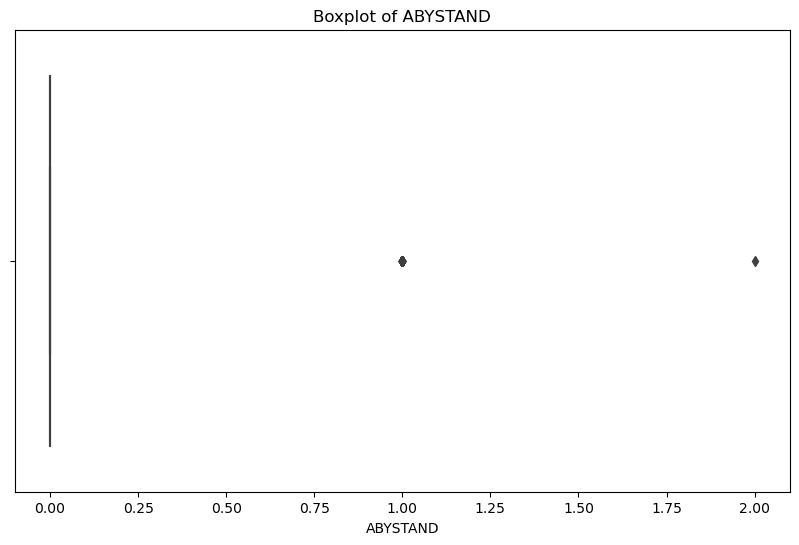

In [17]:
# Use boxplots to identify outliers in numerical features
for col in train_data.columns:
    if train_data[col].dtype != 'object' and col != 'CARAVAN':
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=train_data[col])
        plt.title(f'Boxplot of {col}')
        plt.show()


In [18]:
# Frequency analysis for categorical features
categorical_columns = [col for col in train_data.columns if train_data[col].dtype == 'object']
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=train_data[col])
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Cross-tabulation with target variable
for col in categorical_columns:
    cross_tab = pd.crosstab(train_data[col], train_data['CARAVAN'])
    print(f'Cross-tabulation for {col} with CARAVAN:')
    print(cross_tab)


In [19]:
train_data

MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  MGODOV  \
0          33         1        3         2         8       0       5       1   
1          37         1        2         2         8       1       4       1   
2          37         1        2         2         8       0       4       2   
3           9         1        3         3         3       2       3       2   
4          40         1        4         2        10       1       4       1   
...       ...       ...      ...       ...       ...     ...     ...     ...   
5817       36         1        1         2         8       0       6       1   
5818       35         1        4         4         8       1       4       1   
5819       33         1        3         4         8       0       6       0   
5820       34         1        3         2         8       0       7       0   
5821       33         1        3         3         8       0       6       1   

      MGODGE  MRELGE  ...  APERSONG  AGEZONG  AWAOREG  ABRAND  AZEILPL  \
0          3       7  ...         0        0        0       1        0   
1          4       6  ...         0        0        0       1        0   
2          4       3  ...         0        0        0       1        0   
3          4       5  ...         0        0        0       1        0   
4          4       7  ...         0        0        0       1        0   
...      ...     ...  ...       ...      ...      ...     ...      ...   
5817       2       1  ...         0        0        0       1        0   
5818       4       6  ...         0        0        0       1        0   
5819       3       5  ...         0        0        0       1        0   
5820       2       7  ...         0        0        0       0        0   
5821       2       7  ...         0        0        0       0        0   

      APLEZIER  AFIETS  AINBOED  ABYSTAND  CARAVAN  
0            0       0        0         0        0  
1            0       0        0         0        0  
2            0       0        0         0        0  
3            0       0        0         0        0  
4            0       0        0         0        0  
...        ...     ...      ...       ...      ...  
5817         0       0        0         0        0  
5818         0       0        0         0        0  
5819         0       0        0         0        1  
5820         0       0        0         0        0  
5821         0       0        0         0        0  

[5822 rows x 86 columns]